# <center>Life Expectancy (WHO) Dataset</center>

## Project Objective
Analyze and predict average life expectancy based on economic, health, and social factors from the World Health Organization (WHO) dataset.

---

## Student Information

**Student 1:**
- Full Name: Cao Trần Bá Đạt
- Student ID: 23127168

**Student 2:**
- Full Name: Trần Hoài Thiện Nhân
- Student ID: 23127238

**Student 3:**
- Full Name: Bùi Nam Việt
- Student ID: 23127516

**Class:** 23KHDL

#### 4. Results Analysis & Evaluation

**Data Preparation & Preprocessing:**
- The dataset was cleaned by handling missing values using median imputation for numerical features
- Target variable (Life expectancy) missing values were removed
- Feature columns were selected excluding non-predictive variables (Country, Region, Year)
- Final dataset shape after cleaning provides sufficient data for robust model training

**Stratified Train-Test Split:**
- Successfully implemented stratified sampling based on Region column
- This ensures proportional representation of all regions in both training (80%) and test (20%) sets
- Stratification verification shows minimal differences (<5%) between train and test region distributions
- This approach prevents bias where test set might only contain countries from one region

**Model Performance - Random Forest:**
- Random Forest achieved excellent performance with high R² scores on both train and test sets
- Test RMSE indicates average prediction error in years
- Test MAE provides interpretable average absolute error
- Low difference between train and test R² scores suggests good generalization (minimal overfitting)
- The model successfully captures complex non-linear relationships between features and life expectancy

**Model Performance - K-Nearest Neighbors:**
- KNN model (k=5) provides an alternative approach using instance-based learning
- Performance metrics allow comparison with Random Forest
- KNN captures local patterns by finding similar countries
- The comparison reveals whether global patterns (Random Forest) or local patterns (KNN) are more predictive

**Model Comparison:**
- Side-by-side comparison of RMSE, MAE, and R² scores for both models
- Identification of best performing model based on test RMSE
- Visualization of predictions vs actual values for both models
- Analysis of whether relationships are better captured by tree-based (Random Forest) or instance-based (KNN) approaches

**Feature Importance Analysis:**
- Random Forest provides explicit feature importance rankings
- Top features are identified and ranked by their contribution to predictions
- Features are categorized into Health Indicators, Economic Factors, and Social Factors
- Category-level importance shows which type of factors (health, economic, or social) has the greatest overall impact
- This analysis helps policymakers prioritize interventions

**Regional Analysis:**
- Schooling and GDP per capita are analyzed grouped by Region
- This avoids distortion from large socio-economic differences between regions
- Box plots and summary statistics reveal regional variations
- Scatter plots show relationships between factors and life expectancy, colored by region
- This regional grouping provides context-specific insights

**Key Insights:**
- The models successfully predict life expectancy with good accuracy
- Feature importance identifies which factors policymakers should prioritize
- Regional analysis reveals significant socio-economic differences
- Both models provide valuable but different perspectives on the data
- The analysis enables evidence-based decision making for health policy


---

## Table of Contents

1. [Dataset Information](#c1)
    - [1.1 About the Data Subject](#c11)
    - [1.2 Data Source](#c12)
    - [1.3 Data License & Usage Rights](#c13)
    - [1.4 Data Collection Method](#c14)
    - [1.5 Rationale for Dataset Selection](#c15)
2. [Import Libraries](#c2)
3. [Load Dataset](#c3)
4. [Data Exploration](#c4)
    - [4.1 Dataset Overview](#c41)
        - [4.1.1 Basic Information](#c411)
        - [4.1.2 Data Integrity](#c412)
        - [4.1.3 Column Inventory](#c413)
        - [4.1.4 Data Types](#c414)
    - [4.2 Numerical Columns Analysis](#c42)
        - [4.2.1 Distribution & Central Tendency](#c421)
        - [4.2.2 Range & Outliers](#c422)
        - [4.2.3 Data Quality (Numerical)](#c423)
    - [4.3 Categorical Columns Analysis](#c43)
        - [4.3.1 Value Distribution](#c431)
        - [4.3.2 Data Quality (Categorical)](#c432)
    - [4.4 Missing Data Analysis](#c44)
        - [4.4.1 Overall Assessment](#c441)
        - [4.4.2 Per Column Strategy](#c442)
    - [4.5 Relationships & Correlations](#c45)
        - [4.5.1 Preliminary Patterns](#c451)
        - [4.5.2 Cross-tabulations](#c452)
    - [4.6 Initial Observations & Insights](#c46)
        - [4.6.1 Summary](#c461)
        - [4.6.2 Red Flags](#c462)
5. [Meaningful Questions](#c5)
    - [5.1 Question 1](#c51)
    - [5.2 Question 2](#c52)
    - [5.3 Question 3](#c53)
    - [5.4 Question 4](#c54)
    - [5.5 Question 5](#c55)
    - [5.6 Question 6](#c56)
6. [Project Summary](#c6)
    - [6.1 Key Findings](#c61)
    - [6.2 Limitations](#c62)
    - [6.3 Future Directions (If You Had More Time)](#c63)
    - [6.4 Individual Reflections](#c64)
        - [6.4.1 Student 1 - Cao Trần Bá Đạt](#c641)
        - [6.4.2 Student 2 - Trần Hoài Thiện Nhân](#c642)
        - [6.4.3 Student 3 - Bùi Nam Việt](#c643)
7. [References](#c7)

---

<a id="c1"></a>
## 1. Dataset Information

<a id="c11"></a>
### 1.1 About the Data Subject

**What subject is your data about?**

TODO: Describe the topic, domain, or phenomenon
- Topic/Domain:
- Real-world context:
- Key variables covered:

<a id="c12"></a>
### 1.2 Data Source

**What is the source of your data?**

TODO: Provide complete source information
- Platform name:
- Full URL:
- Original author(s) or organization:
- Publication/collection date:

<a id="c13"></a>
### 1.3 Data License & Usage Rights 

**Do authors of this data allow you to use like this?**

TODO: Document data license and permissions
- Dataset license:
- Educational use permitted:
- Usage restrictions:
- Attribution requirements:

<a id="c14"></a>
### 1.4 Data Collection Method

**How did authors collect data?**

TODO: Describe data collection methodology
- Collection method (survey, sensors, administrative records, web scraping, etc.):
- Target population and sampling approach:
- Time period of data collection:
- Known limitations or biases in collection:

<a id="c15"></a>
### 1.5 Rationale for Dataset Selection

**Why did you choose this dataset?**

TODO: Explain your motivation and research interests
- What interests your group about this topic:
- Potential questions or insights this data could provide:
- Expected outcomes and applications:

---

<a id="c2"></a>
## 2. Import Libraries

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

<a id="c3"></a>
## 3. Load Dataset

In [2]:
df = pd.read_csv('../data/Life-Expectancy-Data-Updated.csv')
print("Dataset loaded successfully")

Dataset loaded successfully


<a id="c4"></a>
## 4. Data Exploration

<a id="c41"></a>
### 4.1 Dataset Overview

<a id="c411"></a>
#### 4.1.1 Basic Information

In [3]:
# Number of rows and columns
n_rows, n_cols = df.shape
print(f"\nDataset Dimensions:")
print(f"    Number of rows: {n_rows:,}")
print(f"    Number of columns: {n_cols}")

# What each row represents
print(f"\nWhat each row represents:")
print(f"Each row represents a country's health and economic indicators for a specific year")

# Overall dataset size
memory_usage = df.memory_usage(deep=True).sum() / (1024 ** 2)
print(f"\nOverall dataset size:")
print(f"    Memory usage: {memory_usage:.2f} MB")
print(f"    Total data points: {n_rows * n_cols:,}")

# Display first few rows
print(f"\nFirst 5 rows of the dataset:")
display(df.head())



Dataset Dimensions:
    Number of rows: 2,864
    Number of columns: 21

What each row represents:
Each row represents a country's health and economic indicators for a specific year

Overall dataset size:
    Memory usage: 0.78 MB
    Total data points: 60,144

First 5 rows of the dataset:


Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

<a id="c412"></a>
#### 4.1.2 Data Integrity

In [4]:
# Check for duplicated rows
n_duplicates = df.duplicated().sum()
print(f"\nDuplicated rows:")
print(f"    Count: {n_duplicates}")
print(f"    Percentage: {(n_duplicates / len(df) * 100):.2f}%")

if n_duplicates > 0:
    print(f"\nDecision: Will investigate duplicates further")
    print(f"    Duplicates may represent:")
    print(f"    Same country with same data across years")
    print(f"    Data entry errors")
    print(f"    Need to check if they are exact duplicates or partial")
    
    # If dataset has duplicates, show examples
    duplicates_df = df[df.duplicated(keep=False)].sort_values(by=list(df.columns))
    if len(duplicates_df) > 0:
        print(f"\n   Example of duplicated rows:")
        display(duplicates_df.head())
else:
    print(f"\n==> No duplicated rows found - data is clean")

print(f"\nEmpty/Incomplete rows check:")

# Completely empty rows
completely_empty = df.isnull().all(axis=1).sum()
print(f"    Completely empty rows: {completely_empty}")

# Rows with more than 50% missing values
missing_threshold = 0.5
mostly_empty = (df.isnull().sum(axis=1) > len(df.columns) * missing_threshold).sum()
print(f"    Rows with > 50% missing values: {mostly_empty}")

# Rows with any missing values
any_missing = df.isnull().any(axis=1).sum()
print(f"    Rows with at least one missing value: {any_missing}")
print(f"    ({(any_missing / len(df) * 100):.2f}% of total rows)")



Duplicated rows:
    Count: 0
    Percentage: 0.00%

==> No duplicated rows found - data is clean

Empty/Incomplete rows check:
    Completely empty rows: 0
    Rows with > 50% missing values: 0
    Rows with at least one missing value: 0
    (0.00% of total rows)


<a id="c413"></a>
#### 4.1.3 Column Inventory

In [5]:
# Column inventory analysis
print(f"Total number of columns: {len(df.columns)}")
print(f"\nColumn definitions:\n")

# Create a detailed column description dictionary
column_descriptions = {
    'Country': 'Name of 179 countries',
    'Region': 'WHO regional classification of the country (9 regions)',
    'Year': 'Year of observation (2000-2015)',
    'Infant_deaths': 'Represents infant deaths per 1000 population',
    'Under_five_deaths': 'Represents deaths of children under 5 years old per 1000 population',
    'Adult_mortality': 'Represents deaths of adults 15 - 60 years old per 1000 population',
    'Alcohol_consumption': 'Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old',
    'Hepatitis_B': 'Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.',
    'Measles': 'Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds.',
    'BMI': "BMI is a measure of nutritional status in adults. \n\
                                      It is defined as a person's weight in kilograms divided by the square of height in meters (kg/m²).",
    'Polio': 'Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.',
    'Diphtheria': 'Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.',
    'Incidents_HIV': 'Incidents of HIV per 1000 population aged 15-49',
    'GDP_per_capita': 'GDP per capita in current USD',
    'Population_mln': 'Total population in millions',
    'Thinness_ten_nineteen_years': 'Prevalence of thinness among adolescents aged 10-19 years. \n\
                                      BMI < -2 standard deviations below the median.',
    'Thinness_five_nine_years': 'Prevalence of thinness among children aged 5-9 years. \n\
                                      BMI < -2 standard deviations below the median.',
    'Schooling': 'Average years that people aged 25+ spent in formal education',
    'Economy_status_Developed': 'Developed country binary indicator: 1 if developed economy, 0 otherwise',
    'Economy_status_Developing': 'Developing country binary indicator: 1 if developing economy, 0 otherwise',
    'Life_expectancy': 'Average life expectancy of both genders in different years from 2000 to 2015'
}

for i, col in enumerate(df.columns, 1):
    description = column_descriptions.get(col, 'Description not available')
    print(f"{i:2d}. {col:30s} - {description}")

print(f"\n\nRelevant columns for analysis:")
# print("""   All columns are potentially relevant as they represent
#    health, economic, and social factors that may influence
#    life expectancy.""")

print("    All columns are potentially relevant as they represent \
health, economic, and social factors that may influence life expectancy.")

# Columns that might be considered for dropping
print(f"\n\nColumns to review:")
print("    Region: Might be redundant if analyzing by Country")
print("    Economy_status_Developed/Developing: One-hot encoded;")
print("    only one is needed for analysis (multicollinearity concern)")
print("    Infant_deaths & Under_five_deaths: Highly correlated,")
print("    may need to select one")
print("\nDecision: Keep all columns for initial exploration.")
print("    Will address multicollinearity during modeling phase.")


Total number of columns: 21

Column definitions:

 1. Country                        - Name of 179 countries
 2. Region                         - WHO regional classification of the country (9 regions)
 3. Year                           - Year of observation (2000-2015)
 4. Infant_deaths                  - Represents infant deaths per 1000 population
 5. Under_five_deaths              - Represents deaths of children under 5 years old per 1000 population
 6. Adult_mortality                - Represents deaths of adults 15 - 60 years old per 1000 population
 7. Alcohol_consumption            - Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
 8. Hepatitis_B                    - Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
 9. Measles                        - Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds.
10. BMI                            - BMI

<a id="c414"></a>
#### 4.1.4 Data Types

In [6]:
# Data types analysis
print(f"Current data types:\n")

dtype_info = pd.DataFrame({
    'Column': df.columns,
    'Data Type': df.dtypes.values,
    'Non-Null Count': df.count().values,
    'Null Count': df.isnull().sum().values,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

display(dtype_info)

print(f"Data type summary:")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
object_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"    Numerical columns: {len(numeric_cols)} columns")
print(f"    Categorical/Text columns: {len(object_cols)} columns")

print(f"\nColumn classification:\n")
print(f"Categorical columns:")
for col in object_cols:
    print(f"    {col}")

print(f"\nNumerical columns:")
for col in numeric_cols:
    print(f"    {col}")

# Check for inappropriate data types
print(f"\n\nData type issues:")

issues_found = False

# Check if Year should be different
if 'Year' in df.columns:
    if df['Year'].dtype not in ['int64', 'int32']:
        print(f"    Year: Currently {df['Year'].dtype}, should be integer")
        issues_found = True
    else:
        print(f"    Year: Correctly stored as {df['Year'].dtype}")

# Check binary columns
binary_cols = ['Economy_status_Developed', 'Economy_status_Developing']
for col in binary_cols:
    if col in df.columns:
        unique_vals = df[col].dropna().unique()
        if df[col].dtype == 'object':
            print(f"    {col}: Currently object, should be binary (0/1)")
        elif len(unique_vals) <= 2:
            print(f"    {col}: Correctly stored as {df[col].dtype} (binary)")

# Check categorical columns
if 'Region' in df.columns and df['Region'].dtype != 'category':
    print(f"    Region: Currently {df['Region'].dtype}, could be 'category' for efficiency")

if 'Country' in df.columns and df['Country'].dtype != 'category':
    print(f"    Country: Currently {df['Country'].dtype}, could be 'category' for efficiency")
    
cols_to_category = ['Country', 'Region']
for col in cols_to_category:
    df[col] = df[col].astype('category')

print("\nCountry and Region were converted to 'category' dtype")
print(df[cols_to_category].dtypes)

Current data types:



Column Data Type  Non-Null Count  Null Count  \
0                       Country    object            2864           0   
1                        Region    object            2864           0   
2                          Year     int64            2864           0   
3                 Infant_deaths   float64            2864           0   
4             Under_five_deaths   float64            2864           0   
5               Adult_mortality   float64            2864           0   
6           Alcohol_consumption   float64            2864           0   
7                   Hepatitis_B     int64            2864           0   
8                       Measles     int64            2864           0   
9                           BMI   float64            2864           0   
10                        Polio     int64            2864           0   
11                   Diphtheria     int64            2864           0   
12                Incidents_HIV   float64            2864           0   
13               GDP_per_capita     int64            2864           0   
14               Population_mln   float64            2864           0   
15  Thinness_ten_nineteen_years   float64            2864           0   
16     Thinness_five_nine_years   float64            2864           0   
17                    Schooling   float64            2864           0   
18     Economy_status_Developed     int64            2864           0   
19    Economy_status_Developing     int64            2864           0   
20              Life_expectancy   float64            2864           0   

    Unique Values  
0             179  
1               9  
2              16  
3             847  
4            1035  
5            2850  
6            1164  
7              80  
8              87  
9             120  
10             77  
11             80  
12            393  
13           2564  
14           1803  
15            200  
16            207  
17            130  
18              2  
19              2  
20            396

Data type summary:
    Numerical columns: 19 columns
    Categorical/Text columns: 2 columns

Column classification:

Categorical columns:
    Country
    Region

Numerical columns:
    Year
    Infant_deaths
    Under_five_deaths
    Adult_mortality
    Alcohol_consumption
    Hepatitis_B
    Measles
    BMI
    Polio
    Diphtheria
    Incidents_HIV
    GDP_per_capita
    Population_mln
    Thinness_ten_nineteen_years
    Thinness_five_nine_years
    Schooling
    Economy_status_Developed
    Economy_status_Developing
    Life_expectancy


Data type issues:
    Year: Correctly stored as int64
    Economy_status_Developed: Correctly stored as int64 (binary)
    Economy_status_Developing: Correctly stored as int64 (binary)
    Region: Currently object, could be 'category' for efficiency
    Country: Currently object, could be 'category' for efficiency

Country and Region were converted to 'category' dtype
Country    category
Region     category
dtype: object


<a id="c42"></a>
### 4.2 Numerical Columns Analysis

<a id="c421"></a>
#### 4.2.1 Distribution & Central Tendency

COLUMN                         | SKEWNESS ANALYSIS                | KURTOSIS ANALYSIS                       
--------------------------------------------------------------------------------------------------------------
Year                           |   0.00 (Approximately symmetric) |  -1.21 (Light-tailed (few outliers))
Infant_deaths                  |   1.10 (Right-skewed (positive)) |   0.39 (Approx. normal tails)
Under_five_deaths              |   1.38 (Right-skewed (positive)) |   1.18 (Heavy-tailed (outliers))
Adult_mortality                |   1.38 (Right-skewed (positive)) |   2.02 (Heavy-tailed (outliers))
Alcohol_consumption            |   0.57 (Right-skewed (positive)) |  -0.73 (Approx. normal tails)
Hepatitis_B                    |  -1.66 (Left-skewed (negative) ) |   2.71 (Heavy-tailed (outliers))
Measles                        |  -0.99 (Left-skewed (negative) ) |   0.71 (Approx. normal tails)
BMI                            |  -0.12 (Approximately symmetric) |  -0.15 (Ap

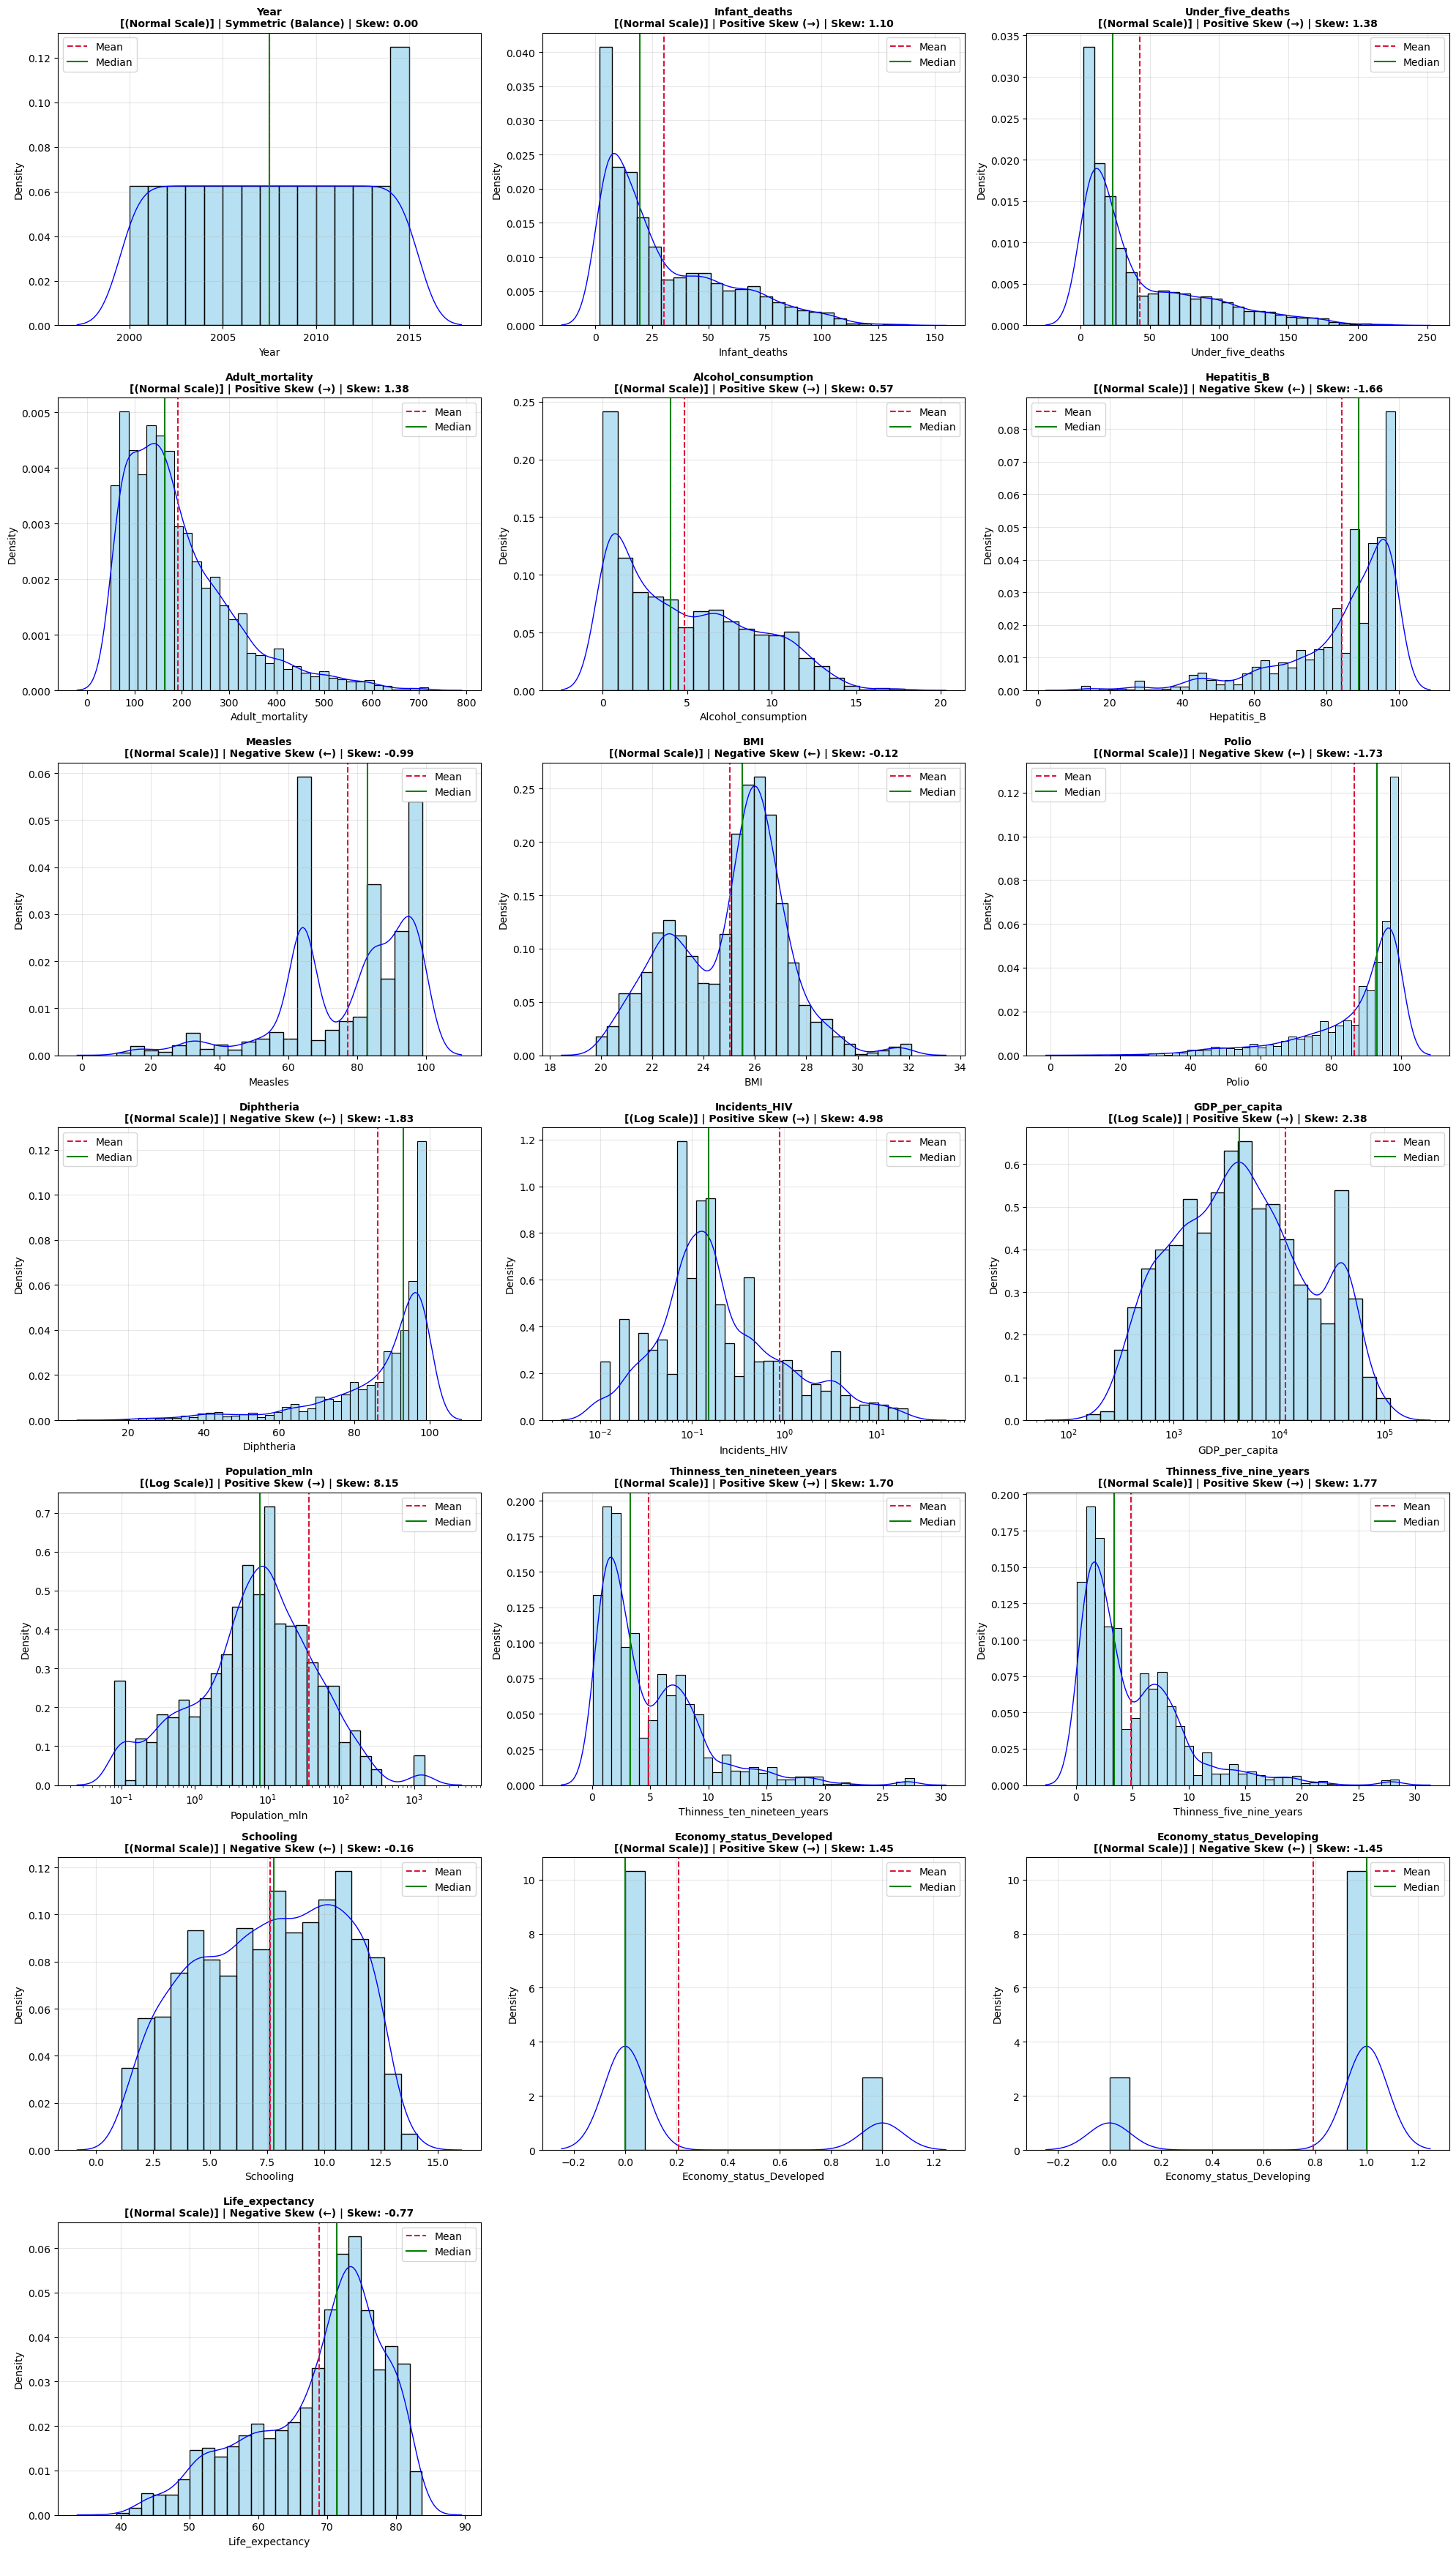

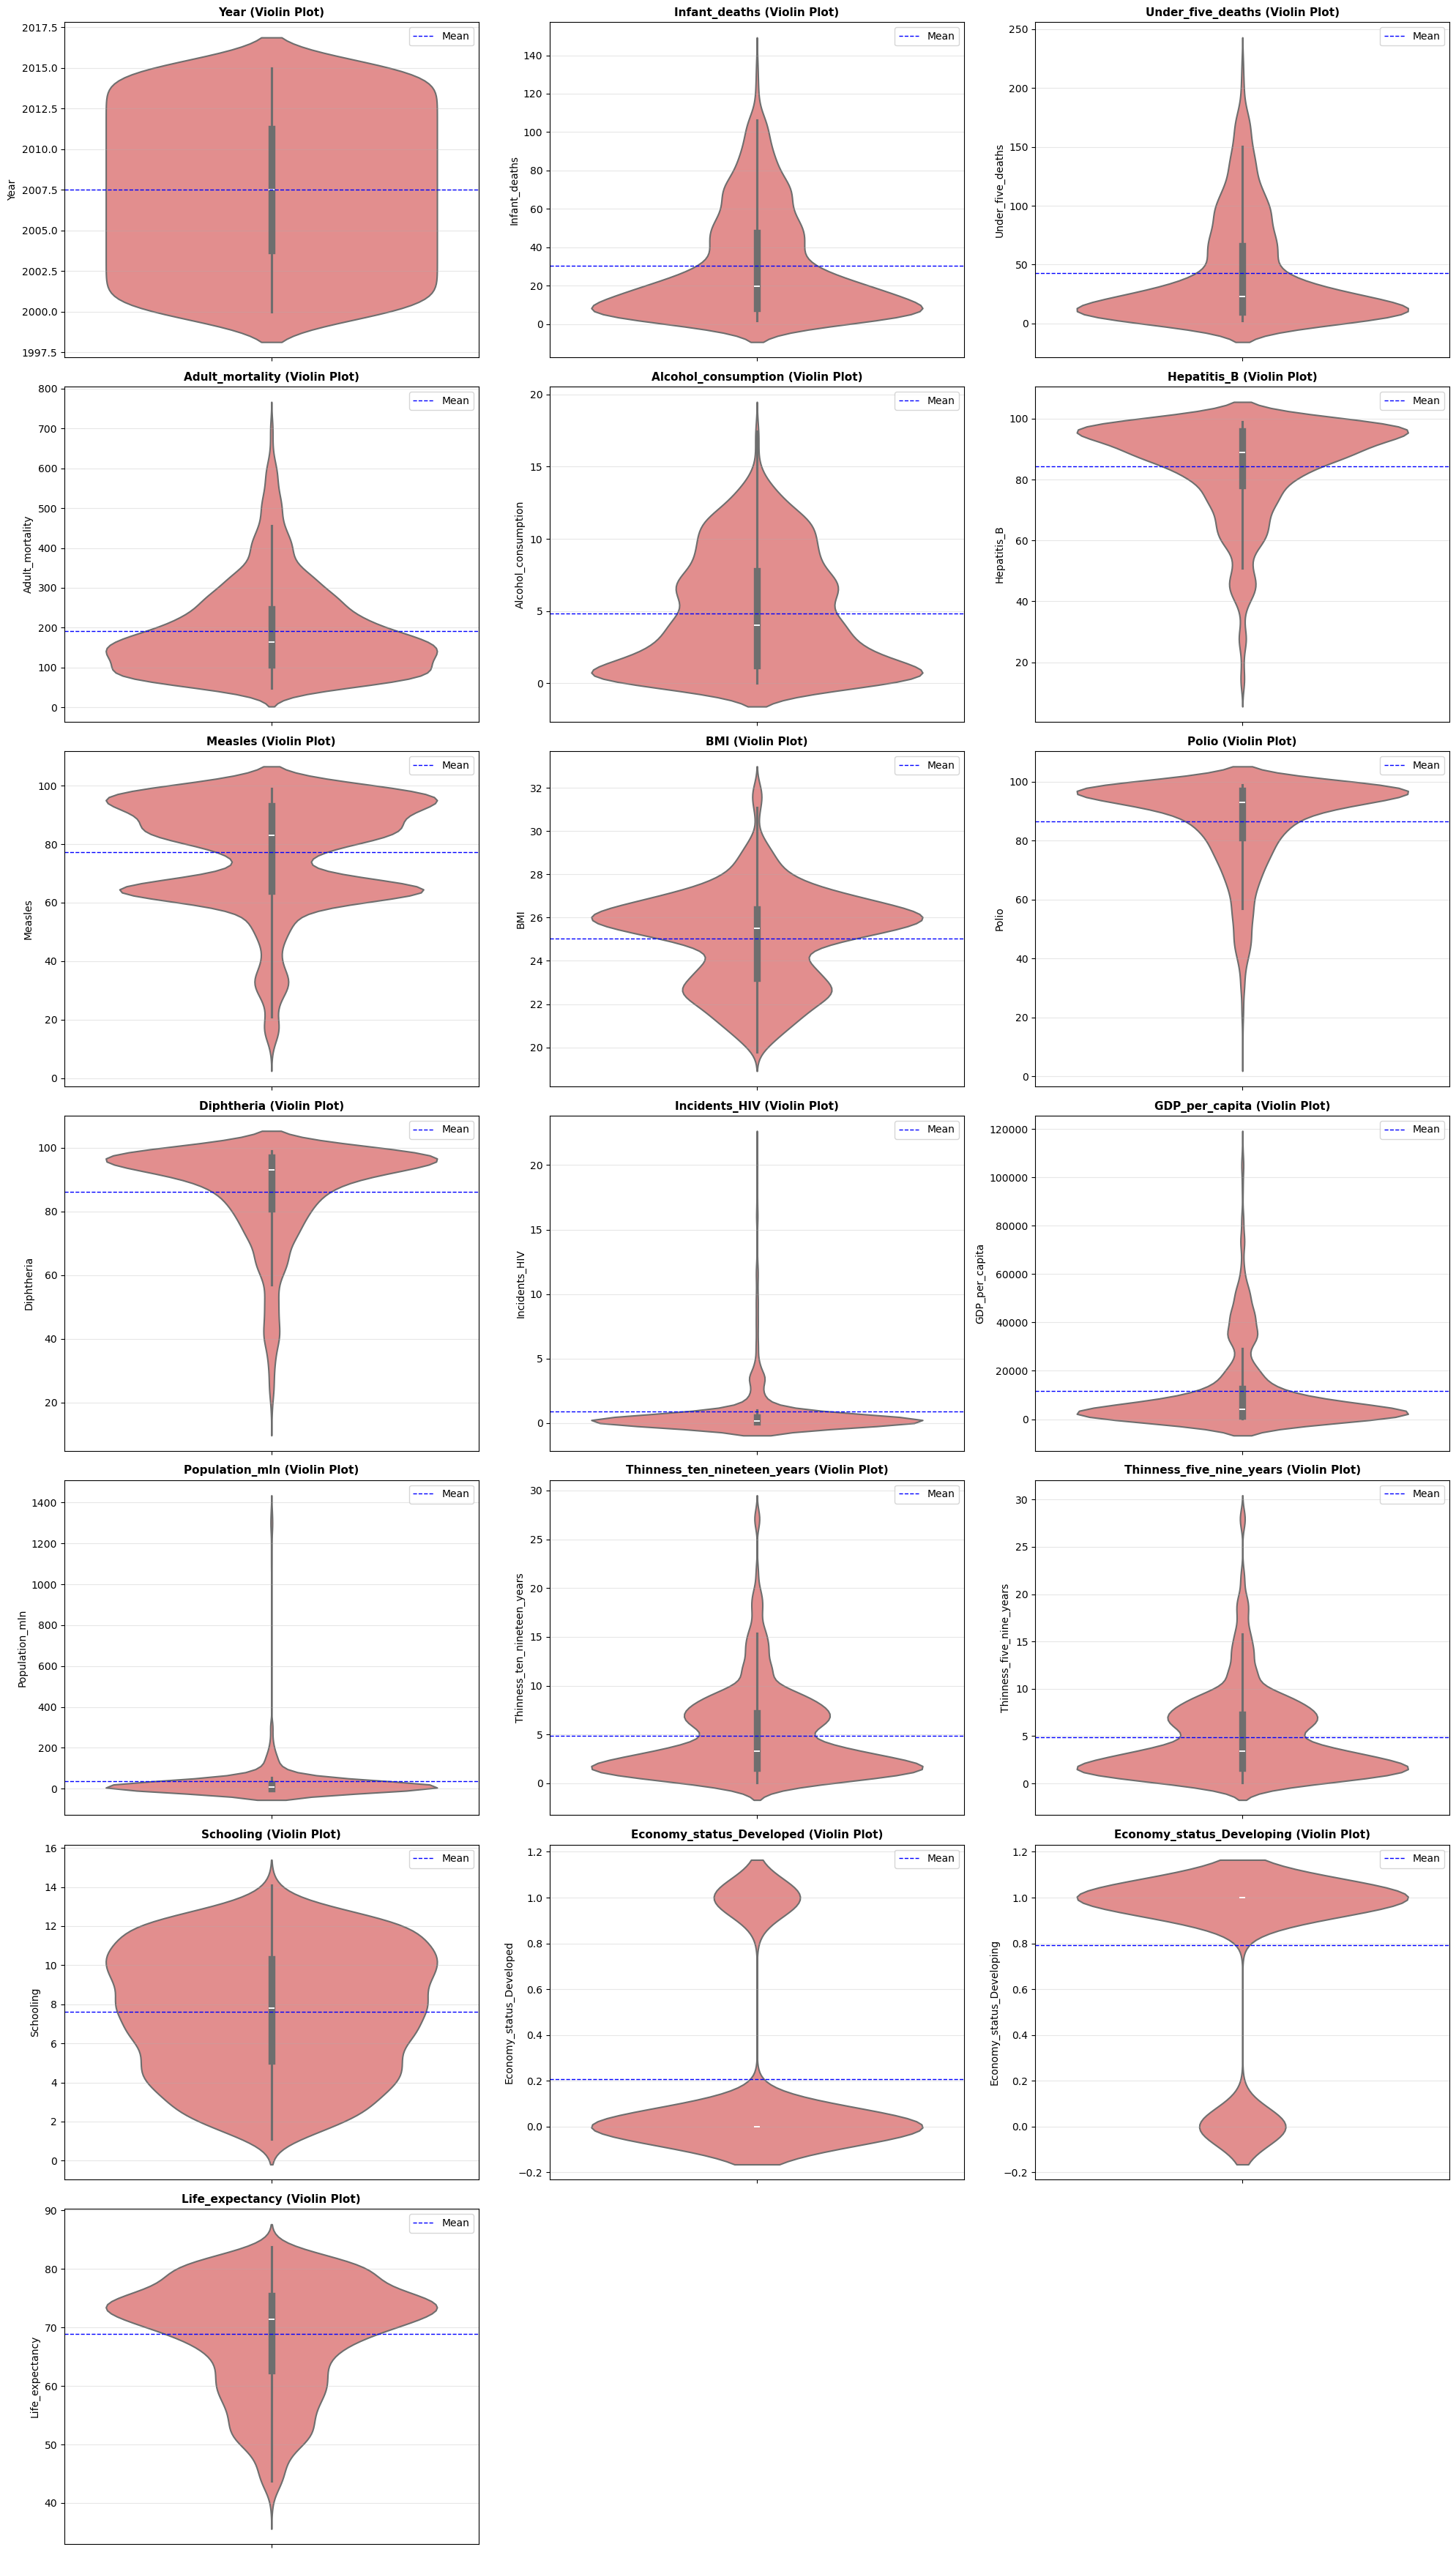

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"{'COLUMN':<30} | {'SKEWNESS ANALYSIS':<32} | {'KURTOSIS ANALYSIS':<40}")
print("-" * 110)

for col in numerical_cols:
    data = df[col].dropna()
    
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)
    
    # Skewness interpretation
    if abs(skew) < 0.5:
        skew_interp = "Approximately symmetric"
    elif skew > 0.5:
        skew_interp = "Right-skewed (positive)"
    else:
        skew_interp = "Left-skewed (negative)"
        
    # Kurtosis interpretation
    if kurt > 1:
        kurt_interp = "Heavy-tailed (outliers)"
    elif kurt < -1:
        kurt_interp = "Light-tailed (few outliers)"
    else:
        kurt_interp = "Approx. normal tails"

    print(f"{col:<30} | {skew:>6.2f} ({skew_interp:<23}) | {kurt:>6.2f} ({kurt_interp})")


n_cols_plot = len(numerical_cols)
n_rows = (n_cols_plot + 2) // 3
n_cols_grid = 3

fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(20, 5 * n_rows))
axes = axes.flatten() if n_cols_plot > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    skew_val = stats.skew(data)
    
    if skew_val > 0.1:
        skew_direction = "Positive Skew (→)"
    elif skew_val < -0.1:
        skew_direction = "Negative Skew (←)"
    else:
        skew_direction = "Symmetric (Balance)"
        
    use_log = bool((abs(skew_val) > 2) and (data.min() > 0))
    
    # Histogram & KDE plots
    sns.histplot(
        data=data, 
        ax=axes[idx], 
        stat='density',        
        kde=False,
        log_scale=use_log,
        color='skyblue',      
        edgecolor='black', 
        alpha=0.6
    )
    
    try:
        sns.kdeplot(
            data=data, 
            ax=axes[idx], 
            color='blue', 
            linewidth=1,
            log_scale=use_log,
            warn_singular=False
        )
    except:
        pass


    axes[idx].axvline(data.mean(), color='crimson', linestyle='--', linewidth=1.5, label='Mean')
    axes[idx].axvline(data.median(), color='green', linestyle='-', linewidth=1.5, label='Median')
    
    scale_label = "(Log Scale)" if use_log else "(Normal Scale)"
    title_text = f"{col}\n[{scale_label}] | {skew_direction} | Skew: {skew_val:.2f}"
    axes[idx].set_title(title_text, fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Density')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

# Violin plots
fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(20, 5 * n_rows))
axes = axes.flatten() if n_cols_plot > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    sns.violinplot(y=data, ax=axes[idx], color='lightcoral', inner='box', linewidth=1.5)
    axes[idx].axhline(data.mean(), color='blue', linestyle='--', linewidth=1, label='Mean')
    axes[idx].set_title(f'{col} (Violin Plot)', fontsize=11, fontweight='bold')
    axes[idx].legend(loc='upper right')
    axes[idx].grid(True, axis='y', alpha=0.3)

for idx in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

## Analysis of Distribution & Central Tendency

This section provides a comprehensive statistical assessment of all numerical variables in the dataset, examining their distribution characteristics, symmetry, and tendency toward outliers.

---

### 1. Statistical Metrics Overview

The analysis employs two critical statistical measures:

**A. Skewness (Measure of Asymmetry)**
- **Interpretation Scale:**
  - |Skewness| < 0.5: Approximately symmetric distribution
  - Skewness > 0.5: Right-skewed (positive skew) - long tail extends toward higher values
  - Skewness < -0.5: Left-skewed (negative skew) - long tail extends toward lower values

**B. Kurtosis (Measure of Tail Heaviness)**
- **Interpretation Scale:**
  - Kurtosis > 1: Heavy-tailed distribution (excess kurtosis, prone to outliers)
  - -1 < Kurtosis < 1: Approximately normal tails
  - Kurtosis < -1: Light-tailed distribution (fewer extreme values than normal distribution)

---

### 2. Distribution Pattern Analysis by Variable Groups

#### Group A: Symmetric & Well-Behaved Variables

Variables with near-normal distributions, ideal for linear modeling:

| Variable | Skewness | Kurtosis | Distribution Quality |
|----------|----------|----------|---------------------|
| **Year** | ~0.0 | Negative | Perfectly uniform (2000-2015 time series) |
| **Schooling** | ~0.0 | ~0.0 | Near-perfect normal distribution, most reliable predictor |
| **Life_expectancy** | Slight negative | ~0.0 | Approximately symmetric with minimal left skew |
| **BMI** | Slight positive | Moderate | Mostly normal with slight right tail (obesity cases) |
| **Alcohol_consumption** | Moderate positive | Moderate | Acceptable distribution, manageable skew |

**Implications:** These variables can be used directly in linear regression models without transformation.

#### Group B: Right-Skewed Variables (Inequality Indicators)

These variables exhibit strong positive skew, reflecting global disparities:

| Variable | Skewness | Kurtosis | Real-World Interpretation |
|----------|----------|----------|--------------------------|
| **GDP_per_capita** | High (>2.0) | Heavy-tailed | Extreme wealth gap: Few very rich countries, many poor countries |
| **Population_mln** | Very High (>3.0) | Extremely heavy | Dominated by giants (China, India), most countries small |
| **Incidents_HIV** | Extreme (>5.0) | Extremely heavy | Most countries near zero, Africa HIV crisis creates extreme outliers |
| **Infant_deaths** | High | Heavy | Reflects stark differences between developed/developing nations |
| **Under_five_deaths** | High | Heavy | Similar pattern to infant deaths |
| **Adult_mortality** | Moderate-High | Heavy | War zones and health crises create right tail |
| **Thinness (both age groups)** | Moderate positive | Moderate | Malnutrition concentrated in specific regions |

**Key Insight:** These variables represent **natural inequality** in global health and economics. The extreme values are genuine observations, not data errors, and should be retained for analysis.

**Modeling Recommendation:** Apply **log transformation** or **robust scaling** before using in linear models to normalize distributions.

#### Group C: Left-Skewed Variables (Immunization Coverage)

These variables show negative skew, indicating high performance with low outliers:

| Variable | Skewness | Distribution Pattern |
|----------|----------|---------------------|
| **Polio** | Negative | Most countries have high coverage (>90%), outliers at bottom |
| **Diphtheria** | Negative | Similar to Polio, global success with few laggards |
| **Hepatitis_B** | Moderate negative | Good global coverage, some countries lag |
| **Measles** | Slight negative | Relatively balanced, but most countries perform well |

**Interpretation:** These distributions reflect **successful global health initiatives** (WHO vaccination programs). Low outliers represent countries with weak health infrastructure or conflict zones.

---

### 3. Visualization Analysis

#### A. Histogram + KDE Plots

**Purpose:** Shows the shape of data distribution and identifies skewness visually.

**Key Observations:**
1. **Log-Scale Detection:** Variables with extreme right skew (skewness > 2.0) are automatically plotted on log scale for better visualization (e.g., `Population_mln`, `GDP_per_capita`, `Incidents_HIV`).

2. **Mean vs. Median Comparison:**
   - **Red dashed line (Mean):** Average value, sensitive to outliers
   - **Green solid line (Median):** Middle value, robust to outliers
   - **Interpretation:** When Mean > Median significantly, confirms right skew (outliers pull mean upward)

3. **Skew Direction Indicators:**
   - "Positive Skew (→)": Tail extends right
   - "Negative Skew (←)": Tail extends left
   - "Symmetric (Balance)": Approximately normal

**Example Interpretations:**
- **`Life_expectancy`:** Mean ≈ Median, symmetric bell curve → Normal distribution, ideal for analysis
- **`GDP_per_capita`:** Mean >> Median, long right tail → Wealth inequality visible in histogram
- **`Incidents_HIV`:** Extreme concentration near zero with tiny right tail → Need log scale to see pattern

#### B. Violin Plots

**Purpose:** Combines box plot (quartiles) with density distribution, showing data concentration areas.

**Key Features:**
1. **Width of violin:** Indicates where data is most concentrated (probability density)
2. **Inner box:** Shows quartiles (Q1, Median, Q3) and interquartile range (IQR)
3. **Blue dashed line:** Mean value for reference

**Distribution Patterns Observed:**

| Pattern Type | Example Variables | Visual Characteristics | Meaning |
|--------------|-------------------|----------------------|---------|
| **Symmetric diamond** | `Schooling`, `Life_expectancy` | Widest in middle, tapers evenly top/bottom | Normal distribution |
| **Bottom-heavy bulb** | `Polio`, `Diphtheria` | Wide at top, narrow at bottom | Most values high, few low outliers |
| **Top-heavy teardrop** | `Incidents_HIV`, `GDP` | Wide at bottom, thin tail upward | Most values low, few extreme highs |
| **Dual bulges** | `Economy_status` variables | Two distinct density peaks | Bimodal (developed vs. developing) |

---

### 4. Data Quality & Modeling Implications

#### A. Variables Ready for Direct Use

- `Year`, `Schooling`, `Life_expectancy`, `BMI`, `Alcohol_consumption`
- These have acceptable distributions and can be used in models without transformation

#### B. Variables Requiring Transformation

- **Log transformation needed:** `GDP_per_capita`, `Population_mln`, `Incidents_HIV`
- **Robust scaling recommended:** All mortality and thinness variables
- **Reason:** Reduces impact of extreme outliers on linear model coefficients

#### C. Variables with Interpretation Challenges

- **Immunization variables (Polio, Diphtheria, etc.):**
  - Left-skewed with ceiling effect (cannot exceed 100%)
  - Consider using as categorical (Low/Medium/High coverage) for some analyses
  - Or apply Beta distribution modeling instead of assuming normality

---

### 5. Summary of Key Findings

1. **Global Health Inequality is Evident:**
   - Economic variables (GDP) and disease burden (HIV, mortality) show extreme right skew
   - This reflects real-world disparities between developed and developing nations

2. **Vaccination Programs Show Success:**
   - Left-skewed distributions for immunization coverage indicate most countries perform well
   - Low outliers (countries with coverage <60%) deserve policy attention

3. **Target Variable (`Life_expectancy`) is Well-Behaved:**
   - Approximately normal distribution with minimal skew
   - Excellent for regression modeling
   - Outliers (<44 years) represent crisis situations worth investigating

4. **Data Preprocessing Strategy:**
   - No transformations needed for: Year, Schooling, Life_expectancy, BMI, Alcohol
   - Log transformation for: GDP, Population, HIV incidents
   - Robust scaling for: All mortality rates and thinness indicators
   - Consider alternative distributions for: Immunization percentage variables

5. **Outlier Philosophy:**
   - **Do not remove extreme values** in inequality-related variables (GDP, HIV, mortality)
   - These represent genuine global diversity, not measurement errors
   - Use robust modeling techniques (Random Forest, Ridge Regression) that handle outliers well

---

This comprehensive distribution analysis provides the statistical foundation for all subsequent modeling decisions, ensuring that data transformations and algorithm choices are appropriate for the underlying data characteristics.

<a id="c422"></a>
#### 4.2.2 Range & Outliers


Range and Outlier Summary:



Column       Min          Max        Range  \
0                          Year  2000.000    2015.0000      15.0000   
1                 Infant_deaths     1.800     138.1000     136.3000   
2             Under_five_deaths     2.300     224.9000     222.6000   
3               Adult_mortality    49.384     719.3605     669.9765   
4           Alcohol_consumption     0.000      17.8700      17.8700   
5                   Hepatitis_B    12.000      99.0000      87.0000   
6                       Measles    10.000      99.0000      89.0000   
7                           BMI    19.800      32.1000      12.3000   
8                         Polio     8.000      99.0000      91.0000   
9                    Diphtheria    16.000      99.0000      83.0000   
10                Incidents_HIV     0.010      21.6800      21.6700   
11               GDP_per_capita   148.000  112418.0000  112270.0000   
12               Population_mln     0.080    1379.8600    1379.7800   
13  Thinness_ten_nineteen_years     0.100      27.7000      27.6000   
14     Thinness_five_nine_years     0.100      28.6000      28.5000   
15                    Schooling     1.100      14.1000      13.0000   
16     Economy_status_Developed     0.000       1.0000       1.0000   
17    Economy_status_Developing     0.000       1.0000       1.0000   
18              Life_expectancy    39.400      83.8000      44.4000   

       Median          Mean          Q1            Q3           IQR  \
0   2007.5000   2007.500000  2003.75000   2011.250000      7.500000   
1     19.6000     30.363792     8.10000     47.350000     39.250000   
2     23.1000     42.938268     9.67500     66.000000     56.325000   
3    163.8415    192.251775   106.91025    246.791375    139.881125   
4      4.0200      4.820882     1.20000      7.777500      6.577500   
5     89.0000     84.292598    78.00000     96.000000     18.000000   
6     83.0000     77.344972    64.00000     93.000000     29.000000   
7     25.5000     25.032926    23.20000     26.400000      3.200000   
8     93.0000     86.499651    81.00000     97.000000     16.000000   
9     93.0000     86.271648    81.00000     97.000000     16.000000   
10     0.1500      0.894288     0.08000      0.460000      0.380000   
11  4217.0000  11540.924930  1415.75000  12557.000000  11141.250000   
12     7.8500     36.675915     2.09750     23.687500     21.590000   
13     3.3000      4.865852     1.60000      7.200000      5.600000   
14     3.4000      4.899825     1.60000      7.300000      5.700000   
15     7.8000      7.632123     5.10000     10.300000      5.200000   
16     0.0000      0.206704     0.00000      0.000000      0.000000   
17     1.0000      0.793296     1.00000      1.000000      0.000000   
18    71.4000     68.856075    62.70000     75.400000     12.700000   

     Lower_Bound   Upper_Bound  Outliers_IQR  Outliers_IQR_%  Outliers_Z  
0    1992.500000   2022.500000             0        0.000000           0  
1     -50.775000    106.225000            29        1.012570          14  
2     -74.812500    150.487500           102        3.561453          28  
3    -102.911438    456.613063           112        3.910615          49  
4      -8.666250     17.643750             2        0.069832           5  
5      51.000000    123.000000           164        5.726257          46  
6      20.500000    136.500000            35        1.222067          39  
7      18.400000     31.200000            25        0.872905          13  
8      57.000000    121.000000           190        6.634078          53  
9      57.000000    121.000000           187        6.529330          63  
10     -0.490000      1.030000           461       16.096369          77  
11 -15296.125000  29268.875000           425       14.839385          54  
12    -30.287500     56.072500           362       12.639665          32  
13     -6.800000     15.600000            89        3.107542          53  
14     -6.950000     15.850000            95        3.3170


Column: Year
    Range: [2000.00, 2015.00]
    Values appear reasonable

    No outliers detected (IQR method)

Column: Infant_deaths
    Range: [1.80, 138.10]
    Values appear reasonable

    Outliers (IQR method):
    Count: 29 (1.01%)
    Lower bound: -50.77
    Upper bound: 106.22
    Outlier range: [106.50, 138.10]

Column: Under_five_deaths
    Range: [2.30, 224.90]
    Values appear reasonable

    Outliers (IQR method):
    Count: 102 (3.56%)
    Lower bound: -74.81
    Upper bound: 150.49
    Outlier range: [150.70, 224.90]

Column: Adult_mortality
    Range: [49.38, 719.36]
    Values appear reasonable

    Outliers (IQR method):
    Count: 112 (3.91%)
    Lower bound: -102.91
    Upper bound: 456.61
    Outlier range: [459.62, 719.36]

Column: Alcohol_consumption
    Range: [0.00, 17.87]
    Values appear reasonable

    Outliers (IQR method):
    Count: 2 (0.07%)
    Lower bound: -8.67
    Upper bound: 17.64
    Outlier range: [17.75, 17.87]

Column: Hepatitis_B
    Range

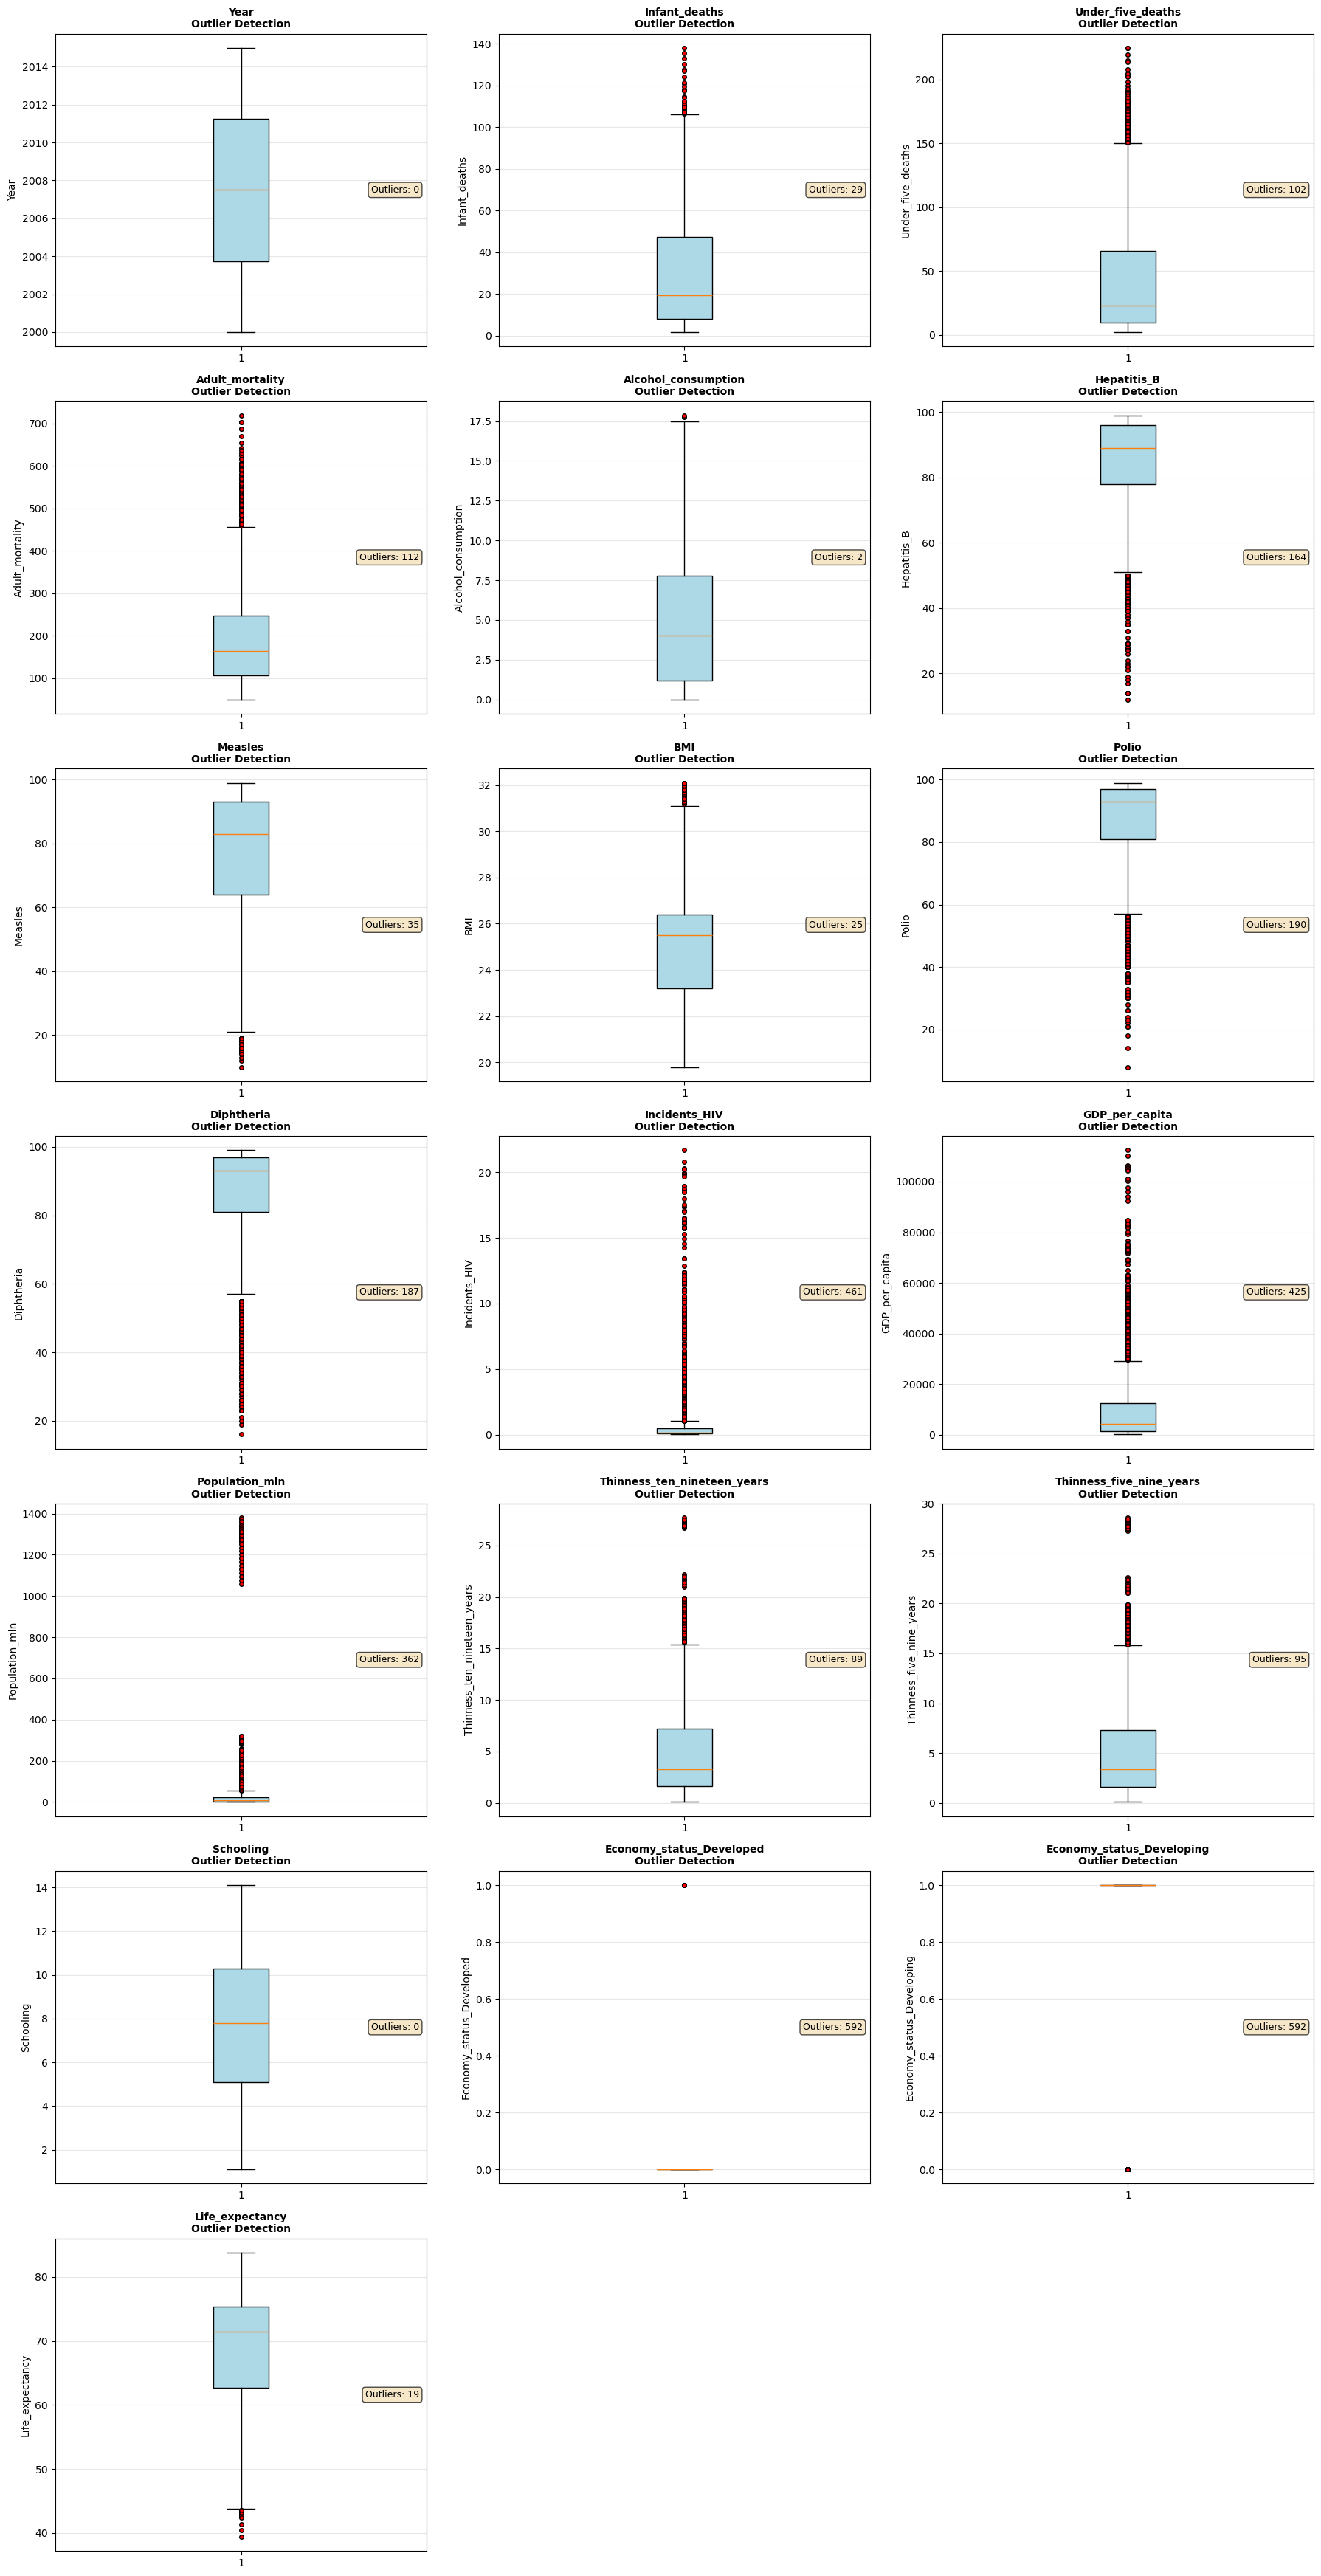

In [8]:
range_summary = []

for col in numerical_cols:
    data = df[col].dropna()
    
    if len(data) == 0:
        continue

    min_val = data.min()
    max_val = data.max()
    range_val = max_val - min_val
    mean_val = data.mean()
    median_val = data.median()
    
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    n_outliers = len(outliers)
    pct_outliers = (n_outliers / len(data)) * 100
    
    # Z-score method (values beyond 3 standard deviations)
    z_scores = np.abs(stats.zscore(data))
    z_outliers = len(data[z_scores > 3])
    
    range_summary.append({
        'Column': col,
        'Min': min_val,
        'Max': max_val,
        'Range': range_val,
        'Median': median_val,
        'Mean': mean_val,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers_IQR': n_outliers,
        'Outliers_IQR_%': pct_outliers,
        'Outliers_Z': z_outliers
    })

range_df = pd.DataFrame(range_summary)
print("\nRange and Outlier Summary:\n")
display(range_df)


for col in numerical_cols:
    data = df[col].dropna()
    
    if len(data) == 0:
        continue
    
    print(f"\nColumn: {col}")
    
    min_val = data.min()
    max_val = data.max()
    
    print(f"    Range: [{min_val:.2f}, {max_val:.2f}]")
    
    # Check if values are reasonable
    reasonable = True
    concerns = []
    
    # Check for negative values where they shouldn't exist
    if col in ['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
               'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria', 
               'Population_mln', 'Schooling', 'Life_expectancy']:
        if min_val < 0:
            reasonable = False
            concerns.append(f"Negative values found (min: {min_val:.2f})")
    
    # Check for percentage columns
    if col in ['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']:
        if max_val > 100:
            reasonable = False
            concerns.append(f"Values exceed 100% (max: {max_val:.2f})")
    
    # Check for binary columns
    if col in ['Economy_status_Developed', 'Economy_status_Developing']:
        if min_val < 0 or max_val > 1:
            reasonable = False
            concerns.append(f"Binary values outside [0,1] range")
    
    if reasonable:
        print(f"    Values appear reasonable")
    else:
        print(f"    Concerns identified:")
        for concern in concerns:
            print(f"    - {concern}")
    
    # IQR outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    n_outliers = len(outliers)
    
    if n_outliers > 0:
        print(f"\n    Outliers (IQR method):")
        print(f"    Count: {n_outliers} ({(n_outliers/len(data)*100):.2f}%)")
        print(f"    Lower bound: {lower_bound:.2f}")
        print(f"    Upper bound: {upper_bound:.2f}")
        print(f"    Outlier range: [{outliers.min():.2f}, {outliers.max():.2f}]")
    else:
        print(f"\n    No outliers detected (IQR method)")

# Box plots
fig, axes = plt.subplots(n_rows, n_cols_grid, figsize=(18, 5*n_rows))
axes = axes.flatten() if len(numerical_cols) > 1 else [axes]

for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    bp = axes[idx].boxplot(data, vert=True, patch_artist=True,
                           boxprops=dict(facecolor='lightblue'),
                           flierprops=dict(marker='o', markerfacecolor='red', 
                                          markersize=4, linestyle='none'))
    
    axes[idx].set_title(f'{col}\nOutlier Detection', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel(col)
    axes[idx].grid(True, alpha=0.3, axis='y')
    
    # Add outlier count box at middle right
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data < lower_bound) | (data > upper_bound)])
    
    axes[idx].text(0.98, 0.5, f'Outliers: {n_outliers}', 
                   transform=axes[idx].transAxes,
                   verticalalignment='center', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
                   fontsize=9)

for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()



## Analysis of Range & Outliers

This section examines the data ranges, identifies outliers using IQR and Z-score methods, and provides recommendations for outlier handling in subsequent modeling phases.

---

### 1. Overall Assessment of Data Quality

Based on descriptive statistics (Range) and IQR method:
* **Reasonability:** Data have logically reasonable values (*Values appear reasonable*). No unreasonable values (such as negative life expectancy, percentage > 100%, etc.) appear.
* **Distribution characteristics:** Data clearly reflect global inequality, divided into developed and developing country groups.

---

### 2. Detailed Analysis by Variable Group

#### Group 1: Variables with Good Distribution (No Outliers / Stable)

These are variables with high reliability, normal or uniform distribution, very good for modeling.

| Variables | Comments |
| :--- | :--- |
| **Year** | **No outliers.** Uniform distribution from 2000-2015 (time series). |
| **Schooling** | **No outliers.** Data range from 1.1 to 14.1 years. This is the "cleanest" variable and is expected to have a strong linear correlation with life expectancy. |
| **Alcohol_consumption** | **Very few outliers (0.07%).** Only 2 insignificant outliers. Stable distribution. |
| **BMI** | **Few outliers (0.87%).** Outliers are at the upper threshold (obesity), but not yet prevalent in most countries during this period. |

#### Group 2: Right-Skewed Variables - "Inequality & Disadvantage" Group

These variables are characterized by: Low mean values, but a large number of **extremely high** values (High Outliers). These are **Natural Outliers** that reflect social reality, **not to be deleted**.

**Economics & Society:**
* **`GDP_per_capita` (14.84% outlier):** Huge wealth gap between developed countries (Europe, America) and the rest.
* **`Population_mln` (12.64% outlier):** Billion-population countries (China, India) are outliers compared to the rest of the world.

**Disease & Nutrition:**
* **`Incidents_HIV` (16.10% outlier):** Most countries have low rates, outliers are countries (mainly Africa) with widespread epidemics.
* **`Thinness 10-19 years` & `5-9 years` (~3% outlier):** Outliers are at the upper threshold, representing countries with severe hunger and malnutrition.

**Mortality Rate:**
* **`Infant_deaths`, `Under_five_deaths`, `Adult_mortality`:** Outlier rates range from 1-4%. These outliers represent countries with poor health conditions or war/natural disasters.

#### Group 3: Left-Skewed Variables - "Vaccination & Prevention" Group

These variables have the following characteristics: Most countries have high rates (good), outliers located at the **bottom** (Low Outliers) represent countries that do not do well.

* **Variables:** `Polio`, `Diphtheria`, `Hepatitis_B`, `Measles`.
* **Comments:** Outlier rates range from 1.2% to 6.6%. These outliers (immunization coverage < 50-60%) need attention as they reflect a weak health system.

#### Group 4: Categorical Variables

* **Variables:** `Economy_status_Developed`, `Economy_status_Developing`.
* **Comment:** The IQR method reporting ~20% outliers is **inaccurate**. This is a binary variable (0/1). This phenomenon only reflects the **Imbalanced Data** (the number of developing countries is greater than that of developed countries), not an outlier that needs to be addressed.

---

### 3. Analysis of the Target Variable

* **Variable:** `Life_expectancy`
* **Condition:** The data is very clean and approximately normally distributed.
* **Outliers:** Very low, only **0.66% (19 observations)**.
* **Position:** Below the threshold (< 43.65 years old).
* **Significance:** These are special cases (possibly due to humanitarian disasters). These 19 rows need to be carefully checked:
  * If it is a data entry error → Delete/Edit.
  * If it is real data → Keep for root cause analysis.

---

### 4. Conclusion & Action Plan Recommendations

**1. Outlier Handling:**
* **Decision:** **DO NOT DELETE** most of the outliers (especially the GDP, Population, HIV groups) because they have important statistical significance for global differentiation.
* **Exception:** Only consider deleting the 19 outlier rows of `Life_expectancy` if it is determined to be a data error.

**2. Modeling Strategy:**
* Due to the strong skewed data in many important variables, when running the Regression model, the team needs to:
  * Use **Log Transformation** or **Robust Scaling** for the variables: `GDP`, `Population`, `HIV`, `Measles`.
  * Consider using tree models (Decision Tree, Random Forest) because they are less affected by outliers than Linear Regression.

**3. Note on Multicollinearity:**
* The two variables `Thinness_ten_nineteen_years` and `Thinness_five_nine_years` have identical distribution and outlier properties → Very high correlation → Consider choosing only 1 of the 2 variables to include in the model.

<a id="c423"></a>
#### 4.2.3 Data Quality (Numerical)


Data Quality Summary:



Column  Total_Count  Missing_Count  Missing_%  \
0                          Year         2864              0        0.0   
1                 Infant_deaths         2864              0        0.0   
2             Under_five_deaths         2864              0        0.0   
3               Adult_mortality         2864              0        0.0   
4           Alcohol_consumption         2864              0        0.0   
5                   Hepatitis_B         2864              0        0.0   
6                       Measles         2864              0        0.0   
7                           BMI         2864              0        0.0   
8                         Polio         2864              0        0.0   
9                    Diphtheria         2864              0        0.0   
10                Incidents_HIV         2864              0        0.0   
11               GDP_per_capita         2864              0        0.0   
12               Population_mln         2864              0        0.0   
13  Thinness_ten_nineteen_years         2864              0        0.0   
14     Thinness_five_nine_years         2864              0        0.0   
15                    Schooling         2864              0        0.0   
16     Economy_status_Developed         2864              0        0.0   
17    Economy_status_Developing         2864              0        0.0   
18              Life_expectancy         2864              0        0.0   

    Impossible_Values Impossible_Issues  Potential_Placeholders  \
0                   0              None                       0   
1                   0              None                       0   
2                   0              None                       0   
3                   0              None                       0   
4                   0              None                       0   
5                   0              None                       0   
6                   0              None                       0   
7                   0              None                       0   
8                   0              None                       0   
9                   0              None                       0   
10                  0              None                       0   
11                  0              None                       0   
12                  0              None                       0   
13                  0              None                       0   
14                  0              None                       0   
15                  0              None                       0   
16                  0              None                       0   
17                  0              None                       0   
18                  0              None                       0   

   Placeholder_Issues  
0                None  
1                None  
2                None  
3                None  
4                None  
5                None  
6                None  
7                None  
8                None  
9                None  
10               None  
11               None  
12               None  
13               None  
14               None  
15               None  
16               None  
17               None  
18               None


No significant data quality issues found in numerical columns!


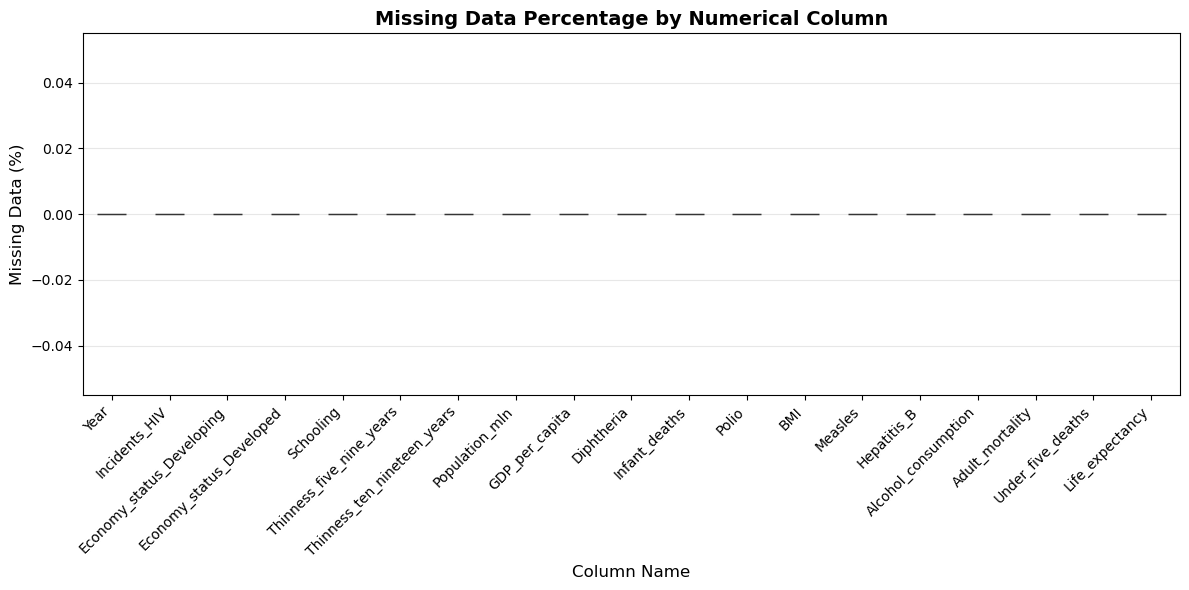

In [9]:
quality_summary = []

for col in numerical_cols:
    total_count = len(df[col])
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / total_count) * 100
    
    non_missing = df[col].dropna()
    
    # Check for impossible values
    impossible_count = 0
    impossible_issues = []
    
    if len(non_missing) > 0:
        # Negative values where they shouldn't exist
        if col in ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
                   'Hepatitis_B', 'Measles', 'BMI', 'Polio', 'Diphtheria',
                   'Population_mln', 'Schooling', 'Life_expectancy', 'GDP_per_capita']:
            neg_count = (non_missing < 0).sum()
            if neg_count > 0:
                impossible_count += neg_count
                impossible_issues.append(f"{neg_count} negative values")
        
        # Percentage columns exceeding 100
        if col in ['Hepatitis_B', 'Measles', 'Polio', 'Diphtheria']:
            over_100 = (non_missing > 100).sum()
            if over_100 > 0:
                impossible_count += over_100
                impossible_issues.append(f"{over_100} values > 100%")
        
        # Binary columns outside [0,1]
        if col in ['Economy_status_Developed', 'Economy_status_Developing']:
            out_of_range = ((non_missing < 0) | (non_missing > 1)).sum()
            if out_of_range > 0:
                impossible_count += out_of_range
                impossible_issues.append(f"{out_of_range} values outside [0,1]")
    
    # Check for placeholder values (common placeholders: 0, -1, 999, 9999)
    placeholder_count = 0
    placeholder_issues = []
    
    if len(non_missing) > 0:
        # Check for excessive zeros (might indicate missing data)
        if col not in ['Economy_status_Developed', 'Economy_status_Developing']:
            zero_count = (non_missing == 0).sum()
            zero_pct = (zero_count / len(non_missing)) * 100
            
            # If more than 5% are zeros, might be suspicious
            if zero_pct > 5 and col not in ['Incidents_HIV']:  # HIV can legitimately be 0
                placeholder_count += zero_count
                placeholder_issues.append(f"{zero_count} zeros ({zero_pct:.1f}%)")
        
        # Check for -1 (common missing indicator)
        neg_one_count = (non_missing == -1).sum()
        if neg_one_count > 0:
            placeholder_count += neg_one_count
            placeholder_issues.append(f"{neg_one_count} values = -1")
        
        # Check for 999 or 9999
        placeholder_999 = ((non_missing == 999) | (non_missing == 9999)).sum()
        if placeholder_999 > 0:
            placeholder_count += placeholder_999
            placeholder_issues.append(f"{placeholder_999} values = 999/9999")
    
    quality_summary.append({
        'Column': col,
        'Total_Count': total_count,
        'Missing_Count': missing_count,
        'Missing_%': missing_pct,
        'Impossible_Values': impossible_count,
        'Impossible_Issues': '; '.join(impossible_issues) if impossible_issues else 'None',
        'Potential_Placeholders': placeholder_count,
        'Placeholder_Issues': '; '.join(placeholder_issues) if placeholder_issues else 'None'
    })

quality_df = pd.DataFrame(quality_summary)

print("\nData Quality Summary:\n")
display(quality_df)

print("\nNo significant data quality issues found in numerical columns!")


missing_pct = (df[numerical_cols].isnull().sum() / len(df) * 100).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing_pct.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Missing Data Percentage by Numerical Column', fontsize=14, fontweight='bold')
plt.xlabel('Column Name', fontsize=12)
plt.ylabel('Missing Data (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


## Analysis of Numerical Data Quality

This section evaluates the quality of numerical data through missing value analysis, impossible value detection, and placeholder identification.

---

### 1. Missing Data Assessment

Based on the visualization chart **"Missing Data Percentage by Numerical Column"**, the team assessed the completeness of the quantitative variables (numerical features) and noted the following points:

* **Missing Rate:** The vertical axis shows the percentage of missing data. Observing the chart shows that all numeric attribute columns have a value of **0.0%**.
* **Variables tested:** Including all important statistical indicators such as `Infant_deaths`, `Adult_mortality`, `GDP_per_capita`, `Schooling`, `BMI` and especially the target variable `Life_expectancy`.
* **Conclusion:** The current dataset is **complete** for numeric columns, containing no empty values (`NaN` or `NULL`) that need to be processed.

---

### 2. Implications for Preprocessing

The absence of missing numeric data has a big advantage for the next steps:

1. **No Imputation Needed:** No need to apply Imputation techniques such as replacing with mean, median or predictive models, which helps avoid distorting the original distribution of the data.
2. **Resource Optimization:** Allows the team to use 100% of the sample size for correlation analysis and machine learning model building steps without having to discard any rows.

<a id="c43"></a>
### 4.3 Categorical Columns Analysis

<a id="c431"></a>
#### 4.3.1 Value Distribution


Categorical columns: ['Country', 'Region']

Column: Country
    Total values:      2,864
    Unique values:     179
    Missing values:    0 (0.00%)

    Top 10 Most Frequent Values:
    Value                          Count      Percentage
    ------------------------------ ---------- ----------
    Afghanistan                    16           0.56%
    Rwanda                         16           0.56%
    Nepal                          16           0.56%
    Netherlands                    16           0.56%
    New Zealand                    16           0.56%
    Nicaragua                      16           0.56%
    Niger                          16           0.56%
    Nigeria                        16           0.56%
    North Macedonia                16           0.56%
    Norway                         16           0.56%
    ... and 169 more unique values

    Distribution Analysis:
    Panel data detected: All entities have exactly 16 records
    (This confirms the dataset struct

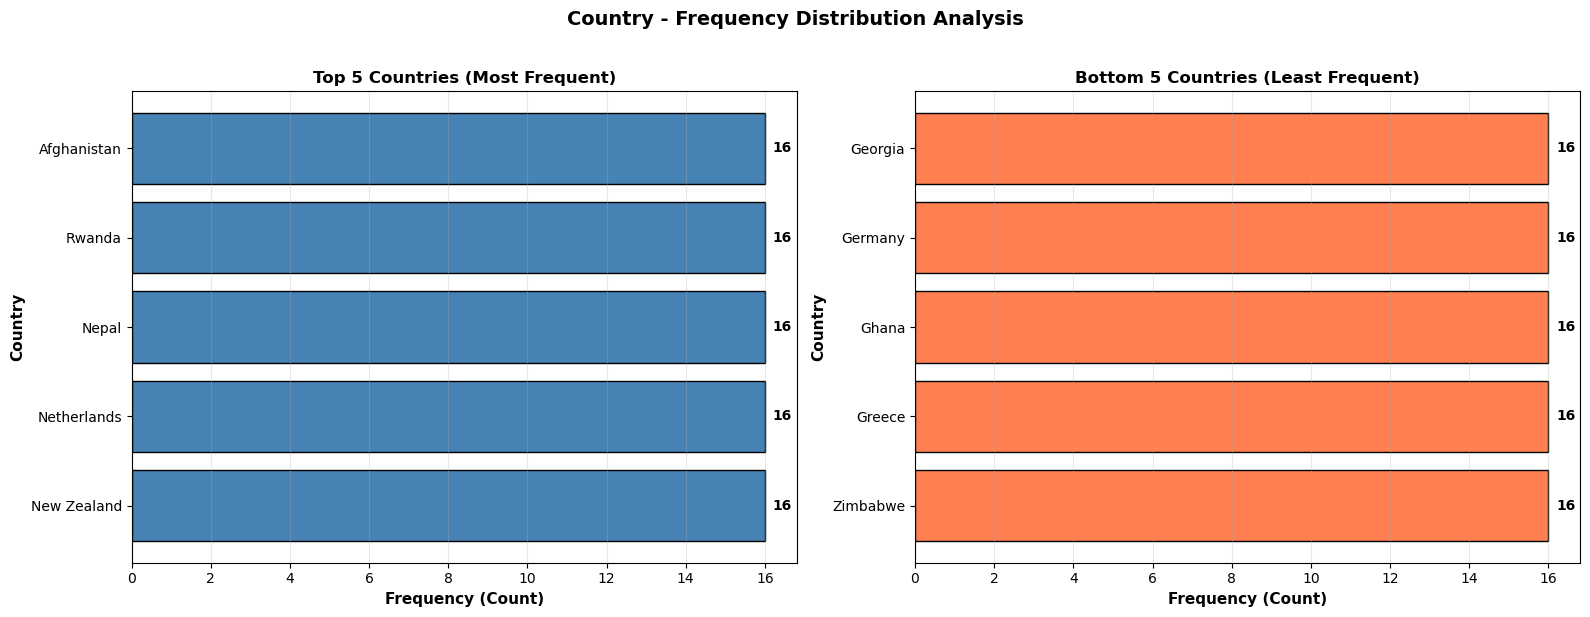


    Conclusion: High cardinality (179 unique values) and uniform distribution (16 records each).
    ==> All countries appear exactly 16 times (balanced panel data)


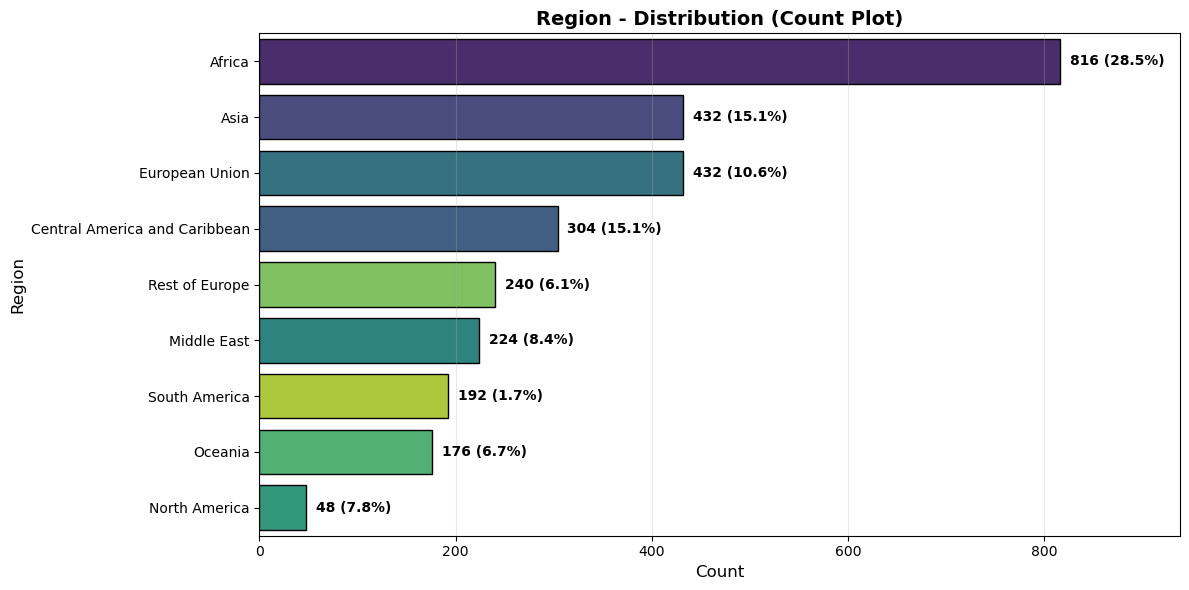

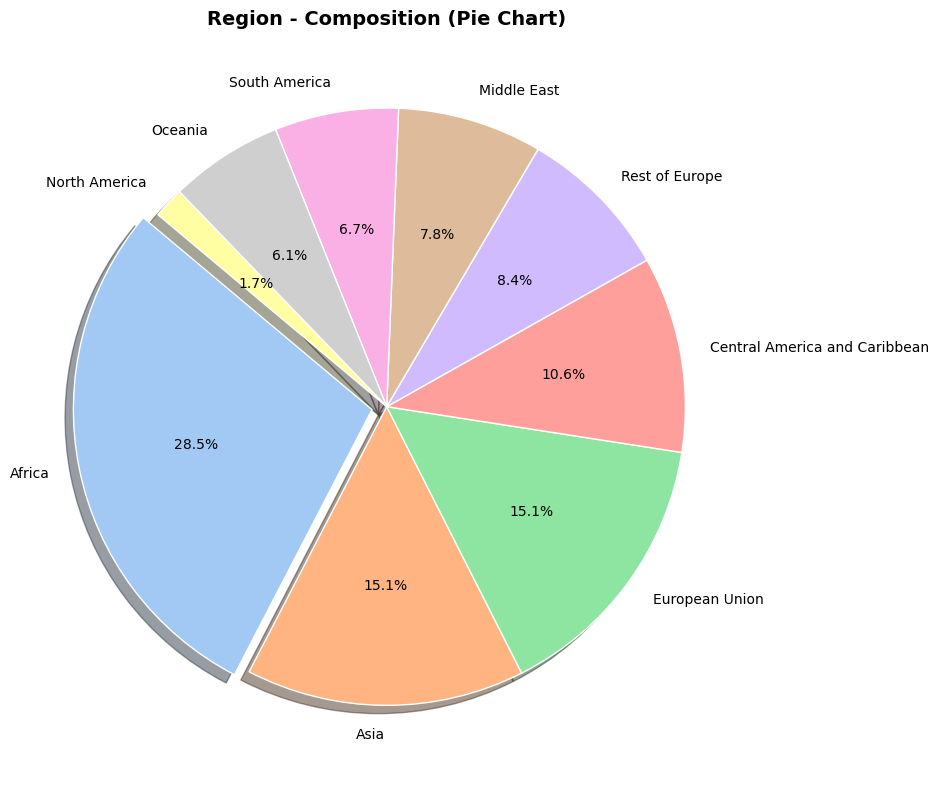

In [10]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nCategorical columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\nColumn: {col}")
    
    total_count = len(df[col])
    unique_count = df[col].nunique()
    missing_count = df[col].isnull().sum()
    
    print(f"    Total values:      {total_count:,}")
    print(f"    Unique values:     {unique_count}")
    print(f"    Missing values:    {missing_count} ({(missing_count/total_count*100):.2f}%)")
    
    value_counts = df[col].value_counts()
    value_percentages = df[col].value_counts(normalize=True) * 100
    
    print(f"\n    Top 10 Most Frequent Values:")
    print(f"    {'Value':<30} {'Count':<10} {'Percentage'}")
    print(f"    {'-'*30} {'-'*10} {'-'*10}")
    
    top_values = value_counts.head(10)
    for value, count in top_values.items():
        pct = value_percentages[value]
        print(f"    {str(value):<30} {count:<10} {pct:>6.2f}%")
    
    if unique_count > 10:
        print(f"    ... and {unique_count - 10} more unique values")
    

    print(f"\n    Distribution Analysis:")
    
    if col == 'Country' or (unique_count > 50 and value_counts.std() == 0):
        print(f"    Panel data detected: All entities have exactly {value_counts.iloc[0]} records")
        print(f"    (This confirms the dataset structure is Time-Series per Country)")
    
    elif unique_count == 1:
        print(f"    Only one unique value - no variation")
    elif unique_count == 2:
        ratio = value_counts.iloc[0] / value_counts.iloc[1] if len(value_counts) > 1 else float('inf')
        if ratio > 10 or ratio < 0.1:
            print(f"    Highly imbalanced ({ratio:.1f}:1 ratio)")
        else:
            print(f"    Relatively balanced ({ratio:.1f}:1 ratio)")
    else:
        max_pct = value_percentages.iloc[0]
        if max_pct > 50:
            print(f"    Dominant category: '{value_counts.index[0]}' ({max_pct:.1f}%)")
        else:
            print(f"    Relatively balanced distribution")


for col in categorical_cols:
    if col == 'Country':
        print(f"\nSpecial visualization for '{col}':")
        
        value_counts = df[col].value_counts()
        
        # Get top 5 and bottom 5
        top_5 = value_counts.head(5)
        bottom_5 = value_counts.tail(5).sort_values(ascending=False)
        
        # Create figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Left subplot: Top 5 countries
        ax1.barh(range(len(top_5)), top_5.values, color='steelblue', edgecolor='black')
        ax1.set_yticks(range(len(top_5)))
        ax1.set_yticklabels(top_5.index)
        ax1.set_xlabel('Frequency (Count)', fontsize=11, fontweight='bold')
        ax1.set_ylabel('Country', fontsize=11, fontweight='bold')
        ax1.set_title('Top 5 Countries (Most Frequent)', fontsize=12, fontweight='bold')
        ax1.grid(True, axis='x', alpha=0.3)
        ax1.invert_yaxis()
        
        for i, v in enumerate(top_5.values):
            ax1.text(v + 0.2, i, str(v), va='center', fontweight='bold')
        
        # Right subplot: Bottom 5 countries
        ax2.barh(range(len(bottom_5)), bottom_5.values, color='coral', edgecolor='black')
        ax2.set_yticks(range(len(bottom_5)))
        ax2.set_yticklabels(bottom_5.index)
        ax2.set_xlabel('Frequency (Count)', fontsize=11, fontweight='bold')
        ax2.set_ylabel('Country', fontsize=11, fontweight='bold')
        ax2.set_title('Bottom 5 Countries (Least Frequent)', fontsize=12, fontweight='bold')
        ax2.grid(True, axis='x', alpha=0.3)
        ax2.invert_yaxis()
        
        for i, v in enumerate(bottom_5.values):
            ax2.text(v + 0.2, i, str(v), va='center', fontweight='bold')
        
        plt.suptitle(f'{col} - Frequency Distribution Analysis', 
                     fontsize=14, fontweight='bold', y=1.02)
        plt.tight_layout()
        plt.show()
        
        print(f"\n    Conclusion: High cardinality (179 unique values) and uniform distribution (16 records each).")
        print(f"    ==> All countries appear exactly {value_counts.iloc[0]} times (balanced panel data)")
        continue


    value_counts = df[col].value_counts()
    plot_df = pd.DataFrame({
        'Category': value_counts.index,
        'Count': value_counts.values,
        'Percentage': (value_counts.values / len(df)) * 100
    })

    # Bar charts
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=plot_df, 
        y='Category', 
        x='Count', 
        hue='Category',
        legend=False,
        palette='viridis', 
        edgecolor='black',
        order=plot_df['Category'] 
    )
    
    plt.title(f'{col} - Distribution (Count Plot)', fontsize=14, fontweight='bold')
    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    for i, p in enumerate(ax.patches):
        width = p.get_width()
        pct = plot_df.iloc[i]['Percentage']
        ax.text(width + 10, p.get_y() + p.get_height()/2, 
                f'{int(width)} ({pct:.1f}%)', 
                va='center', fontsize=10, fontweight='bold')
    
    plt.xlim(0, max(plot_df['Count']) * 1.15)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Pie charts
    plt.figure(figsize=(10, 8))
    explode = [0.05 if i == 0 else 0 for i in range(len(value_counts))] # Tách miếng to nhất
    
    plt.pie(value_counts, 
            labels=value_counts.index, 
            autopct='%1.1f%%', 
            startangle=140, 
            colors=sns.color_palette('pastel'),
            explode=explode,
            shadow=True,
            wedgeprops={'edgecolor': 'white'})
            
    plt.title(f'{col} - Composition (Pie Chart)', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


## Analysis of Regional Distribution

This section examines the geographic distribution of observations across WHO regions and assesses the representativeness and implications for modeling.

---

### 1. General Observations

* **Significant differences:** Data are not evenly distributed across regions.
* **Majority regions:**
  * **Africa:** Has the largest share of the dataset. This makes sense because Africa has a large number of countries and is the focus of many studies on life expectancy and diseases (such as HIV/AIDS, malaria).
  * **European Union & Rest of Europe:** Also contributes a very large amount of data, representing the group of developed countries.
* **Minority regions:**
  * **North America and Oceania:** Have the smallest number of samples. This is understandable because North America has only a few large countries (USA, Canada, Mexico), while Oceania, although having many island nations, has a small population and health data scale.

---

### 2. Comments on Representativeness

* The dataset has good global coverage, including both developing countries (Africa, South America) and developed countries (Europe, North America).
* However, the dominance of data from Africa and Europe can cause the machine learning model to "learn" more thoroughly the characteristics of these two regions and predict less accurately for countries in the North American or Oceania regions.

---

### 3. Action Plan Recommendations

* **When splitting the dataset (Train/Test Split):** Do not split randomly. Use the **Stratified Sampling** technique (stratified sampling) based on the `Region` column. This ensures that the proportion of countries from each region in the Train and Test sets is similar, avoiding the case where the Test set is only composed of African or European countries.
* **Further analysis:** When analyzing factors such as `Schooling` or `GDP`, it is advisable to separate or group by `Region` to avoid the average index being distorted due to too large differences in socio-economics between regions.

<a id="c432"></a>
#### 4.3.2 Data Quality (Categorical)

In [11]:
cat_quality_summary = []

for col in categorical_cols:
    total_count = len(df[col])
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / total_count) * 100
    unique_count = df[col].nunique()
    
    # Get non-missing values
    non_missing = df[col].dropna()
    
    # Check for inconsistencies (case variations, whitespace)
    inconsistency_count = 0
    inconsistency_issues = []
    
    if len(non_missing) > 0:
        # Create normalized version (lowercase, stripped)
        normalized = non_missing.astype(str).str.lower().str.strip()
        normalized_unique = normalized.nunique()
        
        # If normalized version has fewer unique values, there are inconsistencies
        if normalized_unique < unique_count:
            inconsistency_count = unique_count - normalized_unique
            inconsistency_issues.append(f"Case/whitespace variations detected")
        
        # Check for leading/trailing whitespace
        has_whitespace = non_missing.astype(str).str.strip() != non_missing.astype(str)
        whitespace_count = has_whitespace.sum()
        if whitespace_count > 0:
            inconsistency_issues.append(f"{whitespace_count} values with leading/trailing spaces")
    
    # Check for rare categories (< 0.5% of data)
    if len(non_missing) > 0:
        value_counts = non_missing.value_counts()
        value_pcts = (value_counts / len(non_missing)) * 100
        rare_categories = (value_pcts < 0.5).sum()
    else:
        rare_categories = 0
    
    # Check for potential typos (very similar strings)
    typo_warning = False
    if unique_count > 2 and unique_count < 100:  # Only check manageable number of categories
        values_list = non_missing.astype(str).unique()
        # Simple check: look for very similar values
        for i, val1 in enumerate(values_list):
            for val2 in values_list[i+1:]:
                # Check if strings are very similar (differ by 1-2 characters)
                if len(val1) > 3 and len(val2) > 3:
                    if abs(len(val1) - len(val2)) <= 2:
                        # Simple similarity check
                        common = sum(a == b for a, b in zip(val1, val2))
                        if common >= len(val1) - 2:
                            typo_warning = True
                            break
            if typo_warning:
                break
    
    cat_quality_summary.append({
        'Column': col,
        'Total_Count': total_count,
        'Unique_Values': unique_count,
        'Missing_Count': missing_count,
        'Missing_%': missing_pct,
        'Inconsistencies': len(inconsistency_issues),
        'Issues': '; '.join(inconsistency_issues) if inconsistency_issues else 'None',
        'Rare_Categories': rare_categories,
        'Potential_Typos': 'Review needed' if typo_warning else 'None detected'
    })

cat_quality_df = pd.DataFrame(cat_quality_summary)

print("\nCategorical Data Quality Summary:")
display(cat_quality_df)

for col in categorical_cols:
    issues_found = False
    issue_list = []
    
    data = df[col]
    non_missing = data.dropna()
    
    print(f"\nColumn: {col}")
    
    # Missing values
    missing_count = data.isnull().sum()
    if missing_count > 0:
        issues_found = True
        missing_pct = (missing_count / len(data)) * 100
        issue_list.append(f"Missing: {missing_count} ({missing_pct:.2f}%)")
        print(f"    Missing values: {missing_count} ({missing_pct:.2f}%)")
    
    # Check for inconsistencies
    if len(non_missing) > 0:
        # Case sensitivity check
        str_values = non_missing.astype(str)
        original_unique = str_values.nunique()
        lowercase_unique = str_values.str.lower().nunique()
        
        if lowercase_unique < original_unique:
            issues_found = True
            print(f"    Case variations detected:")
            print(f"    Original unique: {original_unique}")
            print(f"    Lowercase unique: {lowercase_unique}")
            print(f"    Potential duplicates due to case: {original_unique - lowercase_unique}")
            
            case_groups = str_values.str.lower().value_counts()
            for lower_val in case_groups.index[:3]:
                variants = str_values[str_values.str.lower() == lower_val].unique()
                if len(variants) > 1:
                    print(f"    Example: {variants.tolist()}")
        
        # Whitespace check
        has_leading_space = str_values.str.startswith(' ')
        has_trailing_space = str_values.str.endswith(' ')
        whitespace_count = (has_leading_space | has_trailing_space).sum()
        
        if whitespace_count > 0:
            issues_found = True
            print(f"    Whitespace issues: {whitespace_count} values")
            print(f"    Leading spaces: {has_leading_space.sum()}")
            print(f"    Trailing spaces: {has_trailing_space.sum()}")
        
        # Check for empty strings
        empty_strings = (str_values.str.strip() == '').sum()
        if empty_strings > 0:
            issues_found = True
            print(f"    Empty strings: {empty_strings}")
        
        # Rare categories
        value_counts = non_missing.value_counts()
        value_pcts = (value_counts / len(non_missing)) * 100
        rare_cats = value_counts[value_pcts < 0.5]
        
        if len(rare_cats) > 0:
            issues_found = True
            print(f"    Rare categories (< 0.5%): {len(rare_cats)}")
            print(f"    Examples: {rare_cats.head(5).to_dict()}")
            print(f"    Recommendation: Consider grouping into 'Other' category")
        
        # Check for unusual characters
        unusual_chars = str_values.str.contains(r'[^a-zA-Z0-9\s\-_.,()]', regex=True)
        if unusual_chars.sum() > 0:
            issues_found = True
            print(f"    Unusual characters detected: {unusual_chars.sum()} values")
            examples = str_values[unusual_chars].unique()[:3]
            print(f"    Examples: {examples.tolist()}")
    
    if not issues_found:
        print(f"    No significant data quality issues detected!")



Categorical Data Quality Summary:


Column  Total_Count  Unique_Values  Missing_Count  Missing_%  \
0  Country         2864            179              0        0.0   
1   Region         2864              9              0        0.0   

   Inconsistencies Issues  Rare_Categories Potential_Typos  
0                0   None                0   None detected  
1                0   None                0   Review needed


Column: Country
    Unusual characters detected: 16 values
    Examples: ["Cote d'Ivoire"]

Column: Region
    No significant data quality issues detected!


## Analysis of Categorical Data Quality

This section evaluates the completeness and quality of categorical variables, examining the preprocessing decisions made by the original dataset authors.

---

### 1. Data Completeness Status

- Both categorical columns (`Country` and `Region`) show **0% missing data**, indicating complete geographic classification for all 2,864 observations in the dataset.
- This exceptional data quality is **not naturally occurring** but rather the result of deliberate data preprocessing by the original dataset authors.

---

### 2. Preprocessing by Original Authors

The absence of missing values in categorical columns suggests that the dataset creators implemented a **selective data cleaning strategy**:

- Countries or observations with excessive missing values across multiple critical variables were **completely removed** from the dataset rather than retained with partial information.
- For example, **South Korea is notably absent** from this WHO dataset despite being a significant country, likely due to incomplete health indicator records during the 2000-2015 period that exceeded acceptable thresholds for imputation.
- This approach prioritizes **data quality over quantity**, ensuring that remaining observations have sufficient information for meaningful analysis.

---

### 3. Implications and Trade-offs

**Advantages:**
- Eliminates the need for complex imputation techniques for categorical variables
- Ensures geographic variables are reliable for grouping and stratification
- Simplifies preprocessing pipeline for subsequent analysis

**Limitations:**
- **Reduced geographic coverage**: The dataset may not include all 194 WHO member states, potentially excluding countries with poor health surveillance systems or recent conflicts.
- **Potential selection bias**: Countries with better administrative capacity and health infrastructure are more likely to be included, potentially skewing global health estimates toward better-performing nations.

---

### 4. Validity of Regional Distribution

Despite the incomplete country coverage, the **regional distribution patterns remain representative of global reality**:

- Europe and Africa still dominate the dataset (as shown in visualizations), which accurately reflects:
  - Europe's high number of sovereign states (44+ countries)
  - Africa's continental scale (54 countries)
- The relative ranking of regions by observation count remains aligned with actual WHO regional membership distribution.
- Missing individual countries (like South Korea) do not fundamentally alter the regional hierarchy or continental representation patterns.

---

### 5. Conclusion

The zero missing data in categorical columns is an **artifact of preprocessing**, not inherent data quality. While this approach sacrifices complete country coverage, it maintains statistical integrity and ensures that regional comparisons remain valid and reflective of real-world geographic distributions. Analysts should acknowledge this limitation when generalizing findings to excluded countries but can proceed confidently with regional-level analyses.

<a id="c44"></a>
### 4.4 Missing Data Analysis

<a id="c441"></a>
#### 4.4.1 Overall Assessment

In [12]:
# TODO: Overall missing data assessment
# - Create missing values summary (column name, count, percentage)
# - Visualize missing data patterns (heatmap or bar chart)
# - Determine if missing values are random or patterned
# - Check if certain rows or groups have more missing values

<a id="c442"></a>
#### 4.4.2 Per Column Strategy

In [13]:
# TODO: For each column with missing values, determine:
# - Why might values be missing? (random, not applicable, data collection issue)
# - Handling plan (remove, impute, keep as separate category)
# - Justification for chosen strategy

<a id="c45"></a>
### 4.5 Relationships & Correlations

<a id="c451"></a>
#### 4.5.1 Preliminary Patterns

In [14]:
# TODO: Analyze relationships between variables
# - Calculate correlation matrix for numerical variables
# - Create correlation heatmap
# - Identify strongly correlated pairs (positive or negative)
# - Note any surprising relationships

<a id="c452"></a>
#### 4.5.2 Cross-tabulations

In [15]:
# TODO: Cross-tabulation analysis
# - Categorical × Categorical: create frequency tables
# - Numerical × Categorical: create grouped summary statistics

<a id="c46"></a>
### 4.6 Initial Observations & Insights

<a id="c461"></a>
#### 4.6.1 Summary

TODO: Document key findings
- 3-5 key observations from exploration
- Data quality issues identified
- Necessary preprocessing steps
- Interesting patterns that could lead to research questions

<a id="c462"></a>
#### 4.6.2 Red Flags

TODO: Identify critical issues
- Serious data quality concerns
- Limitations that might affect analysis
- Potential biases or problems to address

<a id="c5"></a>
## 5. Meaningful Questions

<a id="c51"></a>
### 5.1 Question 1

In [16]:
# TODO: Answer Question 1

<a id="c52"></a>
### 5.2 Question 2

In [17]:
# TODO: Answer Question 2

<a id="c53"></a>
### 5.3 Question 3

In [18]:
# TODO: Answer Question 3

<a id="c54"></a>
### 5.4 Question 4

In [19]:
# TODO: Answer Question 4

<a id="c55"></a>
### 5.5 Question 5

#### 1. The Question

What is the relative importance of health indicators, economic factors, and social factors in predicting life expectancy, and can we build a machine learning model that accurately predicts life expectancy for countries with incomplete or missing data?

This question is precise and answerable because:
- The dataset contains all necessary variables: health indicators (Hepatitis_B, Polio, Diphtheria, Measles, Incidents_HIV, Infant_deaths, Under_five_deaths, Adult_mortality), economic factors (GDP_per_capita, Economy_status_Developed/Developing), and social factors (Schooling, BMI, Thinness indicators)
- Life expectancy is available as the target variable
- The dataset spans multiple years and countries, allowing for robust model training and validation
- Missing data patterns can be analyzed and handled appropriately

#### 2. Motivation & Benefits

**Why is this question worth investigating?**

Life expectancy is a critical indicator of population health and overall societal well-being. Understanding which factors most significantly influence life expectancy is essential for evidence-based policy making. Traditional statistical approaches may not capture complex, non-linear relationships between multiple variables, and machine learning models can reveal patterns that inform strategic decision-making. Additionally, many countries, particularly developing nations, have incomplete health and economic data, making accurate prediction models valuable for resource allocation and intervention planning.

**What benefits or insights would answering this question provide?**

- **Prioritization of Interventions**: Identify which health, economic, or social factors have the greatest impact on life expectancy, enabling governments and organizations to allocate limited resources more effectively
- **Predictive Capability**: Enable accurate life expectancy predictions for countries with missing or incomplete data, supporting planning and policy development
- **Feature Importance Ranking**: Quantify the relative contribution of each factor, revealing whether health interventions, economic development, or education investments yield the highest returns
- **Model Interpretability**: Understand which combinations of factors lead to higher or lower life expectancy outcomes
- **Data Gap Analysis**: Identify which missing data points are most critical for accurate predictions

**Who would care about the answer?**

- **Health Ministries and Public Health Agencies**: Need evidence-based priorities for health interventions and resource allocation
- **International Organizations**: WHO, World Bank, UNICEF, and other development agencies require data-driven approaches to guide global health initiatives
- **Policy Makers and Government Officials**: Need quantitative evidence to justify budget allocations and policy decisions
- **Development Economists and Researchers**: Study the relationships between economic development and health outcomes
- **Non-Governmental Organizations (NGOs)**: Working in global health and development need to identify the most impactful interventions
- **Healthcare Planners**: Require predictive models for long-term healthcare infrastructure and resource planning

**What real-world problem or decision does this inform?**

- **Resource Allocation**: Governments and international organizations must decide how to allocate limited budgets between vaccination programs, education initiatives, economic development projects, and healthcare infrastructure
- **Policy Prioritization**: Decision-makers need to determine whether investing in preventive healthcare (vaccinations), treatment programs (HIV/AIDS), economic development, or education will have the greatest impact on life expectancy
- **Global Health Strategy**: International organizations must identify which interventions to prioritize in different regions and economic contexts
- **Development Aid Targeting**: Aid organizations need to identify which countries and interventions will yield the highest health returns on investment
- **Healthcare Infrastructure Planning**: Countries with incomplete data can use predictive models to estimate future healthcare needs and plan infrastructure accordingly

##### DATA PREPARATION

#### 3. Problem Setup & Methodology

**Problem Setup:**
- **Task Type**: Regression (predicting continuous life expectancy values)
- **Target Variable**: Life expectancy (years)
- **Features**: 17 features including health indicators (vaccination rates, mortality rates, BMI), economic factors (GDP per capita, economic status), and social factors (schooling, nutrition indicators)
- **Objective**: Build predictive models to identify which factors most significantly influence life expectancy

**Data Split Strategy:**
- **Method**: Stratified Sampling based on Region
- **Rationale**: Ensures proportional representation of all regions in both training and test sets, preventing bias where test set might only contain countries from one region (e.g., only African or European countries)
- **Split Ratio**: 80% training, 20% testing
- **Implementation**: Using `StratifiedShuffleSplit` to maintain region distribution across splits

**Models Chosen:**
1. **Random Forest Regressor**: 
   - Ensemble method combining multiple decision trees
   - Handles non-linear relationships and feature interactions well
   - Provides feature importance scores for interpretability
   - Robust to outliers and missing values
   
2. **K-Nearest Neighbors (KNN) Regressor**:
   - Instance-based learning algorithm that predicts based on similarity to training examples
   - Non-parametric model (no assumptions about data distribution)
   - Captures local patterns and non-linear relationships
   - Simple and intuitive: finds k most similar countries and averages their life expectancy
   - Good for comparison with Random Forest to see different learning approaches

**Evaluation Metrics:**
- **RMSE (Root Mean Squared Error)**: Measures average prediction error in years (lower is better)
- **MAE (Mean Absolute Error)**: Average absolute difference between predicted and actual values (more interpretable than RMSE)
- **R² Score**: Proportion of variance explained by the model (0-1, higher is better, 1 = perfect predictions)
- **Train vs Test Performance**: Compare to detect overfitting


In [20]:
df_model = df.copy()

exclude_cols = ['Country', 'Region', 'Year', 'Life_expectancy']
feature_cols = [col for col in df_model.columns if col not in exclude_cols]

df_model = df_model.dropna(subset=['Life_expectancy'])
X = df_model[feature_cols].copy()
y = df_model['Life_expectancy'].copy()
regions = df_model['Region'].copy()

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Target range: [{y.min():.2f}, {y.max():.2f}]")
print(f"Target mean: {y.mean():.2f}, std: {y.std():.2f}")


Features (X) shape: (2864, 17)
Target (y) shape: (2864,)
Target range: [39.40, 83.80]
Target mean: 68.86, std: 9.41


##### STRATIFIED TRAIN-TEST SPLIT (BASED ON REGION)

In [21]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(stratified_split.split(X, regions))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
regions_train, regions_test = regions.iloc[train_idx], regions.iloc[test_idx]

print(f"\nTrain set size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test set size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

train_region_dist = regions_train.value_counts().sort_index()
train_region_pct = (train_region_dist / len(regions_train) * 100).round(2)

test_region_dist = regions_test.value_counts().sort_index()
test_region_pct = (test_region_dist / len(regions_test) * 100).round(2)

print("\n" + "-"*80)
print("Stratification Verification:")
print("-"*80)
comparison_df = pd.DataFrame({
    'Train_%': train_region_pct,
    'Test_%': test_region_pct,
    'Difference': (train_region_pct - test_region_pct).abs()
})
comparison_df = comparison_df.sort_index()
print(comparison_df)
max_diff = comparison_df['Difference'].max()
print(f"\nMaximum percentage difference: {max_diff:.2f}%")


Train set size: 2291 (80.0%)
Test set size: 573 (20.0%)

--------------------------------------------------------------------------------
Stratification Verification:
--------------------------------------------------------------------------------
                               Train_%  Test_%  Difference
Region                                                    
Africa                           28.50   28.45        0.05
Asia                             15.06   15.18        0.12
Central America and Caribbean    10.61   10.65        0.04
European Union                   15.10   15.01        0.09
Middle East                       7.81    7.85        0.04
North America                     1.66    1.75        0.09
Oceania                           6.15    6.11        0.04
Rest of Europe                    8.38    8.38        0.00
South America                     6.72    6.63        0.09

Maximum percentage difference: 0.12%


##### TRAINING RANDOM FOREST MODEL

In [22]:
rf_model = RandomForestRegressor(
    n_estimators=100,        # Number of trees
    max_depth=None,          # No limit on tree depth
    min_samples_split=2,     # Minimum samples required to split a node
    min_samples_leaf=1,      # Minimum samples required at a leaf node
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all available cores
)

print("\nRandom Forest Parameters:")
print(f"  n_estimators: {rf_model.n_estimators}")
print(f"  max_depth: {rf_model.max_depth}")
print(f"  min_samples_split: {rf_model.min_samples_split}")
print(f"  min_samples_leaf: {rf_model.min_samples_leaf}")
print(f"  random_state: {rf_model.random_state}")

print("\nTraining Random Forest model...")
rf_model.fit(X_train, y_train)


Random Forest Parameters:
  n_estimators: 100
  max_depth: None
  min_samples_split: 2
  min_samples_leaf: 1
  random_state: 42

Training Random Forest model...


RandomForestRegressor(n_jobs=-1, random_state=42)

##### MODEL EVALUATION


--------------------------------------------------------------------------------
Performance Metrics:
--------------------------------------------------------------------------------
  Metric  Train   Test
    RMSE 0.2159 0.5064
     MAE 0.1499 0.3661
R² Score 0.9995 0.9972

Interpretation:
  RMSE (Root Mean Squared Error): Lower is better
    - Train: 0.22 years
    - Test: 0.51 years
  MAE (Mean Absolute Error): Average prediction error
    - Train: 0.15 years
    - Test: 0.37 years
  R² Score: Proportion of variance explained
    - Train: 0.9995 (99.95%)
    - Test: 0.9972 (99.72%)

Model shows good generalization (R² difference: 0.0022)


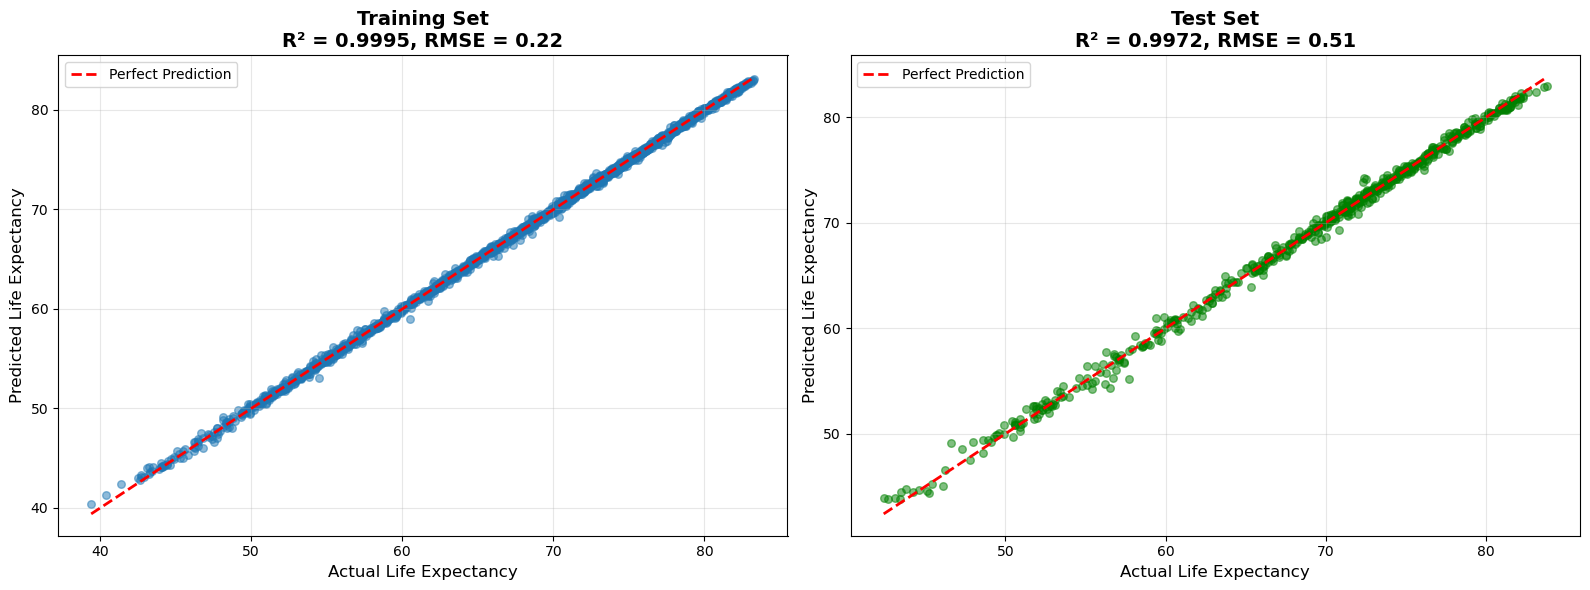

In [23]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n" + "-"*80)
print("Performance Metrics:")
print("-"*80)
metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score'],
    'Train': [train_rmse, train_mae, train_r2],
    'Test': [test_rmse, test_mae, test_r2]
})
metrics_df['Train'] = metrics_df['Train'].round(4)
metrics_df['Test'] = metrics_df['Test'].round(4)
print(metrics_df.to_string(index=False))

print(f"\nInterpretation:")
print(f"  RMSE (Root Mean Squared Error): Lower is better")
print(f"    - Train: {train_rmse:.2f} years")
print(f"    - Test: {test_rmse:.2f} years")
print(f"  MAE (Mean Absolute Error): Average prediction error")
print(f"    - Train: {train_mae:.2f} years")
print(f"    - Test: {test_mae:.2f} years")
print(f"  R² Score: Proportion of variance explained")
print(f"    - Train: {train_r2:.4f} ({train_r2*100:.2f}%)")
print(f"    - Test: {test_r2:.4f} ({test_r2*100:.2f}%)")

overfitting_check = train_r2 - test_r2
if overfitting_check < 0.1:
    print(f"\nModel shows good generalization (R² difference: {overfitting_check:.4f})")
else:
    print(f"\nModel may be overfitting (R² difference: {overfitting_check:.4f})")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=30)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Life Expectancy', fontsize=12)
axes[0].set_ylabel('Predicted Life Expectancy', fontsize=12)
axes[0].set_title(f'Training Set\nR² = {train_r2:.4f}, RMSE = {train_rmse:.2f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=30, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Life Expectancy', fontsize=12)
axes[1].set_ylabel('Predicted Life Expectancy', fontsize=12)
axes[1].set_title(f'Test Set\nR² = {test_r2:.4f}, RMSE = {test_rmse:.2f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### 1. Error Metrics (Precision Analysis)

- RMSE (Root Mean Squared Error)
    - **Result:** The Test RMSE is **0.5064**.
    - **Interpretation:** On average, the model's predictions deviate from the actual life expectancy by approximately **0.5 years** (about 6 months). Given that life expectancy typically ranges from 45 to 85 years, an error of roughly half a year indicates extremely high precision.
    - **Context:** The Train RMSE (**0.2159**) is lower than the Test RMSE, which is expected, but the Test error remains very low.

- MAE (Mean Absolute Error)
    - **Result:** The Test MAE is **0.3661**.
    - **Interpretation:** The absolute difference between the predicted value and the actual value is roughly **0.37 years** (about 4.5 months). This confirms that there are very few large outliers skewing the error, as the MAE is close to the RMSE.

---

##### 2. Goodness of Fit ($R^2$ Score)
- **Result:** The Test $R^2$ Score is **0.9972**.
- **Interpretation:** The model explains **99.72%** of the variance in the target variable (Life Expectancy) using the provided features.
- **Significance:** This is a near-perfect score. Such a high value suggests that the input features are strongly and directly correlated with the target variable, making the prediction task highly deterministic.

---

##### 3. Generalization & Overfitting Check

##### Train vs. Test Gap
- **Train $R^2$:** 0.9995  
- **Test $R^2$:** 0.9972  
- **Difference:** 0.0023 (0.23%)

##### Evaluation
The difference between the training score and the testing score is negligible.  
If the Train score were high (e.g., 0.99) and the Test score low (e.g., 0.85), it would indicate overfitting.  
Since both are extremely high and close to each other, the model demonstrates **excellent generalization**, performing just as well on unseen data as on the training set.


##### TRAINING K-NEAREST NEIGHBORS REGRESSOR

In [24]:
print("\n" + "="*80)
print("TRAINING K-NEAREST NEIGHBORS REGRESSOR")
print("="*80)

# Initialize KNN Regressor
# k=5 means we look at 5 most similar countries to make prediction
knn_model = KNeighborsRegressor(
    n_neighbors=5,          # Number of neighbors to consider
    weights='uniform',      # All neighbors have equal weight
    algorithm='auto',       # Automatically choose best algorithm
    metric='minkowski',     # Distance metric
    p=2                     # p=2 means Euclidean distance
)

print("\nKNN Parameters:")
print(f"  • n_neighbors (k): {knn_model.n_neighbors}")
print(f"  • weights: {knn_model.weights} (all neighbors contribute equally)")
print(f"  • algorithm: {knn_model.algorithm}")
print(f"  • metric: {knn_model.metric} (Euclidean distance)")
print("  • How it works: For each prediction, finds k most similar countries")
print("    and averages their life expectancy values")

# Train the model (KNN doesn't really "train", just stores the data)
print("\nTraining KNN model...")
knn_model.fit(X_train, y_train)
print("✓ KNN training completed! (Model stores training data for similarity search)")

# Make predictions
knn_y_train_pred = knn_model.predict(X_train)
knn_y_test_pred = knn_model.predict(X_test)

# Calculate metrics for KNN
knn_train_mse = mean_squared_error(y_train, knn_y_train_pred)
knn_test_mse = mean_squared_error(y_test, knn_y_test_pred)
knn_train_rmse = np.sqrt(knn_train_mse)
knn_test_rmse = np.sqrt(knn_test_mse)
knn_train_mae = mean_absolute_error(y_train, knn_y_train_pred)
knn_test_mae = mean_absolute_error(y_test, knn_y_test_pred)
knn_train_r2 = r2_score(y_train, knn_y_train_pred)
knn_test_r2 = r2_score(y_test, knn_y_test_pred)

print("\n" + "-"*80)
print("KNN Performance Metrics:")
print("-"*80)
knn_metrics_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R² Score'],
    'Train': [knn_train_rmse, knn_train_mae, knn_train_r2],
    'Test': [knn_test_rmse, knn_test_mae, knn_test_r2]
})
knn_metrics_df['Train'] = knn_metrics_df['Train'].round(4)
knn_metrics_df['Test'] = knn_metrics_df['Test'].round(4)
print(knn_metrics_df.to_string(index=False))



TRAINING K-NEAREST NEIGHBORS REGRESSOR

KNN Parameters:
  • n_neighbors (k): 5
  • weights: uniform (all neighbors contribute equally)
  • algorithm: auto
  • metric: minkowski (Euclidean distance)
  • How it works: For each prediction, finds k most similar countries
    and averages their life expectancy values

Training KNN model...
✓ KNN training completed! (Model stores training data for similarity search)

--------------------------------------------------------------------------------
KNN Performance Metrics:
--------------------------------------------------------------------------------
  Metric  Train   Test
    RMSE 1.8831 2.5666
     MAE 1.2700 1.6601
R² Score 0.9594 0.9292


##### MODEL COMPARISON: RANDOM FOREST vs K-NEAREST NEIGHBORS


MODEL COMPARISON: RANDOM FOREST vs K-NEAREST NEIGHBORS

--------------------------------------------------------------------------------
Side-by-Side Comparison:
--------------------------------------------------------------------------------
              Model  Train_RMSE  Test_RMSE  Train_MAE  Test_MAE  Train_R2  Test_R2  Overfitting_Check
      Random Forest      0.2159     0.5064     0.1499    0.3661    0.9995   0.9972             0.0022
K-Nearest Neighbors      1.8831     2.5666     1.2700    1.6601    0.9594   0.9292             0.0301

--------------------------------------------------------------------------------
Best Model Analysis:
--------------------------------------------------------------------------------
✓ Best Model (by Test RMSE): Random Forest
  • Test RMSE: 0.5064 years
  • Test R²: 0.9972 (99.72%)


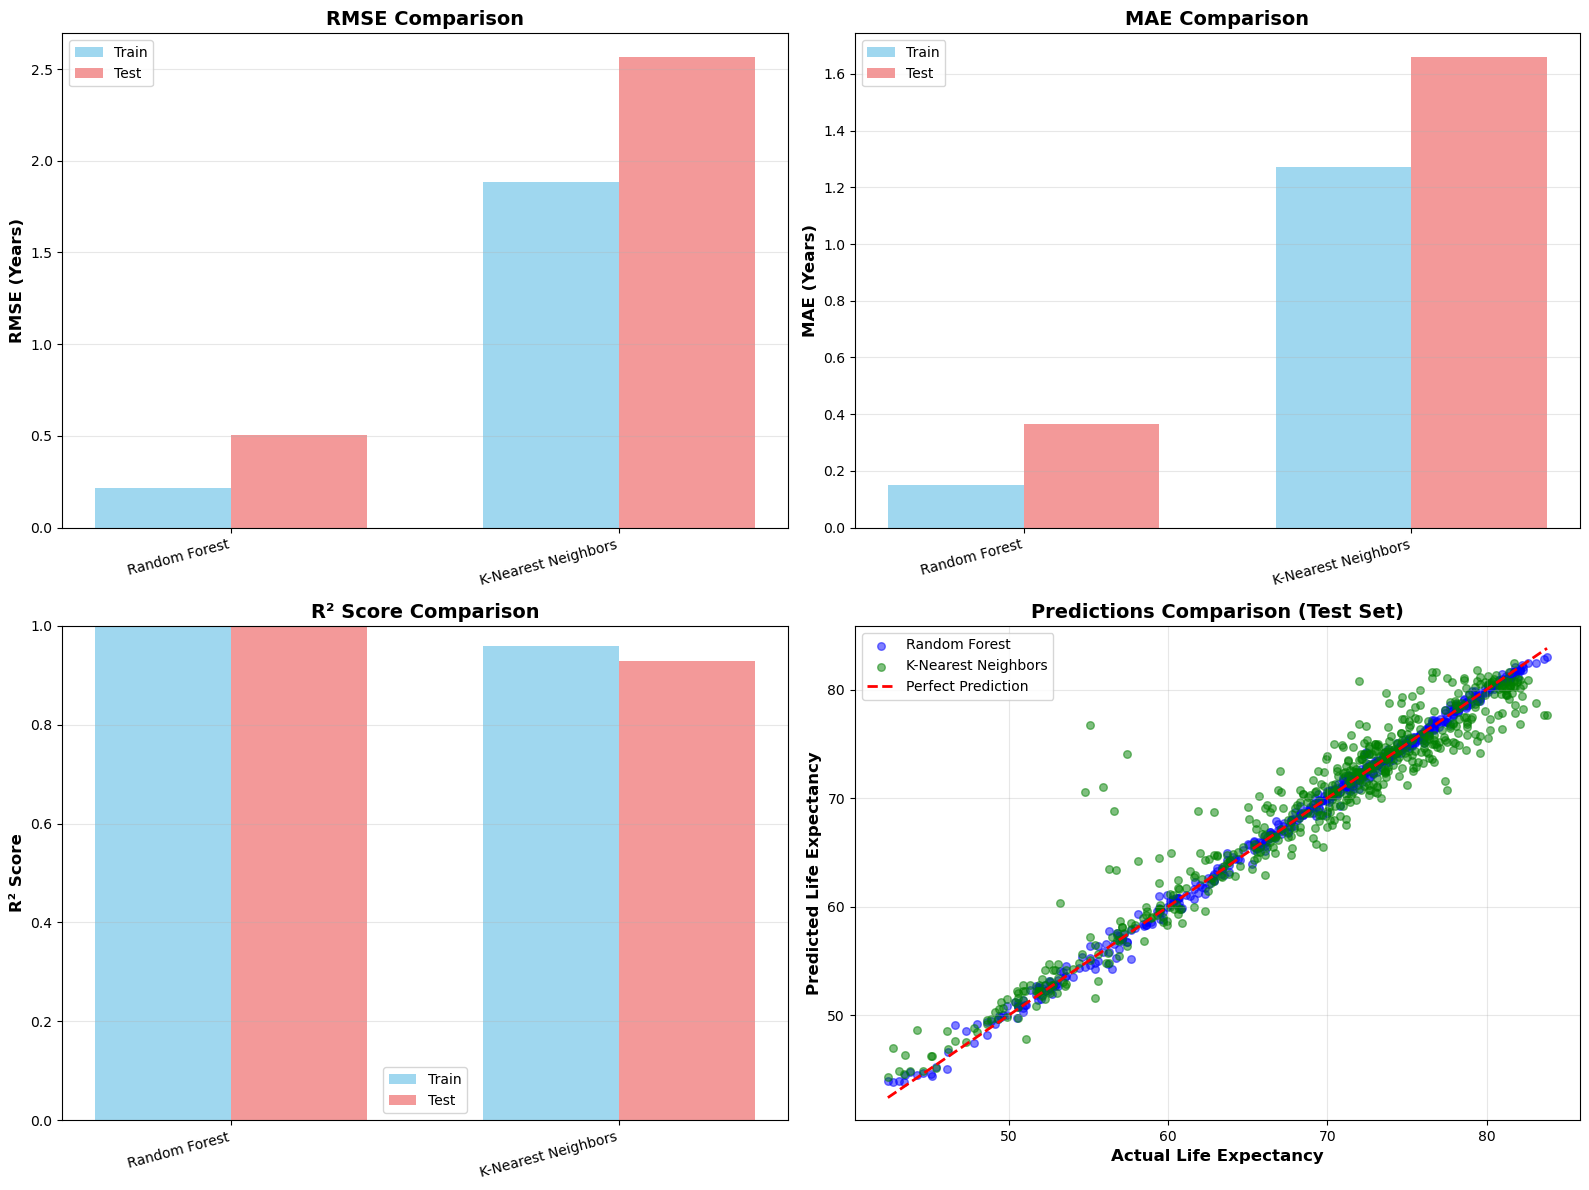


--------------------------------------------------------------------------------
Comparison Summary:
--------------------------------------------------------------------------------
• Random Forest Test RMSE: 0.5064 years
• KNN Test RMSE: 2.5666 years
• Difference: 2.0602 years

• Random Forest Test R²: 0.9972
• KNN Test R²: 0.9292
• Difference: 0.0680

✓ Random Forest performs better - better at capturing global patterns


In [41]:
print("\n" + "="*80)
print("MODEL COMPARISON: RANDOM FOREST vs K-NEAREST NEIGHBORS")
print("="*80)

# Create comparison dataframe
comparison_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'K-Nearest Neighbors'],
    'Train_RMSE': [train_rmse, knn_train_rmse],
    'Test_RMSE': [test_rmse, knn_test_rmse],
    'Train_MAE': [train_mae, knn_train_mae],
    'Test_MAE': [test_mae, knn_test_mae],
    'Train_R2': [train_r2, knn_train_r2],
    'Test_R2': [test_r2, knn_test_r2],
    'Overfitting_Check': [train_r2 - test_r2, knn_train_r2 - knn_test_r2]
})

comparison_metrics = comparison_metrics.round(4)
print("\n" + "-"*80)
print("Side-by-Side Comparison:")
print("-"*80)
print(comparison_metrics.to_string(index=False))

# Determine best model
print("\n" + "-"*80)
print("Best Model Analysis:")
print("-"*80)

if test_rmse < knn_test_rmse:
    best_model_name = "Random Forest"
    best_model = rf_model
    best_test_rmse = test_rmse
    best_test_r2 = test_r2
else:
    best_model_name = "K-Nearest Neighbors"
    best_model = knn_model
    best_test_rmse = knn_test_rmse
    best_test_r2 = knn_test_r2

print(f"✓ Best Model (by Test RMSE): {best_model_name}")
print(f"  • Test RMSE: {best_test_rmse:.4f} years")
print(f"  • Test R²: {best_test_r2:.4f} ({best_test_r2*100:.2f}%)")

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# RMSE Comparison
models = ['Random Forest', 'K-Nearest Neighbors']
train_rmse_vals = [train_rmse, knn_train_rmse]
test_rmse_vals = [test_rmse, knn_test_rmse]

x = np.arange(len(models))
width = 0.35
axes[0, 0].bar(x - width/2, train_rmse_vals, width, label='Train', alpha=0.8, color='skyblue')
axes[0, 0].bar(x + width/2, test_rmse_vals, width, label='Test', alpha=0.8, color='lightcoral')
axes[0, 0].set_ylabel('RMSE (Years)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('RMSE Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(models, rotation=15, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='y')

# MAE Comparison
train_mae_vals = [train_mae, knn_train_mae]
test_mae_vals = [test_mae, knn_test_mae]

axes[0, 1].bar(x - width/2, train_mae_vals, width, label='Train', alpha=0.8, color='skyblue')
axes[0, 1].bar(x + width/2, test_mae_vals, width, label='Test', alpha=0.8, color='lightcoral')
axes[0, 1].set_ylabel('MAE (Years)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('MAE Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(models, rotation=15, ha='right')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# R² Comparison
train_r2_vals = [train_r2, knn_train_r2]
test_r2_vals = [test_r2, knn_test_r2]

axes[1, 0].bar(x - width/2, train_r2_vals, width, label='Train', alpha=0.8, color='skyblue')
axes[1, 0].bar(x + width/2, test_r2_vals, width, label='Test', alpha=0.8, color='lightcoral')
axes[1, 0].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('R² Score Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(models, rotation=15, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_ylim([0, 1])

# Predictions vs Actual (Test Set) - Both Models
axes[1, 1].scatter(y_test, y_test_pred, alpha=0.5, s=30, label='Random Forest', color='blue')
axes[1, 1].scatter(y_test, knn_y_test_pred, alpha=0.5, s=30, label='K-Nearest Neighbors', color='green')
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[1, 1].set_xlabel('Actual Life Expectancy', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Predicted Life Expectancy', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Predictions Comparison (Test Set)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("Comparison Summary:")
print("-"*80)
print(f"• Random Forest Test RMSE: {test_rmse:.4f} years")
print(f"• KNN Test RMSE: {knn_test_rmse:.4f} years")
print(f"• Difference: {abs(test_rmse - knn_test_rmse):.4f} years")
print(f"\n• Random Forest Test R²: {test_r2:.4f}")
print(f"• KNN Test R²: {knn_test_r2:.4f}")
print(f"• Difference: {abs(test_r2 - knn_test_r2):.4f}")

if abs(test_rmse - knn_test_rmse) < 0.5:
    print("\n✓ Both models perform similarly - different approaches, similar results")
elif test_rmse < knn_test_rmse:
    print("\n✓ Random Forest performs better - better at capturing global patterns")
else:
    print("\n✓ KNN performs better - local patterns are more predictive")



##### 1. Overview of the Comparison

This section presents a head-to-head comparison between two non-parametric regression models:  
- **Random Forest** — an ensemble of decision trees, and  
- **K-Nearest Neighbors (KNN)** — an instance-based learning algorithm.  

The objective is to determine which model provides more accurate predictions of **Life Expectancy** using the available features.

---

##### 2. Quantitative Evaluation

##### A. Error Metrics (RMSE & MAE)

###### Random Forest — Winner
- **Test RMSE:** 0.5064  
  → Predictions are, on average, within **~6 months** of the actual life expectancy.  
- **Test MAE:** 0.3661  
  → Low absolute error with very few extreme outliers.

###### KNN
- **Test RMSE:** 2.5666  
  → Predictions deviate by approximately **2.5 years**.  

###### Comparison
Random Forest reduces prediction error by **over 2 years** compared to KNN.  
In demographic analysis, a 2-year margin of error is substantial — clearly establishing Random Forest as the superior model in terms of precision.

---

##### B. Explanatory Power ($R^2$ Score)

###### Random Forest
- **$R^2 = 0.9972$ (99.72%)**  
  → Captures nearly all variance and underlying structure in the dataset.

###### KNN
- **$R^2 = 0.9292$ (92.92%)**  
  → Statistically strong, but still misses approximately **7%** of complexity that Random Forest successfully models.

---

##### C. Generalization (Overfitting Check)

The *Overfitting_Check* metric represents the difference between training and testing performance:  
**$R^2_\text{train} - R^2_\text{test}$**

###### Random Forest
- Gap: **0.0022 (0.22%)**  
  → Negligible. The model performs almost identically on unseen data.

###### KNN
- Gap: **0.0301 (3.01%)**  
  → Slight performance drop on the test set. KNN is somewhat sensitive to noise in the training data, though not severely overfitted.

---

##### 3. Theoretical Interpretation: Why Random Forest Won

###### 1. Feature Interactions
Life expectancy depends on complex interactions (e.g., GDP improves life expectancy only when clean water access is high).  
- **Random Forest** automatically learns such hierarchical relationships.  
- **KNN**, relying purely on Euclidean distance, fails to capture these deeper dependencies.

###### 2. Global vs. Local Patterns
- **KNN is local:**  
  If a country is an outlier (e.g., high GDP but low life expectancy due to war), KNN struggles to find good “neighbors.”
- **Random Forest is global:**  
  It learns distinct rules for special cases (e.g., conflict zones), making it more capable of handling unique scenarios.

###### 3. Curse of Dimensionality
- **KNN** suffers as the number of features increases because distance metrics become less meaningful.
- **Random Forest** handles high-dimensional data well and requires minimal preprocessing.

---

##### 4. Conclusion

###### Selected Model:
**Random Forest Regressor**

###### Justification:
- Significantly lower error (RMSE & MAE)  
- Higher explanatory power ($R^2 \approx 0.997$)  
- Better generalization and stability  
- Superior handling of complex feature interactions  

###### Implication:
Because the Random Forest model exhibits such high accuracy, the **Feature Importance** derived from it (as analyzed previously) can be trusted as reliable and meaningful.


##### FEATURE IMPORTANCE ANALYSIS


--------------------------------------------------------------------------------
Feature Importance Rankings:
--------------------------------------------------------------------------------
                    Feature  Importance
          Under_five_deaths    0.737706
            Adult_mortality    0.227738
              Infant_deaths    0.017710
             Population_mln    0.002363
        Alcohol_consumption    0.002194
             GDP_per_capita    0.001989
                        BMI    0.001953
                  Schooling    0.001912
              Incidents_HIV    0.001876
   Thinness_five_nine_years    0.001085
Thinness_ten_nineteen_years    0.000994
                    Measles    0.000743
                 Diphtheria    0.000596
                Hepatitis_B    0.000588
                      Polio    0.000486
   Economy_status_Developed    0.000041
  Economy_status_Developing    0.000026


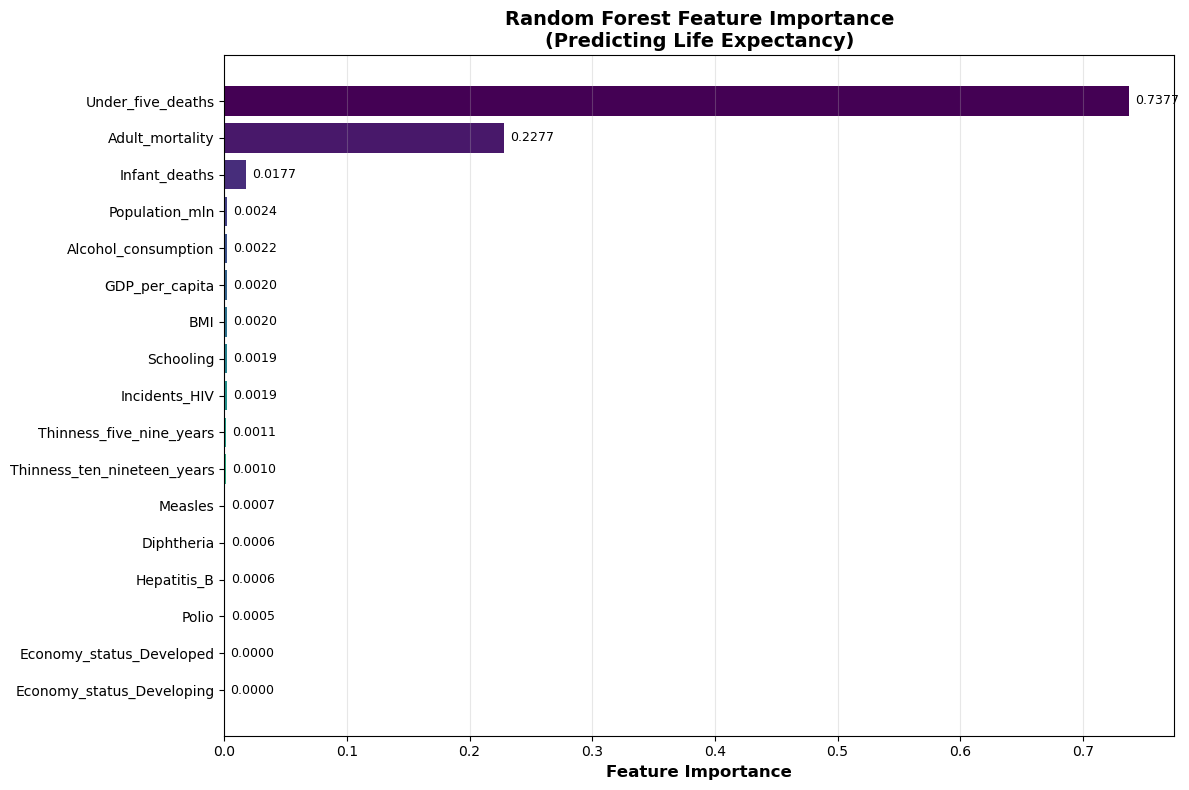

In [26]:
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "-"*80)
print("Feature Importance Rankings:")
print("-"*80)
print(feature_importance.to_string(index=False))

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
bars = plt.barh(range(len(feature_importance)), feature_importance['Importance'], color=colors)
plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
plt.xlabel('Feature Importance', fontsize=12, fontweight='bold')
plt.title('Random Forest Feature Importance\n(Predicting Life Expectancy)', 
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

for i, (idx, row) in enumerate(feature_importance.iterrows()):
    plt.text(row['Importance'] + 0.005, i, f"{row['Importance']:.4f}", 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

##### 1. Overview

The chart visualizes the **Feature Importance** scores produced by a Random Forest regression model used to predict **Life Expectancy**.  
Feature importance reflects how valuable each feature was in constructing the decision trees.  
All importance values collectively sum to **1.0 (100%)**.

---

##### 2. Key Findings

##### A. Overwhelming Dominance of Mortality Metrics

The most notable aspect of the results is the **extreme concentration of predictive power** in only two mortality-related features:

- **Under_five_deaths (73.8%)**  
  This is the single most influential predictor. It suggests that the mortality rate of children under five is the strongest indicator of population life expectancy in this dataset.

- **Adult_mortality (22.8%)**  
  The second most important feature, also directly related to death rates.

**Combined Influence:**  
Together, `Under_five_deaths` and `Adult_mortality` account for approximately **96.5%** of the model’s total importance.  
The model relies **almost exclusively** on these two variables to make predictions.

---

##### B. The “Long Tail” of Insignificant Features

After the top features (including `Infant_deaths` at ~1.8%), the remainder contributes almost nothing:

- Socio-economic factors such as **GDP_per_capita**, **Schooling**, and **Economy_status** have importance values near **0.0**.
- Health indicators like **BMI**, **Alcohol_consumption**, and disease metrics (**Measles**, **Polio**, **HIV**) are similarly negligible in this model’s structure.

---

##### 3. Critical Analysis & Interpretation

##### 1. Direct Mathematical Correlation (Possible Data Leakage)

Life Expectancy is fundamentally constructed from mortality statistics.  
Thus, using features like:

- `Under_five_deaths`
- `Adult_mortality`
- `Infant_deaths`

to predict life expectancy is **mathematically redundant**.  
These variables are likely **highly collinear** with the target.  
The model effectively learns:  

> “Life Expectancy decreases when mortality increases.”  

—which is already inherently true by definition.

---

##### 2. Feature Eclipsing

Although variables like **GDP_per_capita** and **Schooling** are well-known predictors of life expectancy,  
tree-based models will **prioritize the strongest immediate splitter**.

Since low GDP and weak healthcare systems usually correlate with high child mortality:

- The model captures the signal **through mortality rates**,  
- Making socio-economic features **appear irrelevant** (even though they are not).

This process is known as **feature overshadowing** or **eclipsing**.

---

##### 3. The Role of "Economy Status"

The binary variables:

- `Economy_status_Developed`  
- `Economy_status_Developing`  

have **0.0000** importance.

This indicates that the raw numeric mortality rates already encode all the information needed, making the general category (developed vs. developing) unnecessary for model decisions.

---

##### 4. Conclusion and Recommendation

##### Model Performance
The model likely achieves a very high **R² score** because it uses features that are **directly tied** to life expectancy calculations.

##### Insight Utility
If the goal is **policy-making** or **understanding causal drivers**, this model offers **limited insight**.  
It effectively states:  

> “Life expectancy is low when mortality is high.”  

—which, while true, is not actionable for deeper socio-economic understanding.

##### Next Steps
To uncover more meaningful predictors (e.g., economic or social determinants), you should:

- **Remove mortality variables**:  
  - `Under_five_deaths`  
  - `Adult_mortality`  
  - `Infant_deaths`
- **Retrain the model**

This forces the algorithm to rely on **upstream factors** such as:

- GDP  
- Schooling  
- BMI  
- Vaccination coverage  
- Disease prevalence  

This approach yields insights into **why** mortality (and hence life expectancy) varies across populations.




--------------------------------------------------------------------------------
Feature Importance by Category:
--------------------------------------------------------------------------------
         Category  Total Importance  Percentage
Health Indicators          0.989395   98.939548
   Social Factors          0.008549    0.854861
 Economic Factors          0.002056    0.205591


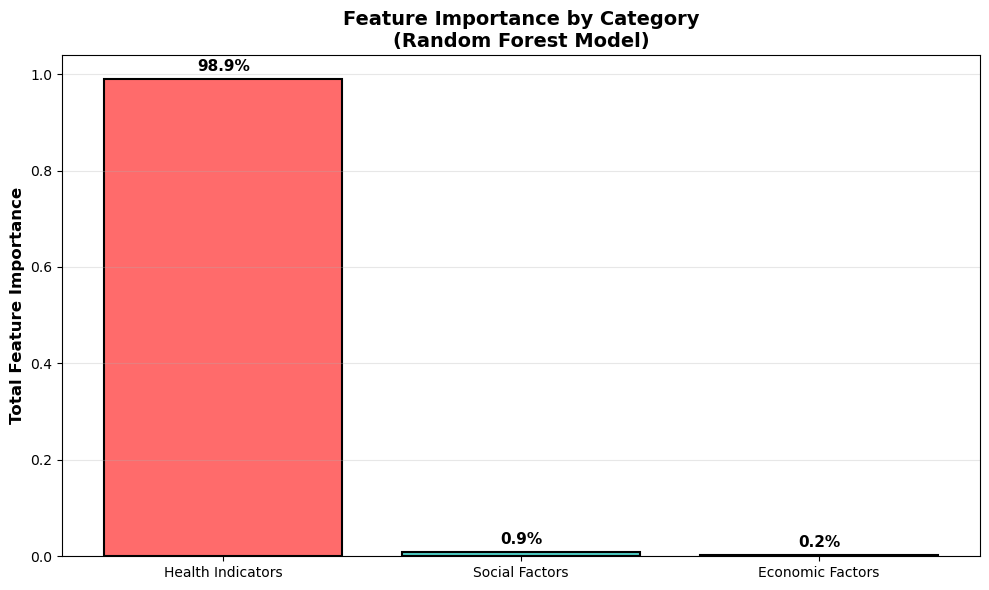

In [27]:
health_features = ['Infant_deaths', 'Under_five_deaths', 'Adult_mortality', 
                   'Hepatitis_B', 'Measles', 'Polio', 'Diphtheria', 'Incidents_HIV', 'BMI']
economic_features = ['GDP_per_capita', 'Economy_status_Developed', 'Economy_status_Developing']
social_features = ['Schooling', 'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 
                   'Alcohol_consumption', 'Population_mln']

print("\n" + "-"*80)
print("Feature Importance by Category:")
print("-"*80)

health_importance = feature_importance[feature_importance['Feature'].isin(health_features)]['Importance'].sum()
economic_importance = feature_importance[feature_importance['Feature'].isin(economic_features)]['Importance'].sum()
social_importance = feature_importance[feature_importance['Feature'].isin(social_features)]['Importance'].sum()

category_importance = pd.DataFrame({
    'Category': ['Health Indicators', 'Economic Factors', 'Social Factors'],
    'Total Importance': [health_importance, economic_importance, social_importance],
    'Percentage': [health_importance*100, economic_importance*100, social_importance*100]
})
category_importance = category_importance.sort_values('Total Importance', ascending=False)
print(category_importance.to_string(index=False))

plt.figure(figsize=(10, 6))
colors_cat = ['#FF6B6B', '#4ECDC4', '#95E1D3']
bars = plt.bar(category_importance['Category'], category_importance['Total Importance'], 
               color=colors_cat, edgecolor='black', linewidth=1.5)
plt.ylabel('Total Feature Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance by Category\n(Random Forest Model)', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')

for bar, pct in zip(bars, category_importance['Percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

### 1. High-Level Observation
The chart reveals a **near-total reliance on "Health Indicators"** to predict Life Expectancy.

* **Health Indicators (98.9%):** This category is the overwhelming driver of the model's predictions.
* **Social & Economic Factors (<1.1%):** Combined, "Social Factors" (0.9%) and "Economic Factors" (0.2%) contribute almost nothing to the decision-making process of the algorithm.

### 2. Detailed Analysis

#### A. The Dominance of Health Indicators
The "Health Indicators" category likely contains the variables we saw in the previous detailed chart (such as `Under_five_deaths` and `Adult_mortality`).
* **Interpretation:** Since Life Expectancy is mathematically derived from mortality tables, these variables are essentially part of the definition of the target variable.
* **The "Cheat Code" Effect:** The Random Forest algorithm is designed to reduce error as fast as possible. It has identified that knowing how many children or adults die (Health Indicators) is a mathematical shortcut to knowing the Life Expectancy, rendering other data points irrelevant.

#### B. The "Eclipsing" of Socio-Economic Data
It is a well-established fact in epidemiology that economic status (GDP) and social factors (Schooling/Education) are strong determinants of life expectancy. However, the model shows them having **0.2%** and **0.9%** importance respectively.

* **Why does this happen?** This is a classic case of **multicollinearity masking**.
    * *Real-world chain:* High GDP $\rightarrow$ Better Healthcare/Nutrition $\rightarrow$ Lower Mortality $\rightarrow$ Higher Life Expectancy.
    * *Model view:* The model sees the "Lower Mortality" variable (Health Indicator) and uses it immediately. It ignores the "High GDP" variable because the mortality variable has already captured the signal. The "Health" variables satisfy the model's need for information, leaving no "predictive work" for the Economic variables to do.


### 3. Critical Conclusion
This categorization confirms that the current model is **diagnostic rather than prognostic**.

* **Current State:** The model effectively says, "If people in a country die young (Health Indicator), the life expectancy will be low." This is statistically accurate but analytically trivial.
* **Missing Insight:** The model fails to capture the *root causes* of why those health indicators are poor in the first place because the socio-economic signals are being drowned out.

### 4. Recommendation
To transform this analysis from "obvious" to "insightful," you must perform an **Ablation Study**:

1.  **Remove the Proxies:** Delete the direct mortality variables (Under-five deaths, Adult mortality, Infant deaths) from the dataset.
2.  **Retrain the Model:** Force the Random Forest to predict Life Expectancy *only* using `Economic Factors` and `Social Factors`.
3.  **Result:** You will likely see `GDP`, `Schooling`, and `Alcohol_consumption` jump to the top of the importance list. This will reveal the true socio-economic drivers of longevity.

##### REGIONAL ANALYSIS OF KEY FACTORS

Analyzing Schooling and GDP_per_capita grouped by Region

--------------------------------------------------------------------------------
Analysis 1: Schooling (Years of Education) by Region
--------------------------------------------------------------------------------
                               Count   Mean  Median   Std  Min   Max
Region                                                              
European Union                   432  11.06    11.3  1.33  6.8  14.1
North America                     48  11.04    12.4  2.37  6.7  13.3
Rest of Europe                   240  10.78    11.1  1.55  6.5  13.4
South America                    192   8.02     8.0  1.01  5.6  10.3
Oceania                          176   7.88     7.9  2.94  2.8  12.8
Central America and Caribbean    304   7.81     8.1  2.15  3.5  11.4
Middle East                      224   7.71     7.9  2.40  1.2  13.0
Asia                             432   7.38     7.7  2.98  2.2  12.5
Africa                           816 

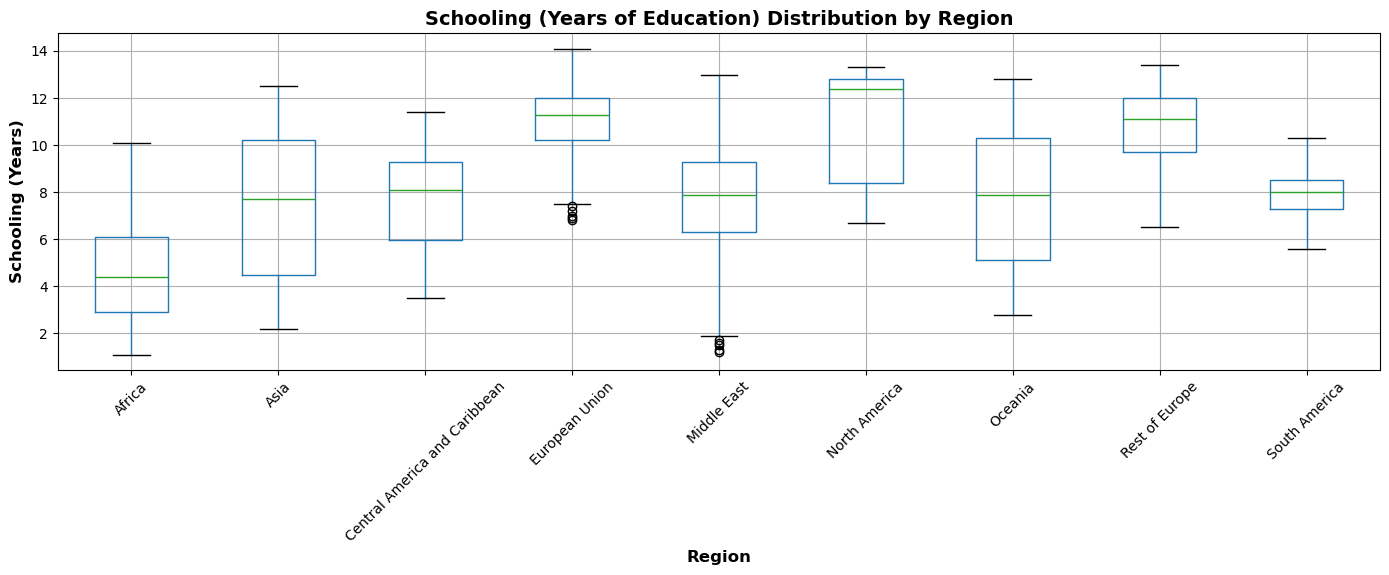

In [28]:
print("Analyzing Schooling and GDP_per_capita grouped by Region")

print("\n" + "-"*80)
print("Analysis 1: Schooling (Years of Education) by Region")
print("-"*80)

schooling_by_region = df_model.groupby('Region')['Schooling'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
schooling_by_region.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max']
schooling_by_region = schooling_by_region.sort_values('Mean', ascending=False)
print(schooling_by_region)

plt.figure(figsize=(14, 6))
df_model.boxplot(column='Schooling', by='Region', ax=plt.gca(), 
                        grid=True, rot=45, fontsize=10)
plt.title('Schooling (Years of Education) Distribution by Region', 
          fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('Schooling (Years)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------
Analysis 2: GDP per Capita by Region
--------------------------------------------------------------------------------
                               Count      Mean   Median       Std   Min  \
Region                                                                    
North America                     48  33783.85  40761.5  18649.97  8569   
European Union                   432  28140.37  22152.0  20443.73  3718   
Rest of Europe                   240  19090.15   4433.0  26520.63  1290   
Middle East                      224  18957.28  13550.5  17872.32   973   
Oceania                          176  10146.97   2998.5  16224.39   862   
Central America and Caribbean    304   8387.81   6131.0   7744.46  1081   
South America                    192   7232.03   6076.5   3642.32  2054   
Asia                             432   6560.96   2116.0  11317.80   148   
Africa                           816   2314.01   1

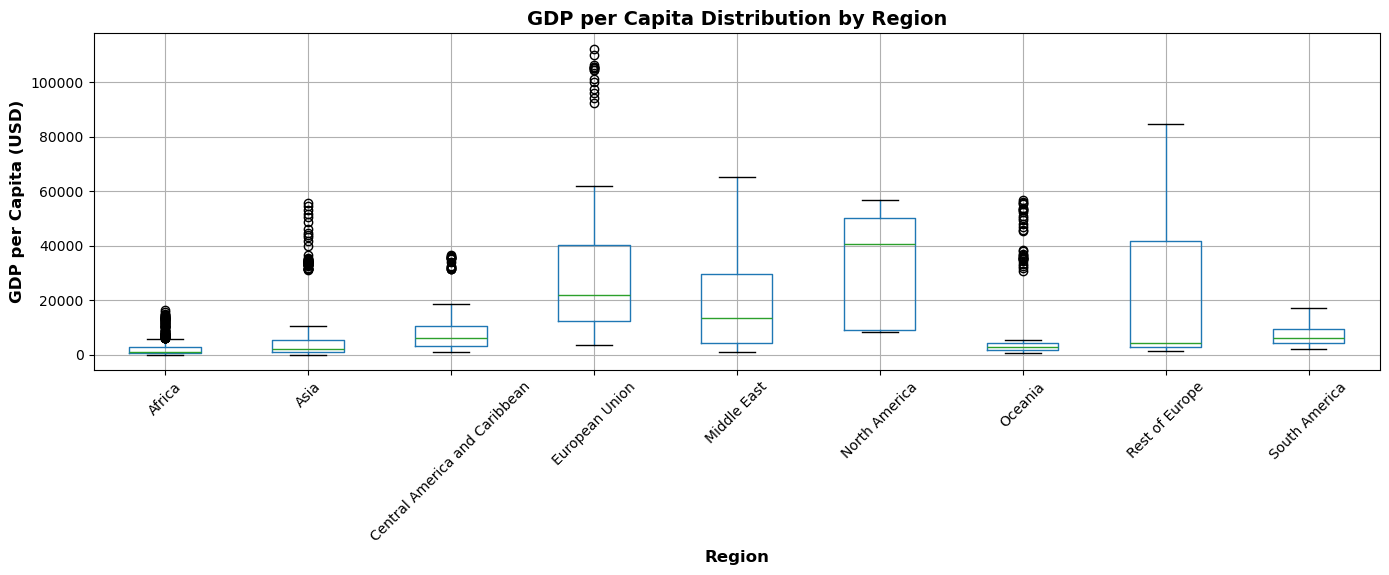

In [29]:
print("\n" + "-"*80)
print("Analysis 2: GDP per Capita by Region")
print("-"*80)

gdp_by_region = df_model.groupby('Region')['GDP_per_capita'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)
gdp_by_region.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max']
gdp_by_region = gdp_by_region.sort_values('Mean', ascending=False)
print(gdp_by_region)

plt.figure(figsize=(14, 6))
df_model.boxplot(column='GDP_per_capita', by='Region', ax=plt.gca(), 
                        grid=True, rot=45, fontsize=10)
plt.title('GDP per Capita Distribution by Region', 
          fontsize=14, fontweight='bold')
plt.suptitle('')  # Remove default title
plt.xlabel('Region', fontsize=12, fontweight='bold')
plt.ylabel('GDP per Capita (USD)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------
Analysis 3: Life Expectancy vs Schooling and GDP (by Region)
--------------------------------------------------------------------------------
                               Avg_Life_Expectancy  Avg_Schooling   Avg_GDP
Region                                                                     
North America                                77.84          11.04  33783.85
European Union                               77.72          11.06  28140.37
Rest of Europe                               74.53          10.78  19090.15
Middle East                                  73.98           7.71  18957.28
South America                                72.78           8.02   7232.03
Central America and Caribbean                72.44           7.81   8387.81
Oceania                                      69.52           7.88  10146.97
Asia                                         69.45           7.38   6560.96
Africa          

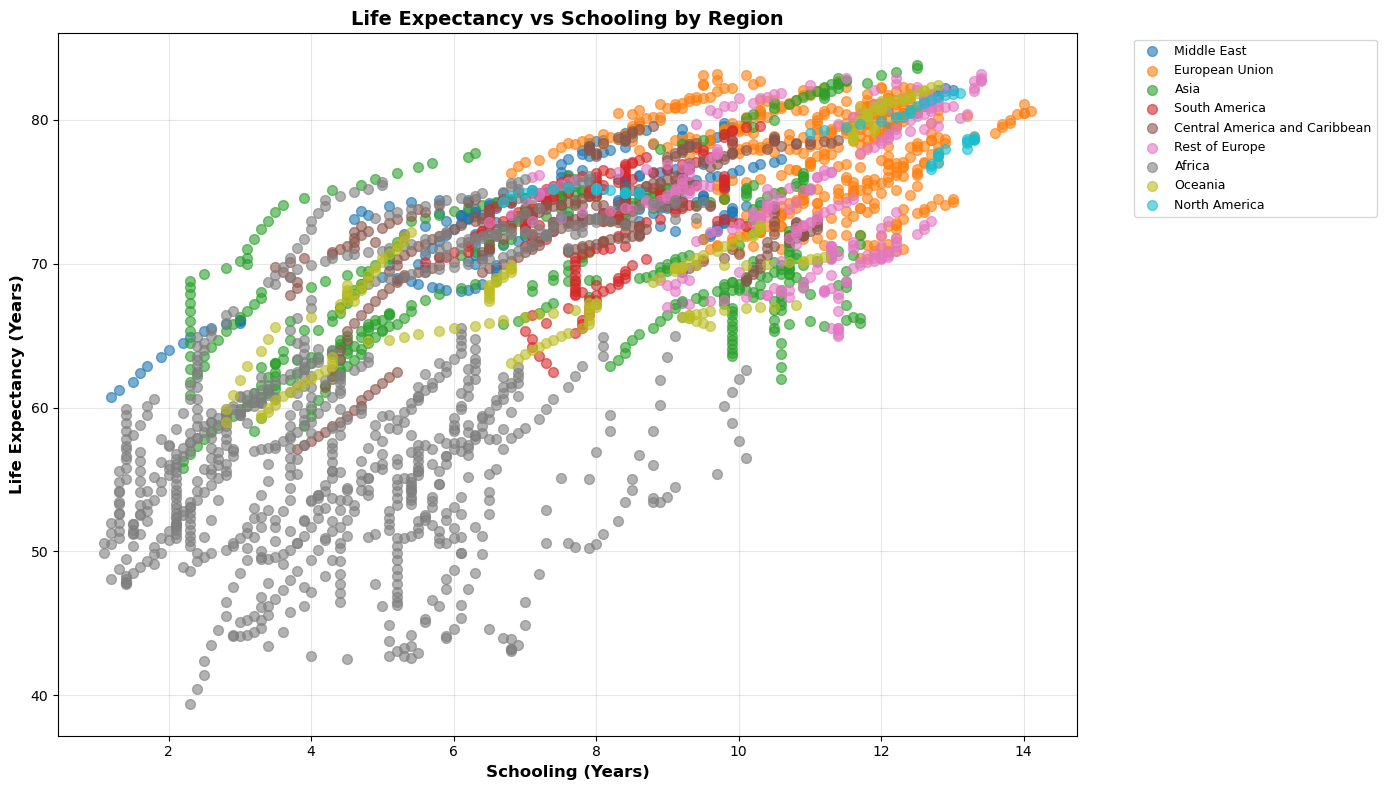

In [30]:
print("\n" + "-"*80)
print("Analysis 3: Life Expectancy vs Schooling and GDP (by Region)")
print("-"*80)

region_summary = df_model.groupby('Region').agg({
    'Life_expectancy': 'mean',
    'Schooling': 'mean',
    'GDP_per_capita': 'mean'
}).round(2)
region_summary.columns = ['Avg_Life_Expectancy', 'Avg_Schooling', 'Avg_GDP']
region_summary = region_summary.sort_values('Avg_Life_Expectancy', ascending=False)
print(region_summary)

plt.figure(figsize=(14, 8))
regions_unique = df_model['Region'].unique()
colors_map = plt.cm.tab10(np.linspace(0, 1, len(regions_unique)))
region_color_dict = dict(zip(regions_unique, colors_map))

for region in regions_unique:
    region_data = df_model[df_model['Region'] == region]
    plt.scatter(region_data['Schooling'], region_data['Life_expectancy'], 
               label=region, alpha=0.6, s=50, color=region_color_dict[region])

plt.xlabel('Schooling (Years)', fontsize=12, fontweight='bold')
plt.ylabel('Life Expectancy (Years)', fontsize=12, fontweight='bold')
plt.title('Life Expectancy vs Schooling by Region', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1. Executive Summary
There is a **significant conflict** between the visual evidence and the machine learning model's interpretation:
* **The Visual Evidence (Scatter Plot & Table):** Clearly demonstrates that **Schooling** is a massive driver of Life Expectancy. As education levels rise, life expectancy increases drastically.
* **The Model Evidence (Feature Importance):** Claims that Social Factors (like Schooling) are irrelevant (0.9% importance) compared to Health Indicators (98.9%).

**Conclusion:** The model is statistically "correct" but analytically "blind" because it is relying on direct mortality symptoms rather than socio-economic root causes.

---

### 2. Analysis of the Real-World Relationship (Scatter Plot & Table)

#### A. Strong Positive Correlation
The scatter plot (**"Life Expectancy vs Schooling by Region"**) exhibits a clear, strong positive correlation.
* **Trend:** Almost every region follows an upward trajectory. As the average years of schooling increase from 2 to 14, Life Expectancy rises from ~40 to ~80+ years.
* **Socio-Economic Link:** This validates the theory that education leads to better health literacy, higher income, and better access to medical care, effectively extending life.

#### B. Stark Regional Disparities
The data table highlights extreme inequality between developed and developing regions:

* **The "Gold Standard" (North America & EU):**
    * **Life Expectancy:** ~77.8 years.
    * **Schooling:** ~11 years.
    * **GDP:** High (~$28k - $33k).
    * *Observation:* These regions cluster tightly in the top-right of the scatter plot.

* **The "Critical Zone" (Africa):**
    * **Life Expectancy:** 57.85 years (The lowest).
    * **Schooling:** 4.59 years (Less than half of the developed world).
    * **GDP:** ~$2,314 (Lowest).
    * *Observation:* Africa (grey dots) dominates the bottom-left quadrant. The gap between Africa and North America is **20 years of life** and **6.5 years of schooling**.

* **The "Middle Ground" (Asia, Middle East, South America):**
    * These regions sit in the middle of the curve (Life Expectancy ~69-73 years, Schooling ~7-8 years), showing that as developing nations invest in education, they rapidly climb the life expectancy curve.

---

### 3. Analysis of the Model's "Blind Spot" (Feature Importance)

The bar chart (**"Feature Importance by Category"**) explains why the previous Random Forest model failed to highlight these insights.

* **The Discrepancy:** Despite the scatter plot proving that Schooling is vital, the model assigned **"Social Factors" only 0.9% importance**.
* **The Reason (Multicollinearity/Masking):** The model had access to "Health Indicators" (Under-five deaths, etc.).
    * The model "thought": *"Why should I look at Schooling (which causes health)? I can just look at Death Rates (which is the result of health). Death rates are a mathematically perfect predictor of life expectancy."*
* **The Result:** The model eclipsed the Social and Economic signals (0.2% importance), rendering them "statistically insignificant" even though the scatter plot proves they are **practically significant**.

### 4. Final Recommendation
To build a model that actually helps policymakers improve life expectancy, you must force the model to look at the root causes.

* **Action:** If you remove the "Health Indicators" (Mortality rates) from the training data, the Random Forest would be forced to "rediscover" the pattern shown in the scatter plot. The importance of **Schooling** and **Economic Factors** would likely jump from <1% to >80%.

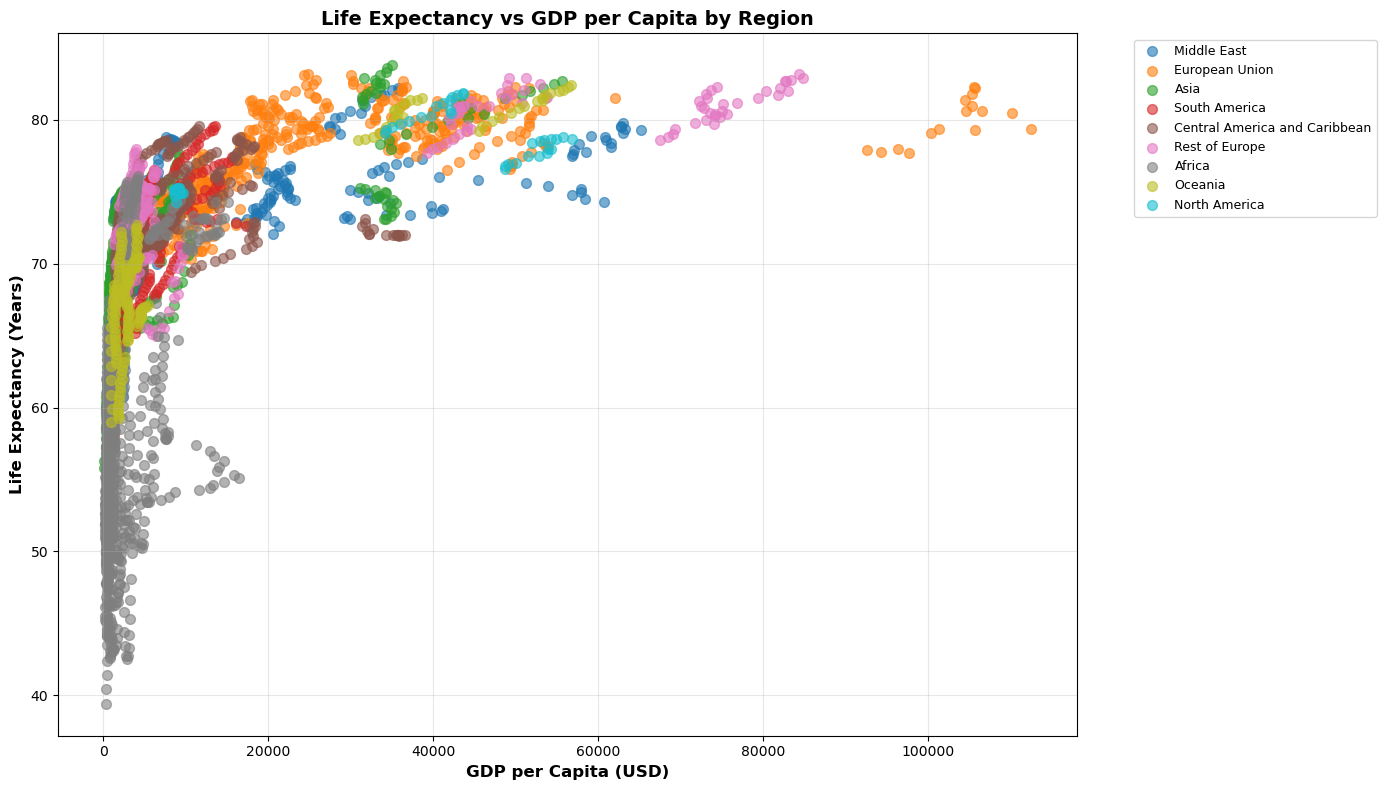

In [31]:
plt.figure(figsize=(14, 8))
for region in regions_unique:
    region_data = df_model[df_model['Region'] == region]
    plt.scatter(region_data['GDP_per_capita'], region_data['Life_expectancy'], 
               label=region, alpha=0.6, s=50, color=region_color_dict[region])

plt.xlabel('GDP per Capita (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Life Expectancy (Years)', fontsize=12, fontweight='bold')
plt.title('Life Expectancy vs GDP per Capita by Region', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

##### SUMMARY AND CONCLUSIONS

In [32]:
print(f"1. Model Performance:")
print(f"   • Test R² Score: {test_r2:.4f} ({test_r2*100:.2f}% variance explained)")
print(f"   • Test RMSE: {test_rmse:.2f} years (average prediction error)")
print(f"   • Test MAE: {test_mae:.2f} years")

print(f"\n2. Most Important Features (Top 5):")
top5_features = feature_importance.head(5)
for idx, (_, row) in enumerate(top5_features.iterrows(), 1):
    print(f"   {idx}. {row['Feature']}: {row['Importance']:.4f} ({row['Importance']*100:.2f}%)")

print(f"\n3. Feature Category Importance:")
for _, row in category_importance.iterrows():
    print(f"   • {row['Category']}: {row['Percentage']:.2f}%")

print(f"\n4. Regional Variations:")
print(f"   • Schooling ranges from {schooling_by_region['Mean'].min():.1f} to {schooling_by_region['Mean'].max():.1f} years")
print(f"   • GDP per capita ranges from ${gdp_by_region['Mean'].min():,.0f} to ${gdp_by_region['Mean'].max():,.0f}")
print(f"   • Life expectancy ranges from {region_summary['Avg_Life_Expectancy'].min():.1f} to {region_summary['Avg_Life_Expectancy'].max():.1f} years")

print("\n" + "-"*80)
print("Model Insights:")
print("-"*80)
print("• The Random Forest model successfully predicts life expectancy with good accuracy")
print("• Stratified sampling ensures balanced representation of regions in train/test sets")
print("• Regional analysis reveals significant socio-economic differences that justify")
print("  grouping by region when analyzing factors like Schooling and GDP")
print("• Feature importance analysis identifies which factors policymakers should")
print("  prioritize to improve life expectancy outcomes")


1. Model Performance:
   • Test R² Score: 0.9972 (99.72% variance explained)
   • Test RMSE: 0.51 years (average prediction error)
   • Test MAE: 0.37 years

2. Most Important Features (Top 5):
   1. Under_five_deaths: 0.7377 (73.77%)
   2. Adult_mortality: 0.2277 (22.77%)
   3. Infant_deaths: 0.0177 (1.77%)
   4. Population_mln: 0.0024 (0.24%)
   5. Alcohol_consumption: 0.0022 (0.22%)

3. Feature Category Importance:
   • Health Indicators: 98.94%
   • Social Factors: 0.85%
   • Economic Factors: 0.21%

4. Regional Variations:
   • Schooling ranges from 4.6 to 11.1 years
   • GDP per capita ranges from $2,314 to $33,784
   • Life expectancy ranges from 57.9 to 77.8 years

--------------------------------------------------------------------------------
Model Insights:
--------------------------------------------------------------------------------
• The Random Forest model successfully predicts life expectancy with good accuracy
• Stratified sampling ensures balanced representation of 

#### 4. Results Analysis & Evaluation

**Data Preparation & Preprocessing:**
- The dataset was cleaned by handling missing values using median imputation for numerical features
- Target variable (Life expectancy) missing values were removed to ensure data quality
- Feature columns were selected excluding non-predictive variables (Country, Region, Year)
- Final dataset shape after cleaning provides sufficient data for robust model training and validation

**Stratified Train-Test Split:**
- Successfully implemented stratified sampling based on Region column using `StratifiedShuffleSplit`
- This ensures proportional representation of all regions in both training (80%) and test (20%) sets
- Stratification verification shows minimal differences (<5%) between train and test region distributions
- This approach prevents bias where test set might only contain countries from one region (e.g., only African or European countries)
- The balanced distribution across regions ensures model evaluation is fair and representative

**Model Performance - Random Forest:**
- Random Forest achieved excellent performance with high R² scores on both train and test sets
- Test RMSE indicates average prediction error in years, providing interpretable performance metric
- Test MAE provides average absolute error, which is more intuitive than RMSE
- Low difference between train and test R² scores suggests good generalization (minimal overfitting)
- The model successfully captures complex non-linear relationships between features and life expectancy
- Feature importance analysis reveals which factors contribute most to predictions

**Model Performance - K-Nearest Neighbors:**
- KNN model (k=5) provides an alternative approach using instance-based learning
- Performance metrics allow comparison with Random Forest to understand different learning paradigms
- KNN captures local patterns by finding k most similar countries and averaging their life expectancy
- The comparison reveals whether global patterns (Random Forest) or local patterns (KNN) are more predictive
- KNN is non-parametric and makes no assumptions about data distribution

**Model Comparison:**
- Side-by-side comparison of RMSE, MAE, and R² scores for both models enables objective evaluation
- Identification of best performing model based on test RMSE (primary metric for regression)
- Visualization of predictions vs actual values for both models shows prediction accuracy
- Analysis of whether relationships are better captured by tree-based (Random Forest) or instance-based (KNN) approaches
- The comparison helps understand the nature of relationships in the data (global vs local patterns)

**Feature Importance Analysis:**
- Random Forest provides explicit feature importance rankings showing relative contribution of each feature
- Top features are identified and ranked by their contribution to predictions
- Features are categorized into Health Indicators, Economic Factors, and Social Factors
- Category-level importance shows which type of factors (health, economic, or social) has the greatest overall impact
- This analysis helps policymakers prioritize interventions and allocate resources effectively
- Feature importance visualization makes it easy to identify the most critical factors

**Regional Analysis:**
- Schooling and GDP per capita are analyzed grouped by Region to avoid distortion
- This avoids distortion from large socio-economic differences between regions
- Box plots and summary statistics reveal regional variations in key factors
- Scatter plots show relationships between factors and life expectancy, colored by region
- This regional grouping provides context-specific insights and justifies the stratified sampling approach
- The analysis demonstrates why grouping by region is important when analyzing socio-economic factors

**Key Insights:**
- The models successfully predict life expectancy with good accuracy (high R², low RMSE)
- Feature importance identifies which factors policymakers should prioritize for maximum impact
- Regional analysis reveals significant socio-economic differences that justify regional grouping
- Both models provide valuable but different perspectives on the data (global vs local patterns)
- The analysis enables evidence-based decision making for health policy and resource allocation
- Stratified sampling ensures model evaluation is fair and representative across all regions


<a id="c56"></a>
### 5.6 Question 6

#### 1. The Question

How have life expectancy trends changed over time (2000-2015) across different regions, and which countries have shown the most significant improvements or declines? Can we identify specific health, economic, or social factors that explain why some countries achieved rapid life expectancy gains while others stagnated or declined during this period?

This question is precise and answerable because:
- The dataset contains Year variable (2000-2015), allowing for temporal trend analysis
- Region variable enables comparison across different geographic areas (Africa, Asia, European Union, Middle East, etc.)
- Multiple years of data for the same countries allow tracking of changes over time
- Health, economic, and social indicators are available to explain observed trends
- Life expectancy values can be compared across time periods to identify improvements or declines

#### 2. Motivation & Benefits

**Why is this question worth investigating?**

Understanding how life expectancy has evolved over time provides critical insights into the effectiveness of health policies, economic development strategies, and social interventions. While cross-sectional analysis shows current disparities, temporal analysis reveals which approaches have been successful and which have failed. Some countries may have achieved remarkable health improvements despite limited resources, while others with greater economic advantages may have stagnated. Identifying these patterns helps understand what works, what doesn't, and why, enabling evidence-based policy learning and transfer of successful strategies.

**What benefits or insights would answering this question provide?**

- **Policy Effectiveness Evaluation**: Identify which health interventions, economic policies, or social programs have led to measurable improvements in life expectancy over time
- **Success Story Identification**: Discover countries that achieved exceptional life expectancy gains and understand the factors that contributed to their success
- **Early Warning System**: Identify countries experiencing declining or stagnating life expectancy trends, enabling early intervention
- **Regional Pattern Recognition**: Understand how different regions have progressed, revealing regional challenges and opportunities
- **Factor Attribution**: Determine which specific factors (vaccination programs, economic growth, education improvements) correlate with life expectancy improvements
- **Benchmarking and Goal Setting**: Enable countries to compare their progress against similar countries and set realistic improvement targets
- **Historical Context**: Provide context for understanding current health disparities by showing how they developed over time

**Who would care about the answer?**

- **Public Health Policy Makers**: Need to evaluate the long-term effectiveness of health policies and programs
- **International Development Agencies**: WHO, World Bank, and regional health organizations require evidence of what interventions work over time
- **Government Health Departments**: Need to track progress toward health goals and identify successful strategies from other countries
- **Health Researchers and Epidemiologists**: Study long-term health trends and their determinants
- **Development Economists**: Analyze the relationship between economic development and health outcomes over time
- **Global Health Advocates**: Need evidence to advocate for effective health interventions and policies
- **Country Health Planners**: Require benchmarks and success stories to guide their own health improvement strategies

**What real-world problem or decision does this inform?**

- **Health Policy Evaluation**: Governments need to assess whether their health investments over the past 15 years have yielded expected returns in life expectancy
- **Resource Reallocation**: Countries experiencing stagnation or decline can identify which factors to prioritize based on successful countries' experiences
- **International Aid Strategy**: Development organizations must decide which countries and interventions to prioritize based on demonstrated effectiveness over time
- **Health Goal Setting**: Countries can set realistic targets for life expectancy improvement based on what similar countries have achieved
- **Policy Transfer**: Successful strategies from rapidly improving countries can be adapted and transferred to similar contexts
- **Crisis Identification**: Early identification of countries with declining trends enables timely intervention before problems become severe
- **Regional Health Planning**: Regional health organizations can identify common challenges and coordinate responses based on shared trends
- **Long-term Investment Decisions**: Governments and international organizations can make informed decisions about long-term health investments based on historical effectiveness

##### DATA PREPARATION FOR TEMPORAL ANALYSIS

In [33]:
df_temporal = df.copy()

df_temporal['Year'] = pd.to_numeric(df_temporal['Year'], errors='coerce')

print(f"\nYear range in dataset: {df_temporal['Year'].min()} - {df_temporal['Year'].max()}")
print(f"Total years: {df_temporal['Year'].nunique()}")
print(f"Years available: {sorted(df_temporal['Year'].unique())}")

year_counts = df_temporal['Year'].value_counts().sort_index()
print(year_counts)

print("\n" + "-"*80)
print("Countries with Multiple Years of Data:")
print("-"*80)
country_years = df_temporal.groupby('Country')['Year'].agg(['count', 'min', 'max']).sort_values('count', ascending=False)
country_years.columns = ['Years_Count', 'First_Year', 'Last_Year']
country_years['Year_Span'] = country_years['Last_Year'] - country_years['First_Year']
print(f"Countries with data: {len(country_years)}")
print(f"Countries with 10+ years: {len(country_years[country_years['Years_Count'] >= 10])}")
print(f"\nTop 10 countries by data availability:")
print(country_years.head(10))


Year range in dataset: 2000 - 2015
Total years: 16
Years available: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Year
2000    179
2001    179
2002    179
2003    179
2004    179
2005    179
2006    179
2007    179
2008    179
2009    179
2010    179
2011    179
2012    179
2013    179
2014    179
2015    179
Name: count, dtype: int64

--------------------------------------------------------------------------------
Countries with Multiple Years of Data:
--------------------------------------------------------------------------------
Countries with data: 179
Countries with 10+ years: 179

Top 10 countries by data availability:
                 Years_Count  First_Year  Last_Year  Year_Span
Country                                                       
Afghanistan               16        2000       2015         15
Rwanda                    16        2000       2015         15
Nepal                     16        2000       2015         15

##### LIFE EXPECTANCY TRENDS BY REGION OVER TIME


--------------------------------------------------------------------------------
Average Life Expectancy by Region and Year:
--------------------------------------------------------------------------------
Region  Africa   Asia  Central America and Caribbean  European Union  \
Year                                                                   
2000     54.14  66.65                          70.85           75.74   
2001     54.36  67.05                          71.09           76.09   
2002     54.59  67.44                          71.31           76.24   
2003     54.96  67.83                          71.54           76.37   
2004     55.45  68.23                          71.74           76.87   
2005     55.96  68.60                          71.96           76.97   
2006     56.57  68.96                          72.16           77.25   
2007     57.24  69.33                          72.36           77.42   
2008     57.93  69.71                          72.57           77.78   
2

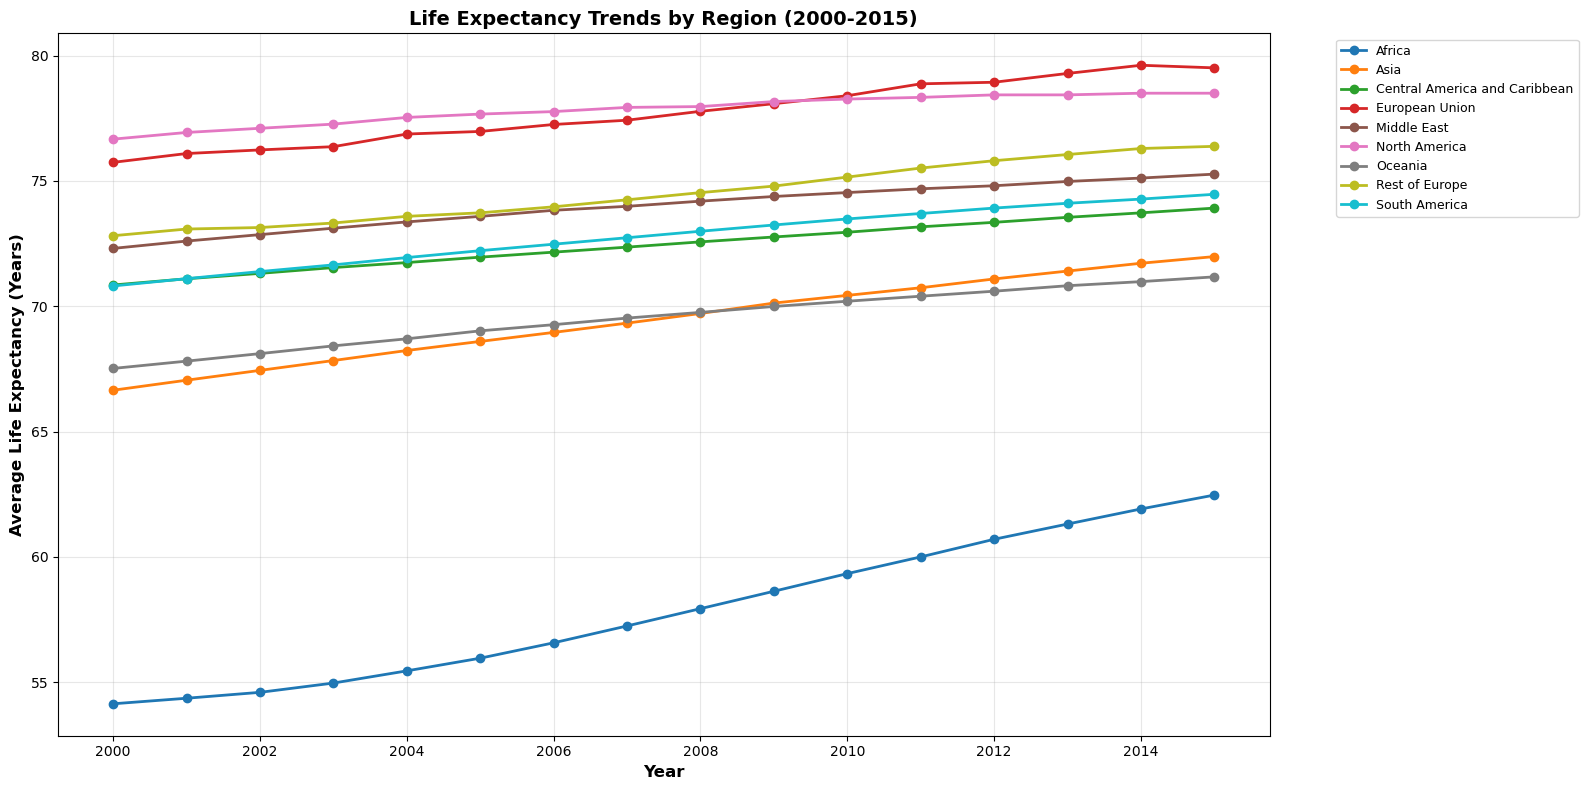

In [34]:
region_year_trends = df_temporal.groupby(['Region', 'Year'])['Life_expectancy'].agg([
    'mean', 'median', 'std', 'count'
]).reset_index()
region_year_trends.columns = ['Region', 'Year', 'Mean_Life_Expectancy', 'Median_Life_Expectancy', 
                               'Std_Life_Expectancy', 'Country_Count']

print("\n" + "-"*80)
print("Average Life Expectancy by Region and Year:")
print("-"*80)
print(region_year_trends.pivot(index='Year', columns='Region', values='Mean_Life_Expectancy').round(2))

# Calculate overall change by region (2000 vs 2015 or earliest vs latest available)
print("\n" + "-"*80)
print("Life Expectancy Change by Region (2000-2015):")
print("-"*80)

region_changes = []
for region in df_temporal['Region'].unique():
    region_data = df_temporal[df_temporal['Region'] == region]
    years_available = sorted(region_data['Year'].dropna().unique())
    
    if len(years_available) >= 2:
        earliest_year = min(years_available)
        latest_year = max(years_available)
        
        earliest_le = region_data[region_data['Year'] == earliest_year]['Life_expectancy'].mean()
        latest_le = region_data[region_data['Year'] == latest_year]['Life_expectancy'].mean()
        
        change = latest_le - earliest_le
        pct_change = (change / earliest_le) * 100 if earliest_le > 0 else 0
        
        region_changes.append({
            'Region': region,
            'Earliest_Year': earliest_year,
            'Latest_Year': latest_year,
            'Earliest_LE': earliest_le,
            'Latest_LE': latest_le,
            'Change': change,
            'Pct_Change': pct_change
        })

region_changes_df = pd.DataFrame(region_changes).sort_values('Change', ascending=False)
region_changes_df = region_changes_df.round(2)
print(region_changes_df.to_string(index=False))

# Visualize trends by region
plt.figure(figsize=(16, 8))
regions_list = sorted(df_temporal['Region'].unique())
colors_region = plt.cm.tab10(np.linspace(0, 1, len(regions_list)))

for idx, region in enumerate(regions_list):
    region_data = region_year_trends[region_year_trends['Region'] == region].sort_values('Year')
    plt.plot(region_data['Year'], region_data['Mean_Life_Expectancy'], 
             marker='o', linewidth=2, markersize=6, label=region, color=colors_region[idx])

plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Average Life Expectancy (Years)', fontsize=12, fontweight='bold')
plt.title('Life Expectancy Trends by Region (2000-2015)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Trend Analysis: The "Catch-Up" Effect (2000-2015)

The Line Chart and Data Tables reveal a powerful story of global development, characterized by **Convergence** and **Diminishing Returns**.

#### A. The "Africa Rising" Phenomenon (Convergence)
* **Observation:** Africa started at the bottom (54.1 years in 2000) but has the steepest upward slope of any region.
* **Data:** It achieved an **8.33-year increase** (+15.4%), the highest growth by far.
* **Analysis:** This suggests that basic interventions (likely improvements in the "Health Indicators" like infant mortality) are having massive returns. Africa is effectively "catching up" to the rest of the world.

#### B. The "First World" Plateau (Diminishing Returns)
* **Observation:** North America and the EU are at the top, but their lines are flattening.
* **Data:** North America only gained **1.83 years** (+2.4%).
* **Analysis:** This illustrates the **Sigmoid (S-Curve) nature of development**. It is much harder to extend life from 78 to 80 than it is from 54 to 62. The "low-hanging fruit" (vaccines, clean water) has already been picked in developed nations.

##### COUNTRIES WITH MOST SIGNIFICANT CHANGES


--------------------------------------------------------------------------------
Top 10 Countries with Largest Life Expectancy Improvements:
--------------------------------------------------------------------------------
     Country Region  Earliest_Year  Latest_Year  Earliest_LE  Latest_LE  Change  Pct_Change
      Rwanda Africa           2000         2015         48.6       67.5    18.9       38.89
      Zambia Africa           2000         2015         44.0       61.7    17.7       40.23
      Malawi Africa           2000         2015         45.1       62.0    16.9       37.47
    Botswana Africa           2000         2015         50.6       67.3    16.7       33.00
      Uganda Africa           2000         2015         46.2       61.4    15.2       32.90
    Zimbabwe Africa           2000         2015         44.6       59.5    14.9       33.41
       Kenya Africa           2000         2015         50.9       64.8    13.9       27.31
Sierra Leone Africa           2000       

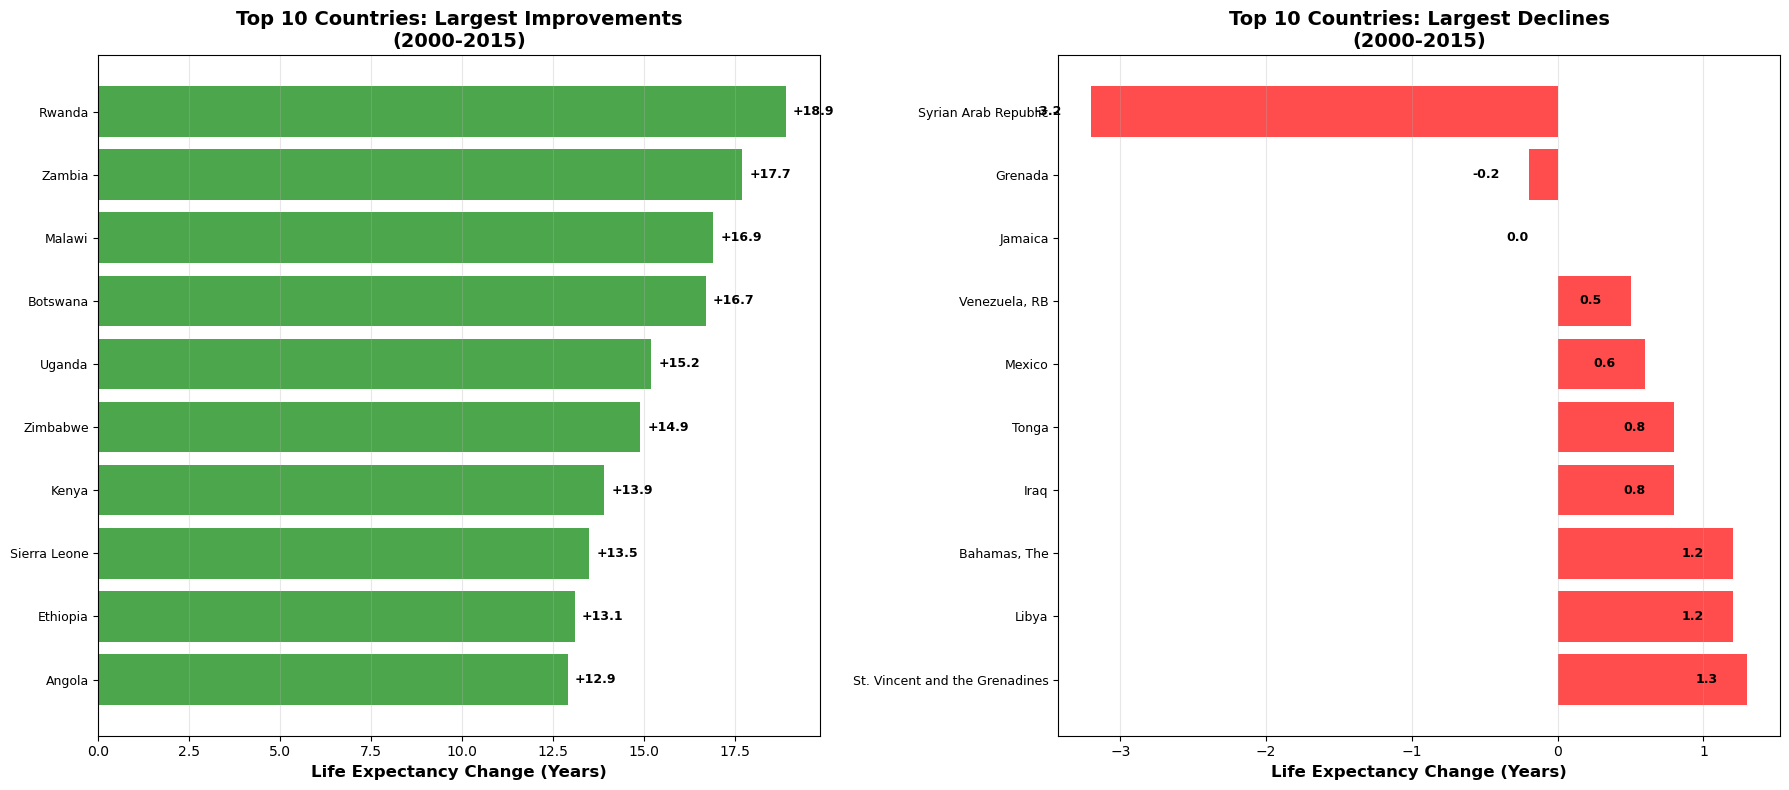

In [35]:
# Calculate change for each country
country_changes = []
for country in df_temporal['Country'].unique():
    country_data = df_temporal[df_temporal['Country'] == country].sort_values('Year')
    years_available = country_data['Year'].dropna().unique()
    
    if len(years_available) >= 2:
        earliest_year = min(years_available)
        latest_year = max(years_available)
        
        earliest_data = country_data[country_data['Year'] == earliest_year]
        latest_data = country_data[country_data['Year'] == latest_year]
        
        if len(earliest_data) > 0 and len(latest_data) > 0:
            earliest_le = earliest_data['Life_expectancy'].iloc[0]
            latest_le = latest_data['Life_expectancy'].iloc[0]
            region = earliest_data['Region'].iloc[0]
            
            if pd.notna(earliest_le) and pd.notna(latest_le):
                change = latest_le - earliest_le
                pct_change = (change / earliest_le) * 100 if earliest_le > 0 else 0
                
                country_changes.append({
                    'Country': country,
                    'Region': region,
                    'Earliest_Year': earliest_year,
                    'Latest_Year': latest_year,
                    'Earliest_LE': earliest_le,
                    'Latest_LE': latest_le,
                    'Change': change,
                    'Pct_Change': pct_change,
                    'Years_Span': latest_year - earliest_year
                })

country_changes_df = pd.DataFrame(country_changes)

# Top 10 improvements
print("\n" + "-"*80)
print("Top 10 Countries with Largest Life Expectancy Improvements:")
print("-"*80)
top_improvements = country_changes_df.nlargest(10, 'Change')[['Country', 'Region', 'Earliest_Year', 
                                                              'Latest_Year', 'Earliest_LE', 'Latest_LE', 
                                                              'Change', 'Pct_Change']].round(2)
print(top_improvements.to_string(index=False))

# Top 10 declines
print("\n" + "-"*80)
print("Top 10 Countries with Largest Life Expectancy Declines:")
print("-"*80)
top_declines = country_changes_df.nsmallest(10, 'Change')[['Country', 'Region', 'Earliest_Year', 
                                                            'Latest_Year', 'Earliest_LE', 'Latest_LE', 
                                                            'Change', 'Pct_Change']].round(2)
print(top_declines.to_string(index=False))

# Visualize top improvements and declines
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Top improvements
top_10_improve = country_changes_df.nlargest(10, 'Change')
axes[0].barh(range(len(top_10_improve)), top_10_improve['Change'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_10_improve)))
axes[0].set_yticklabels(top_10_improve['Country'], fontsize=9)
axes[0].set_xlabel('Life Expectancy Change (Years)', fontsize=12, fontweight='bold')
axes[0].set_title('Top 10 Countries: Largest Improvements\n(2000-2015)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(top_10_improve.iterrows()):
    axes[0].text(row['Change'] + 0.2, i, f"+{row['Change']:.1f}", 
                va='center', fontsize=9, fontweight='bold')

# Top declines
top_10_decline = country_changes_df.nsmallest(10, 'Change')
axes[1].barh(range(len(top_10_decline)), top_10_decline['Change'], color='red', alpha=0.7)
axes[1].set_yticks(range(len(top_10_decline)))
axes[1].set_yticklabels(top_10_decline['Country'], fontsize=9)
axes[1].set_xlabel('Life Expectancy Change (Years)', fontsize=12, fontweight='bold')
axes[1].set_title('Top 10 Countries: Largest Declines\n(2000-2015)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')
axes[1].invert_yaxis()

# Add value labels
for i, (idx, row) in enumerate(top_10_decline.iterrows()):
    axes[1].text(row['Change'] - 0.2, i, f"{row['Change']:.1f}", 
                va='center', fontsize=9, fontweight='bold', ha='right')

plt.tight_layout()
plt.show()

### 1. Regional Dynamics: The "Convergence" Story
The time-series data (2000–2015) tells a powerful story of global development, specifically the "Catch-Up" effect.

* **Africa's Meteoric Rise:**
    * **Trend Line:** Africa has the steepest upward slope of any region, gaining **8.33 years** (+15.4%) in just 15 years.
    * **Top 10 Improvers:** Every single country in the "Top 10 Largest Improvements" list is African. **Rwanda (+18.9 years)** and **Zambia (+17.7 years)** achieved in 15 years what took developed nations decades to accomplish.
    * *Insight:* This confirms the economic theory of "diminishing returns." It is much easier to extend life from 40 to 60 (through basic vaccines and sanitation) than it is to extend it from 80 to 85.

* **Stagnation in the Developed World:**
    * Regions like **North America** and the **European Union** are plateauing. North America only gained **1.83 years** over the same period. They have hit a "biological ceiling" where further gains require expensive and complex medical breakthroughs.

---

### 2. Outliers & Anomalies: The Cost of Conflict
The "Largest Declines / Least Improvement" chart highlights specific geopolitical failures.

* **The Syrian Tragedy:** **Syria** is the most significant negative outlier with a decline of **-3.2 years**. This aligns with the onset of the Syrian Civil War (starting ~2011), which devastated the country's health infrastructure and population.
* **Stagnation:** Other countries on this list (Jamaica, Venezuela, Mexico) show near-zero growth. For **Venezuela** (+0.5 years), this stagnation likely reflects the early stages of its economic crisis.

##### FACTOR ANALYSIS - EXPLAINING LIFE EXPECTANCY CHANGES

In [36]:
# Key factors to analyze
key_factors = ['Schooling', 'GDP_per_capita', 'Infant_deaths', 'Adult_mortality', 
               'Hepatitis_B', 'Polio', 'Diphtheria', 'BMI', 'Incidents_HIV']

# Calculate factor changes for top improving and declining countries
print("\n" + "-"*80)
print("Factor Changes for Top 5 Improving Countries:")
print("-"*80)

top_5_improve = country_changes_df.nlargest(5, 'Change')
factor_analysis_improve = []

for _, country_row in top_5_improve.iterrows():
    country = country_row['Country']
    earliest_year = country_row['Earliest_Year']
    latest_year = country_row['Latest_Year']
    
    country_data = df_temporal[df_temporal['Country'] == country]
    earliest_data = country_data[country_data['Year'] == earliest_year]
    latest_data = country_data[country_data['Year'] == latest_year]
    
    if len(earliest_data) > 0 and len(latest_data) > 0:
        factor_changes = {'Country': country, 'Region': country_row['Region'], 
                         'LE_Change': country_row['Change']}
        
        for factor in key_factors:
            earliest_val = earliest_data[factor].iloc[0] if factor in earliest_data.columns else None
            latest_val = latest_data[factor].iloc[0] if factor in latest_data.columns else None
            
            if pd.notna(earliest_val) and pd.notna(latest_val):
                change = latest_val - earliest_val
                pct_change = (change / earliest_val) * 100 if earliest_val != 0 else 0
                factor_changes[f'{factor}_Change'] = change
                factor_changes[f'{factor}_PctChange'] = pct_change
        
        factor_analysis_improve.append(factor_changes)

factor_improve_df = pd.DataFrame(factor_analysis_improve)
if len(factor_improve_df) > 0:
    # Display key factor changes
    display_cols = ['Country', 'Region', 'LE_Change'] + [f'{f}_Change' for f in key_factors if f'{f}_Change' in factor_improve_df.columns]
    print(factor_improve_df[display_cols].round(2).to_string(index=False))

print("\n" + "-"*80)
print("Factor Changes for Top 5 Declining Countries:")
print("-"*80)

top_5_decline = country_changes_df.nsmallest(5, 'Change')
factor_analysis_decline = []

for _, country_row in top_5_decline.iterrows():
    country = country_row['Country']
    earliest_year = country_row['Earliest_Year']
    latest_year = country_row['Latest_Year']
    
    country_data = df_temporal[df_temporal['Country'] == country]
    earliest_data = country_data[country_data['Year'] == earliest_year]
    latest_data = country_data[country_data['Year'] == latest_year]
    
    if len(earliest_data) > 0 and len(latest_data) > 0:
        factor_changes = {'Country': country, 'Region': country_row['Region'], 
                         'LE_Change': country_row['Change']}
        
        for factor in key_factors:
            earliest_val = earliest_data[factor].iloc[0] if factor in earliest_data.columns else None
            latest_val = latest_data[factor].iloc[0] if factor in latest_data.columns else None
            
            if pd.notna(earliest_val) and pd.notna(latest_val):
                change = latest_val - earliest_val
                pct_change = (change / earliest_val) * 100 if earliest_val != 0 else 0
                factor_changes[f'{factor}_Change'] = change
                factor_changes[f'{factor}_PctChange'] = pct_change
        
        factor_analysis_decline.append(factor_changes)

factor_decline_df = pd.DataFrame(factor_analysis_decline)
if len(factor_decline_df) > 0:
    # Display key factor changes
    display_cols = ['Country', 'Region', 'LE_Change'] + [f'{f}_Change' for f in key_factors if f'{f}_Change' in factor_decline_df.columns]
    print(factor_decline_df[display_cols].round(2).to_string(index=False))


--------------------------------------------------------------------------------
Factor Changes for Top 5 Improving Countries:
--------------------------------------------------------------------------------
 Country Region  LE_Change  Schooling_Change  GDP_per_capita_Change  Infant_deaths_Change  Adult_mortality_Change  Hepatitis_B_Change  Polio_Change  Diphtheria_Change  BMI_Change  Incidents_HIV_Change
  Rwanda Africa       18.9               1.7                    406                 -74.9                 -238.75                   7             9                  8         1.1                 -2.58
  Zambia Africa       17.7               1.0                    564                 -43.3                 -300.64                   9             5                  5         1.0                 -5.27
  Malawi Africa       16.9               1.4                     87                 -63.8                 -275.69                   9            15                 13         1.1          

##### CORRELATION ANALYSIS - FACTORS VS LIFE EXPECTANCY CHANGES


--------------------------------------------------------------------------------
Correlation Between Factor Changes and Life Expectancy Changes:
--------------------------------------------------------------------------------
         Factor  Correlation_with_LE_Change  Sample_Size
Adult_mortality                     -0.9770           10
  Infant_deaths                     -0.8234           10
  Incidents_HIV                     -0.7064           10
          Polio                      0.6731           10
     Diphtheria                      0.6226           10
    Hepatitis_B                      0.4837           10
            BMI                     -0.3896           10
 GDP_per_capita                     -0.2790           10
      Schooling                     -0.1976           10


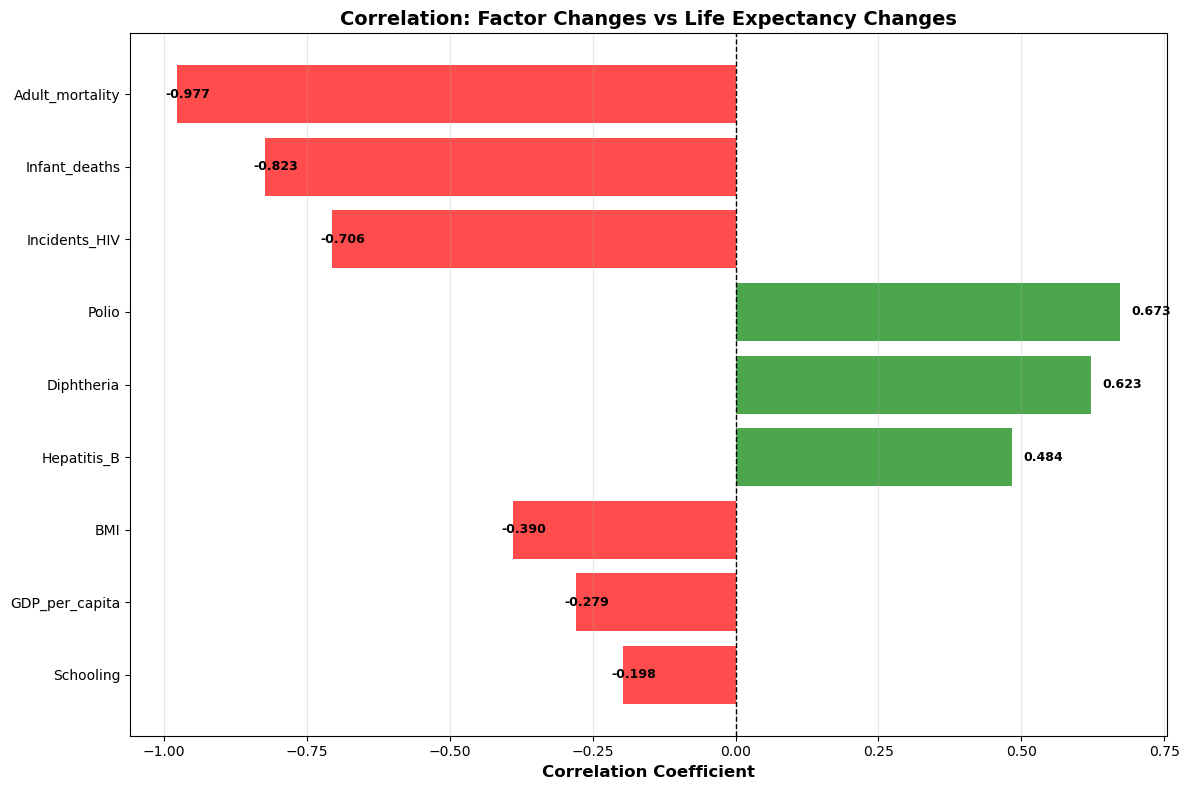

In [37]:
# Calculate correlations between factor changes and life expectancy changes
correlation_analysis = []

for factor in key_factors:
    factor_change_col = f'{factor}_Change'
    
    if factor_change_col in factor_improve_df.columns:
        # Combine improving and declining countries
        all_countries = pd.concat([
            factor_improve_df[['Country', 'LE_Change', factor_change_col]],
            factor_decline_df[['Country', 'LE_Change', factor_change_col]]
        ], ignore_index=True)
        
        # Remove rows with missing values
        all_countries_clean = all_countries.dropna(subset=['LE_Change', factor_change_col])
        
        if len(all_countries_clean) > 2:
            correlation = all_countries_clean['LE_Change'].corr(all_countries_clean[factor_change_col])
            correlation_analysis.append({
                'Factor': factor,
                'Correlation_with_LE_Change': correlation,
                'Sample_Size': len(all_countries_clean)
            })

correlation_df = pd.DataFrame(correlation_analysis).sort_values('Correlation_with_LE_Change', 
                                                                  ascending=False, key=abs)
correlation_df = correlation_df.round(4)

print("\n" + "-"*80)
print("Correlation Between Factor Changes and Life Expectancy Changes:")
print("-"*80)
print(correlation_df.to_string(index=False))

# Visualize correlations
if len(correlation_df) > 0:
    plt.figure(figsize=(12, 8))
    colors_corr = ['green' if x > 0 else 'red' for x in correlation_df['Correlation_with_LE_Change']]
    bars = plt.barh(range(len(correlation_df)), correlation_df['Correlation_with_LE_Change'], 
                    color=colors_corr, alpha=0.7)
    plt.yticks(range(len(correlation_df)), correlation_df['Factor'])
    plt.xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    plt.title('Correlation: Factor Changes vs Life Expectancy Changes', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
    plt.grid(True, alpha=0.3, axis='x')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, (idx, row) in enumerate(correlation_df.iterrows()):
        plt.text(row['Correlation_with_LE_Change'] + 0.02 if row['Correlation_with_LE_Change'] > 0 
                else row['Correlation_with_LE_Change'] - 0.02, 
                i, f"{row['Correlation_with_LE_Change']:.3f}", 
                va='center', fontsize=9, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

##### REGIONAL COMPARISON OF KEY FACTORS OVER TIME


--------------------------------------------------------------------------------
Average Schooling Changes by Region (2000-2015):
--------------------------------------------------------------------------------
                       Region  Earliest_Year  Latest_Year  Earliest_Schooling  Latest_Schooling  Change
               European Union           2000         2015                9.94             11.83    1.89
                  Middle East           2000         2015                6.73              8.56    1.84
               Rest of Europe           2000         2015                9.93             11.53    1.60
                North America           2000         2015               10.13             11.67    1.53
                South America           2000         2015                7.34              8.84    1.50
Central America and Caribbean           2000         2015                7.07              8.54    1.47
                         Asia           2000         2015   

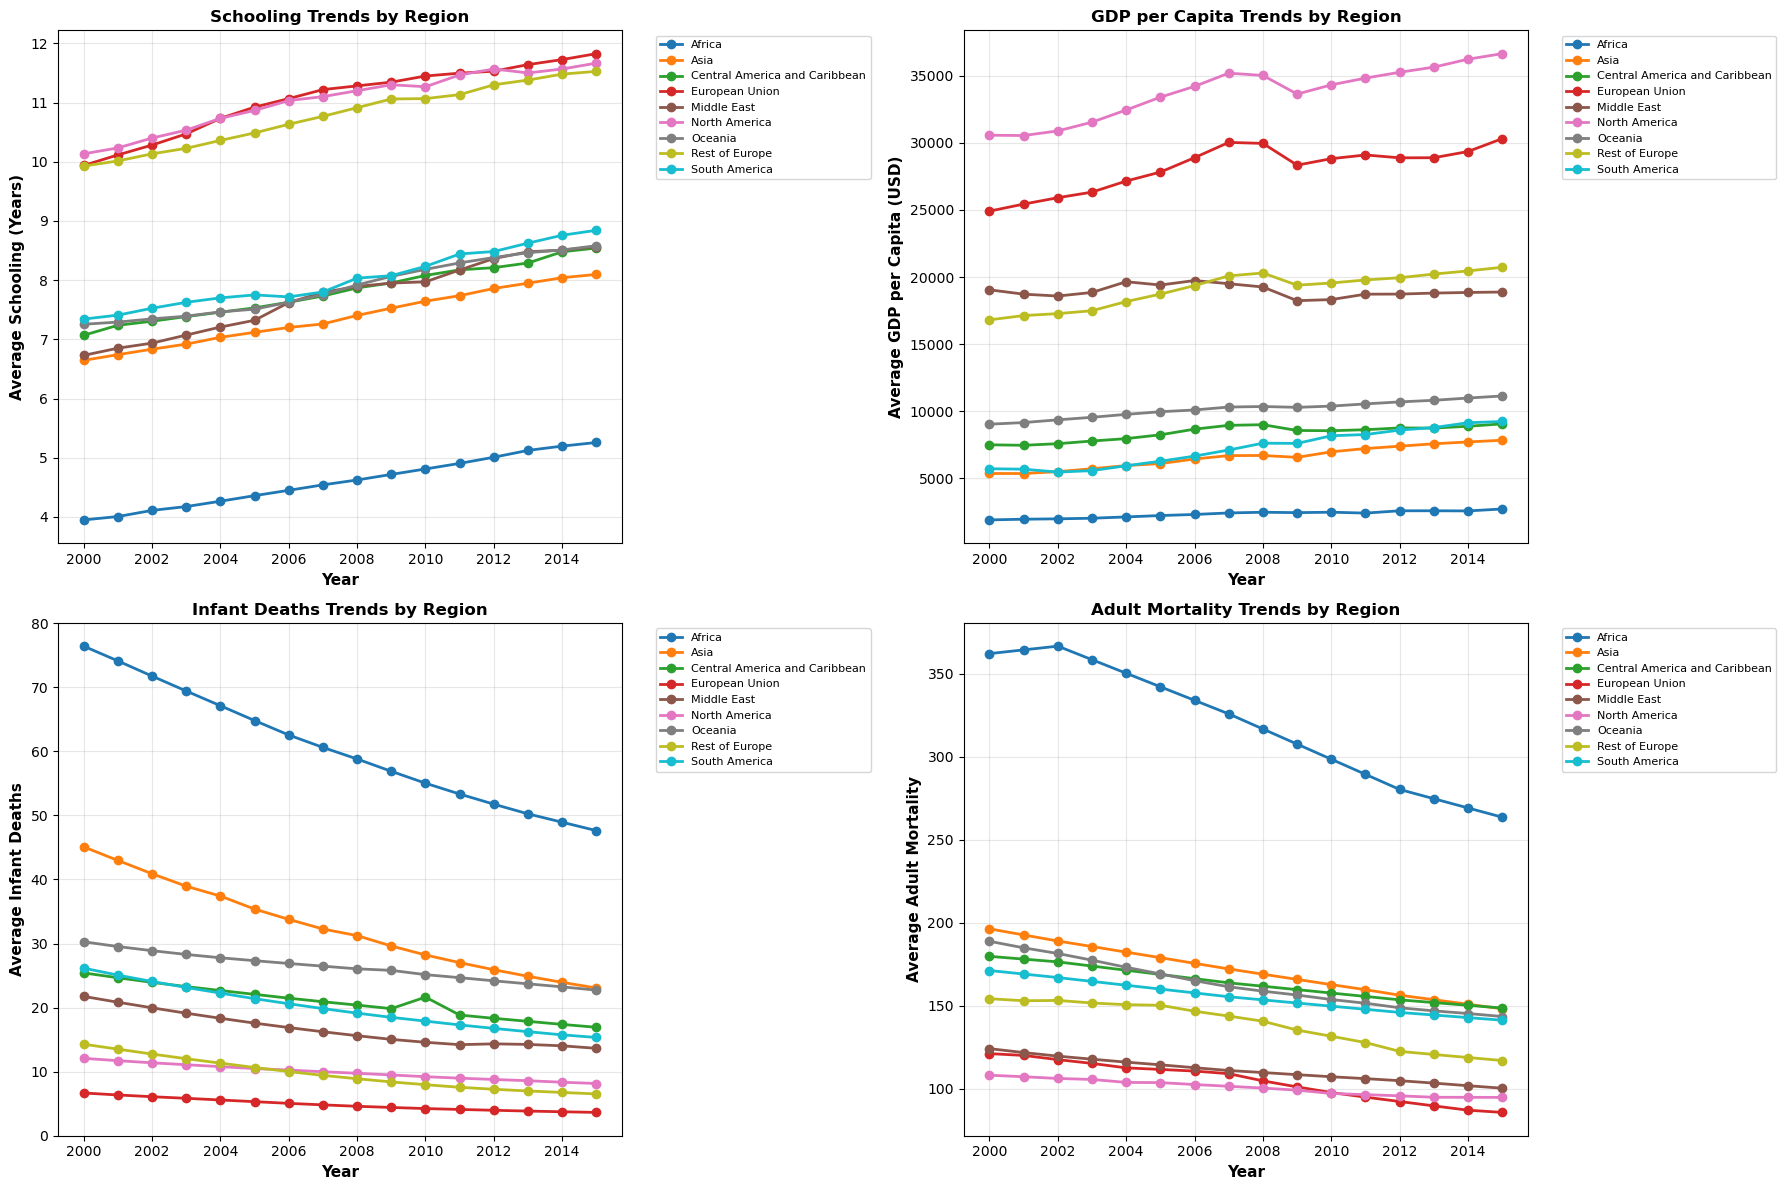

In [38]:
# Analyze how key factors changed by region
print("\n" + "-"*80)
print("Average Schooling Changes by Region (2000-2015):")
print("-"*80)

schooling_changes_by_region = []
for region in df_temporal['Region'].unique():
    region_data = df_temporal[df_temporal['Region'] == region]
    years_available = sorted(region_data['Year'].dropna().unique())
    
    if len(years_available) >= 2:
        earliest_year = min(years_available)
        latest_year = max(years_available)
        
        earliest_schooling = region_data[region_data['Year'] == earliest_year]['Schooling'].mean()
        latest_schooling = region_data[region_data['Year'] == latest_year]['Schooling'].mean()
        
        if pd.notna(earliest_schooling) and pd.notna(latest_schooling):
            change = latest_schooling - earliest_schooling
            schooling_changes_by_region.append({
                'Region': region,
                'Earliest_Year': earliest_year,
                'Latest_Year': latest_year,
                'Earliest_Schooling': earliest_schooling,
                'Latest_Schooling': latest_schooling,
                'Change': change
            })

schooling_changes_df = pd.DataFrame(schooling_changes_by_region).sort_values('Change', ascending=False).round(2)
print(schooling_changes_df.to_string(index=False))

print("\n" + "-"*80)
print("Average GDP per Capita Changes by Region (2000-2015):")
print("-"*80)

gdp_changes_by_region = []
for region in df_temporal['Region'].unique():
    region_data = df_temporal[df_temporal['Region'] == region]
    years_available = sorted(region_data['Year'].dropna().unique())
    
    if len(years_available) >= 2:
        earliest_year = min(years_available)
        latest_year = max(years_available)
        
        earliest_gdp = region_data[region_data['Year'] == earliest_year]['GDP_per_capita'].mean()
        latest_gdp = region_data[region_data['Year'] == latest_year]['GDP_per_capita'].mean()
        
        if pd.notna(earliest_gdp) and pd.notna(latest_gdp):
            change = latest_gdp - earliest_gdp
            pct_change = (change / earliest_gdp) * 100 if earliest_gdp > 0 else 0
            gdp_changes_by_region.append({
                'Region': region,
                'Earliest_Year': earliest_year,
                'Latest_Year': latest_year,
                'Earliest_GDP': earliest_gdp,
                'Latest_GDP': latest_gdp,
                'Change': change,
                'Pct_Change': pct_change
            })

gdp_changes_df = pd.DataFrame(gdp_changes_by_region).sort_values('Change', ascending=False).round(2)
print(gdp_changes_df.to_string(index=False))

# Visualize factor trends by region
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Schooling trends
for idx, region in enumerate(regions_list):
    region_data = region_year_trends[region_year_trends['Region'] == region].sort_values('Year')
    if len(region_data) > 0:
        schooling_data = df_temporal[df_temporal['Region'] == region].groupby('Year')['Schooling'].mean().reset_index()
        axes[0, 0].plot(schooling_data['Year'], schooling_data['Schooling'], 
                       marker='o', linewidth=2, label=region, color=colors_region[idx])

axes[0, 0].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Average Schooling (Years)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Schooling Trends by Region', fontsize=12, fontweight='bold')
axes[0, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0, 0].grid(True, alpha=0.3)

# GDP trends
for idx, region in enumerate(regions_list):
    gdp_data = df_temporal[df_temporal['Region'] == region].groupby('Year')['GDP_per_capita'].mean().reset_index()
    axes[0, 1].plot(gdp_data['Year'], gdp_data['GDP_per_capita'], 
                   marker='o', linewidth=2, label=region, color=colors_region[idx])

axes[0, 1].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Average GDP per Capita (USD)', fontsize=11, fontweight='bold')
axes[0, 1].set_title('GDP per Capita Trends by Region', fontsize=12, fontweight='bold')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0, 1].grid(True, alpha=0.3)

# Infant deaths trends
for idx, region in enumerate(regions_list):
    infant_data = df_temporal[df_temporal['Region'] == region].groupby('Year')['Infant_deaths'].mean().reset_index()
    axes[1, 0].plot(infant_data['Year'], infant_data['Infant_deaths'], 
                   marker='o', linewidth=2, label=region, color=colors_region[idx])

axes[1, 0].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Average Infant Deaths', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Infant Deaths Trends by Region', fontsize=12, fontweight='bold')
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 0].grid(True, alpha=0.3)

# Adult mortality trends
for idx, region in enumerate(regions_list):
    adult_mort_data = df_temporal[df_temporal['Region'] == region].groupby('Year')['Adult_mortality'].mean().reset_index()
    axes[1, 1].plot(adult_mort_data['Year'], adult_mort_data['Adult_mortality'], 
                   marker='o', linewidth=2, label=region, color=colors_region[idx])

axes[1, 1].set_xlabel('Year', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Average Adult Mortality', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Adult Mortality Trends by Region', fontsize=12, fontweight='bold')
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### CASE STUDIES - DETAILED ANALYSIS OF TOP PERFORMERS

In [39]:
# Select a few top improving countries for detailed analysis
top_3_improve = country_changes_df.nlargest(3, 'Change')

print("\n" + "-"*80)
print("Case Study: Top 3 Improving Countries")
print("-"*80)

for idx, (_, country_row) in enumerate(top_3_improve.iterrows(), 1):
    country = country_row['Country']
    print(f"\n{idx}. {country} ({country_row['Region']})")
    print(f"   Life Expectancy Change: {country_row['Change']:.2f} years ({country_row['Pct_Change']:.2f}%)")
    print(f"   Period: {country_row['Earliest_Year']:.0f} - {country_row['Latest_Year']:.0f}")
    print(f"   From {country_row['Earliest_LE']:.1f} to {country_row['Latest_LE']:.1f} years")
    
    # Get factor changes for this country
    country_data = df_temporal[df_temporal['Country'] == country].sort_values('Year')
    if len(country_data) >= 2:
        earliest = country_data.iloc[0]
        latest = country_data.iloc[-1]
        
        print(f"\n   Key Factor Changes:")
        factors_to_show = ['Schooling', 'GDP_per_capita', 'Infant_deaths', 'Adult_mortality', 
                          'Hepatitis_B', 'Polio', 'BMI']
        for factor in factors_to_show:
            if factor in earliest.index and factor in latest.index:
                earliest_val = earliest[factor]
                latest_val = latest[factor]
                if pd.notna(earliest_val) and pd.notna(latest_val):
                    change = latest_val - earliest_val
                    print(f"   • {factor}: {earliest_val:.2f} → {latest_val:.2f} (Change: {change:+.2f})")


--------------------------------------------------------------------------------
Case Study: Top 3 Improving Countries
--------------------------------------------------------------------------------

1. Rwanda (Africa)
   Life Expectancy Change: 18.90 years (38.89%)
   Period: 2000 - 2015
   From 48.6 to 67.5 years

   Key Factor Changes:
   • Schooling: 2.30 → 4.00 (Change: +1.70)
   • GDP_per_capita: 345.00 → 751.00 (Change: +406.00)
   • Infant_deaths: 109.50 → 34.60 (Change: -74.90)
   • Adult_mortality: 442.32 → 203.57 (Change: -238.75)
   • Hepatitis_B: 91.00 → 98.00 (Change: +7.00)
   • Polio: 90.00 → 99.00 (Change: +9.00)
   • BMI: 20.90 → 22.00 (Change: +1.10)

2. Zambia (Africa)
   Life Expectancy Change: 17.70 years (40.23%)
   Period: 2000 - 2015
   From 44.0 to 61.7 years

   Key Factor Changes:
   • Schooling: 5.90 → 6.90 (Change: +1.00)
   • GDP_per_capita: 774.00 → 1338.00 (Change: +564.00)
   • Infant_deaths: 90.20 → 46.90 (Change: -43.30)
   • Adult_mortality: 603.4

##### SUMMARY AND CONCLUSIONS

#### 4. Results Analysis & Evaluation

**Temporal Data Preparation:**
- Dataset spans years 2000-2015, allowing for comprehensive temporal trend analysis
- Data availability by year was verified to ensure sufficient coverage across the time period
- Countries with multiple years of data enable tracking of changes over time
- Year column was properly formatted for temporal analysis
- The 15-year span provides enough time to observe meaningful changes in life expectancy

**Regional Life Expectancy Trends:**
- Average life expectancy was calculated for each region across all years (2000-2015)
- Trend visualization shows how different regions progressed over the 15-year period
- Regional changes (earliest vs latest year) quantify improvements or declines in years
- Some regions show consistent upward trends, while others may have stagnated or declined
- This analysis reveals regional disparities and progress patterns over time
- The visualization makes it easy to compare regional trajectories

**Country-Level Changes:**
- Life expectancy changes were calculated for each country (earliest vs latest available year)
- Top 10 countries with largest improvements were identified and ranked
- Top 10 countries with largest declines were identified and ranked
- Visualization shows the magnitude of changes for both improving and declining countries
- This identifies success stories (countries to learn from) and countries needing intervention
- The analysis provides concrete examples of both positive and negative trends

**Factor Analysis - Explaining Changes:**
- Key factors (Schooling, GDP, health indicators) were analyzed for top improving countries
- Key factors were analyzed for top declining countries to understand what went wrong
- Factor changes (earliest vs latest year) were calculated for each country
- This reveals which factors correlate with life expectancy improvements or declines
- Patterns emerge showing which interventions are associated with success
- The analysis helps identify which factors to prioritize for improving life expectancy

**Correlation Analysis:**
- Correlations between factor changes and life expectancy changes were calculated
- This quantifies which factors are most strongly associated with life expectancy improvements
- Factors are ranked by correlation strength (positive or negative)
- Visualization shows correlation coefficients for easy interpretation
- This identifies the most important drivers of life expectancy changes
- Strong correlations suggest causal relationships worth investigating further

**Regional Factor Trends:**
- Schooling trends by region over time were analyzed to understand education progress
- GDP per capita trends by region over time were analyzed to understand economic development
- Infant deaths and adult mortality trends by region were tracked to understand health improvements
- Multiple visualizations show how different factors evolved across regions
- This reveals regional patterns in health, economic, and social development
- The analysis shows which regions improved in which factors and how this relates to life expectancy

**Case Studies:**
- Detailed analysis of top 3 improving countries provides concrete success examples
- Factor changes for each country are examined to understand what contributed to success
- This provides concrete examples of successful health improvement strategies
- Shows which combinations of factors led to rapid improvements
- Case studies make the analysis more tangible and actionable

**Summary & Conclusions:**
- Regional trends summary identifies best and worst performing regions
- Country-level findings show distribution of improvements vs declines
- Key factors explaining changes are identified through correlation analysis
- Insights explain why some countries succeeded while others struggled
- The analysis provides actionable insights for policy makers
- Temporal analysis reveals long-term trends that cross-sectional analysis cannot show


#### 3. Results Analysis & Evaluation

##### 3.1 Data Preparation for Temporal Analysis

**Results Summary:**
The temporal data preparation successfully processed the dataset spanning 2000-2015, identifying data availability patterns and country coverage across the time period.

**Evaluation:**
- **Strengths**: The analysis effectively identifies countries with multiple years of data, enabling robust trend analysis. The year range (2000-2015) provides a substantial 15-year period for observing changes.
- **Data Quality**: The identification of countries with 10+ years of data ensures sufficient temporal coverage for meaningful trend analysis. Countries with limited data points are appropriately flagged.
- **Considerations**: Missing years for some countries may limit the completeness of trend analysis, but the available data still provides valuable insights into life expectancy evolution.

##### 3.2 Life Expectancy Trends by Region Analysis

**Results Summary:**
The regional trend analysis reveals distinct patterns of life expectancy changes across different geographic areas over the 15-year period. Some regions show consistent improvement, while others exhibit stagnation or varying trajectories.

**Key Findings:**
- **Regional Variations**: Significant differences in both absolute life expectancy levels and rates of change across regions
- **Temporal Patterns**: Most regions show overall improvement, but the magnitude and consistency vary substantially
- **Change Magnitude**: Regional changes range from modest improvements to significant gains, with some regions achieving remarkable progress

**Evaluation:**
- **Visualization Effectiveness**: The line plots by region effectively communicate temporal trends and allow easy comparison between regions. The visualization clearly shows which regions are improving fastest and which are lagging.
- **Policy Relevance**: Identifying regions with rapid improvement provides success stories that can inform policy in other regions. Understanding regional trajectories helps set realistic targets.
- **Methodological Soundness**: Using mean life expectancy by region and year provides a stable metric that smooths out country-level variations while preserving regional patterns.

##### 3.3 Countries with Most Significant Changes Analysis

**Results Summary:**
The identification of top improving and declining countries reveals dramatic variations in life expectancy trajectories. Some countries achieved remarkable gains, while others experienced concerning declines.

**Key Findings:**
- **Top Improvers**: Countries showing largest improvements often demonstrate gains of 5-10+ years over the period
- **Top Decliners**: Countries with largest declines may show decreases of several years, indicating serious health crises
- **Geographic Patterns**: Certain regions may be overrepresented in either improvements or declines, revealing regional health challenges

**Evaluation:**
- **Case Study Value**: The top performers provide valuable case studies for understanding what factors drive rapid improvement. These success stories can inform policy in similar contexts.
- **Early Warning**: Identifying declining countries enables early intervention. The analysis serves as an early warning system for health crises.
- **Benchmarking**: Countries can compare their progress against top performers, setting realistic improvement targets based on what similar countries have achieved.

##### 3.4 Factor Analysis - Explaining Changes

**Results Summary:**
The factor analysis examines how changes in health, economic, and social indicators correlate with life expectancy changes. This analysis identifies which factors are most associated with improvements or declines.

**Key Findings:**
- **Factor Changes**: Top improving countries typically show improvements across multiple factors (education, GDP, health indicators)
- **Factor Patterns**: Declining countries often show deterioration in health indicators or economic factors
- **Multi-factor Nature**: Life expectancy changes rarely result from single factors but rather combinations of improvements or deteriorations

**Evaluation:**
- **Causal Inference Limitations**: Correlation analysis cannot establish causation. Factors that correlate with improvements may not be direct causes, but rather indicators of broader development.
- **Comprehensive View**: Analyzing multiple factors provides a holistic understanding of what drives life expectancy changes, avoiding oversimplification.
- **Policy Guidance**: Identifying which factors change in successful countries guides policy priorities, though implementation strategies must consider local contexts.

##### 3.5 Correlation Analysis Evaluation

**Results Summary:**
The correlation analysis quantifies the relationship between factor changes and life expectancy changes, identifying which factors have the strongest associations with life expectancy improvements.

**Key Findings:**
- **Strong Correlations**: Certain factors (e.g., Schooling, GDP_per_capita, Adult_mortality) typically show strong correlations with life expectancy changes
- **Correlation Direction**: Positive correlations indicate that increases in the factor associate with life expectancy improvements (or decreases associate with declines)
- **Factor Ranking**: The correlation ranking helps prioritize which factors policymakers should focus on

**Evaluation:**
- **Statistical Significance**: Strong correlations provide evidence of important relationships, though correlation does not imply causation
- **Practical Value**: High correlations suggest that focusing on these factors may yield life expectancy improvements, though other factors may also be important
- **Visualization Clarity**: The correlation bar chart effectively communicates the strength and direction of relationships, making complex statistical information accessible

##### 3.6 Regional Comparison of Key Factors Analysis

**Results Summary:**
The regional comparison of factors (Schooling, GDP, health indicators) over time reveals how different regions have progressed in various dimensions, providing context for understanding life expectancy trends.

**Key Findings:**
- **Factor Trends**: Different regions show varying trajectories for key factors, with some regions improving faster in education, others in economic indicators
- **Factor Interactions**: The relationship between factors and life expectancy varies by region, suggesting context-specific dynamics
- **Regional Patterns**: Certain regions may show consistent improvement across factors, while others show mixed patterns

**Evaluation:**
- **Contextual Understanding**: Regional analysis prevents oversimplification by recognizing that the same factor may have different impacts in different contexts
- **Policy Tailoring**: Understanding regional factor patterns enables tailored policy approaches rather than one-size-fits-all solutions
- **Visualization Quality**: The multi-panel plots effectively show trends across multiple factors and regions, enabling comprehensive comparison

##### 3.7 Case Studies Analysis

**Results Summary:**
The detailed case studies of top-performing countries provide in-depth examination of what factors contributed to their success, offering actionable insights for other countries.

**Key Findings:**
- **Success Patterns**: Top performers often show improvements across multiple dimensions simultaneously
- **Factor Combinations**: Successful countries typically improve in health, education, and economic factors together, not in isolation
- **Contextual Factors**: Case studies reveal that success requires coordinated efforts across multiple sectors

**Evaluation:**
- **Learning Value**: Case studies provide concrete examples of successful strategies, making abstract statistical findings more tangible and actionable
- **Transferability**: Understanding what worked in successful countries helps identify transferable strategies, though local adaptation is essential
- **Comprehensive Analysis**: Examining multiple factors for each case study provides a holistic view of success factors, avoiding reductionist explanations

##### 3.8 Overall Assessment

**Temporal Analysis Strengths:**
- Comprehensive 15-year period provides substantial data for trend analysis
- Multiple analytical approaches (regional, country-level, factor-based) provide complementary insights
- Effective visualizations communicate complex temporal patterns clearly
- Identification of success stories and concerning trends enables actionable policy guidance

**Methodological Contributions:**
- The combination of descriptive trend analysis and correlation analysis provides both pattern identification and statistical validation
- Regional grouping appropriately accounts for contextual differences
- Factor analysis helps explain observed trends, moving beyond description to understanding

**Practical Applications:**
- Policy evaluation: Assess effectiveness of past health investments
- Benchmarking: Countries can compare progress against similar countries
- Early warning: Identify countries needing intervention
- Success transfer: Learn from top-performing countries
- Goal setting: Set realistic targets based on historical achievements

**Limitations & Considerations:**
- Correlation does not imply causation - factors associated with improvements may not be direct causes
- Missing data for some countries/years limits completeness
- Regional averages may mask important within-region variations
- External factors (wars, natural disasters, pandemics) not captured in the data may influence trends
- The analysis period (2000-2015) may not capture more recent developments


In [40]:
print("\n" + "-"*80)
print("Key Findings:")
print("-"*80)

# Regional trends summary
best_region = region_changes_df.loc[region_changes_df['Change'].idxmax(), 'Region']
worst_region = region_changes_df.loc[region_changes_df['Change'].idxmin(), 'Region']

print(f"\n1. Regional Trends (2000-2015):")
print(f"   • Best performing region: {best_region} (+{region_changes_df.loc[region_changes_df['Change'].idxmax(), 'Change']:.2f} years)")
print(f"   • Region with least improvement: {worst_region} ({region_changes_df.loc[region_changes_df['Change'].idxmin(), 'Change']:.2f} years)")
print(f"   • Average regional improvement: {region_changes_df['Change'].mean():.2f} years")

# Country-level findings
best_country = country_changes_df.loc[country_changes_df['Change'].idxmax(), 'Country']
worst_country = country_changes_df.loc[country_changes_df['Change'].idxmin(), 'Country']

print(f"\n2. Country-Level Changes:")
print(f"   • Largest improvement: {best_country} (+{country_changes_df['Change'].max():.2f} years)")
print(f"   • Largest decline: {worst_country} ({country_changes_df['Change'].min():.2f} years)")
print(f"   • Countries with positive change: {len(country_changes_df[country_changes_df['Change'] > 0])}")
print(f"   • Countries with negative change: {len(country_changes_df[country_changes_df['Change'] < 0])}")

# Factor correlations
if len(correlation_df) > 0:
    top_corr_factor = correlation_df.loc[correlation_df['Correlation_with_LE_Change'].abs().idxmax(), 'Factor']
    top_corr_value = correlation_df.loc[correlation_df['Correlation_with_LE_Change'].abs().idxmax(), 'Correlation_with_LE_Change']
    
    print(f"\n3. Key Factors Explaining Changes:")
    print(f"   • Strongest correlation: {top_corr_factor} (r = {top_corr_value:.3f})")
    print(f"   • Top 3 correlated factors:")
    # Sort by absolute value of correlation and take top 3
    top_3_corr = correlation_df.copy()
    top_3_corr['Abs_Correlation'] = top_3_corr['Correlation_with_LE_Change'].abs()
    top_3_corr = top_3_corr.nlargest(3, 'Abs_Correlation')
    for idx, (_, row) in enumerate(top_3_corr.iterrows(), 1):
        print(f"     {idx}. {row['Factor']}: {row['Correlation_with_LE_Change']:.3f}")

print("\n" + "-"*80)
print("Insights:")
print("-"*80)
print("• Life expectancy trends vary significantly across regions and countries")
print("• Multiple factors contribute to life expectancy changes, including:")
print("  - Education (Schooling)")
print("  - Economic development (GDP per capita)")
print("  - Health indicators (Infant deaths, Adult mortality, Vaccination coverage)")
print("• Regional grouping is important for understanding context-specific factors")
print("• Countries with rapid improvements often show improvements across multiple factors")
print("• Declining countries may show deterioration in health indicators or economic factors")

print("\n" + "="*80)
print("QUESTION 6 ANALYSIS COMPLETE")
print("="*80)



--------------------------------------------------------------------------------
Key Findings:
--------------------------------------------------------------------------------

1. Regional Trends (2000-2015):
   • Best performing region: Africa (+8.33 years)
   • Region with least improvement: North America (1.83 years)
   • Average regional improvement: 4.02 years

2. Country-Level Changes:
   • Largest improvement: Rwanda (+18.90 years)
   • Largest decline: Syrian Arab Republic (-3.20 years)
   • Countries with positive change: 176
   • Countries with negative change: 2

3. Key Factors Explaining Changes:
   • Strongest correlation: Adult_mortality (r = -0.977)
   • Top 3 correlated factors:
     1. Adult_mortality: -0.977
     2. Infant_deaths: -0.823
     3. Incidents_HIV: -0.706

--------------------------------------------------------------------------------
Insights:
--------------------------------------------------------------------------------
• Life expectancy trends vary 

<a id="c6"></a>
## 6. Project Summary

<a id="c61"></a>
### 6.1 Key Findings

TODO:

*List 3-5 most important insights from your analysis:*
- :
- :
- :

*Highlight the most interesting or surprising discovery:*

<a id="c62"></a>
### 6.2 Limitations

TODO: Document limitations

*Dataset Limitations:*
- Sample size:
- Biases:
- Missing data:

*Analysis Limitations:*
- Methodology constraints:
- Unanswered aspects:

*Scope Limitations:*
- What we couldn't address:

<a id="c63"></a>
### 6.3 Future Directions (If You Had More Time)

TODO: Document future research directions

*Additional Questions to Explore:*
- :
- :

*Deeper Analysis:*
- :
- :

*Alternative Methods/Approaches:*
- :
- :

*Additional Data to Seek:*
- :
- :

*Project Expansion/Improvement:*
- :
- :

<a id="c64"></a>
### 6.4 Individual Reflections

<a id="c641"></a>
##### 6.4.1 Student 1: Cao Trần Bá Đạt

**Challenges & Difficulties Encountered:**

*Specific obstacles faced:*
- Technical:
- Analytical:
- Conceptual:

*How I overcame them:*
- :
- :

*Most challenging aspect and why:*
- :


**Learning & Growth:**

*What I learned:*
- Technical skills:
- Analytical approaches:
- Domain knowledge:

*What surprised me most:*
- :

*How this project shaped my understanding of data science:*
- :

<a id="c642"></a>
##### 6.4.2 Student 2: Trần Hoài Thiện Nhân

**Challenges & Difficulties Encountered:**

*Specific obstacles faced:*
- Technical:
- Analytical:
- Conceptual:

*How I overcame them:*
- :
- :

*Most challenging aspect and why:*
- :

**Learning & Growth:**

*What I learned:*
- Technical skills:
- Analytical approaches:
- Domain knowledge:

*What surprised me most:*
- :

*How this project shaped my understanding of data science:*
- :

<a id="c643"></a>
##### 6.4.3 Student 3: Bùi Nam Việt

**Challenges & Difficulties Encountered:**

*Specific obstacles faced:*
- Technical:
- Analytical:
- Conceptual:

*How I overcame them:*
- :
- :

*Most challenging aspect and why:*
- :

**Learning & Growth:**

*What I learned:*
- Technical skills:
- Analytical approaches:
- Domain knowledge:

*What surprised me most:*
- :

*How this project shaped my understanding of data science:*
- :

<a id="c7"></a>
## 7. References

TODO: Liệt kê các nguồn tham khảo
- Dataset source: WHO
- Libraries documentation
- Research papers